# Task 2.2----EDA:

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
city=pd.read_csv("City_Master.csv")
customerDetails=pd.read_csv("Customer_and_bank details_p1.csv")
customerPostalCode=pd.read_csv("Customer_Postal_Code_details.csv")
customerResponseData=pd.read_csv("Customer_Response_data_p1.csv")
customerCampaignDetails=pd.read_csv("Customer_campaign_details_p1.csv")
customerSocialEconomicData=pd.read_csv("Customer_social_economic_data_p1.csv")
regionCode=pd.read_csv("Region_code_master.csv")
stateCode=pd.read_csv("State_Master.csv")

In [3]:
customerCampaignDetails=customerCampaignDetails.rename(columns={'Customer_id':'C_id'})
customerDetails=pd.concat([customerDetails,customerCampaignDetails],axis=1)
customerDetails=pd.concat([customerDetails,customerPostalCode],axis=1)
del(customerDetails['customer_id'])
del(customerDetails['C_id'])
df1=pd.DataFrame(customerDetails['Region_Code'])
df2=[regionCode.loc[i][:] for i in [0,1,2,3,4]]
df2=pd.DataFrame(df2)
customerDetails=pd.merge(customerDetails,customerSocialEconomicData,how="left",on='Customer_id')
df1['Region']=df1['Region_Code'].replace(['1','2','3','4','5','Na'],['Central','East','South','West','North','Not_Specified'])
del[df1['Region_Code']]
df1['Customer_id']=customerDetails['Customer_id']
customerDetails=pd.merge(customerDetails,df1,how='inner',on='Customer_id')
 


In [4]:
bank = pd.merge(customerDetails,customerResponseData,how = 'outer')


In [5]:
bank.describe()

Customer_id           age      duration      campaign         pdays  \
count  37084.000000  37084.000000  37084.000000  37084.000000  37084.000000   
mean   18542.500000     40.042714    258.237946      2.569545    962.530849   
std    10705.373028     10.432965    258.730909      2.770611    186.773063   
min        1.000000     17.000000      0.000000      1.000000      0.000000   
25%     9271.750000     32.000000    102.000000      1.000000    999.000000   
50%    18542.500000     38.000000    180.000000      2.000000    999.000000   
75%    27813.250000     47.000000    319.250000      3.000000    999.000000   
max    37084.000000     98.000000   4918.000000     56.000000    999.000000   

           previous   Postal Code  emp.var.rate  cons.price.idx  \
count  37084.000000  37084.000000  37084.000000    37084.000000   
mean       0.172986  55202.625553      0.082669       93.576076   
std        0.495681  32057.300954      1.568997        0.578493   
min        0.000000   1040.000000     -3.400000       92.201000   
25%        0.000000  23223.000000     -1.800000       93.075000   
50%        0.000000  56301.000000      1.100000       93.749000   
75%        0.000000  90008.000000      1.400000       93.994000   
max        7.000000  99301.000000      1.400000       94.767000   

       cons.conf.idx     euribor3m   nr.employed  
count   37084.000000  37084.000000  37084.000000  
mean      -40.505183      3.621668   5167.058664  
std         4.622045      1.733972     72.196605  
min       -50.800000      0.634000   4963.600000  
25%       -42.700000      1.344000   5099.100000  
50%       -41.800000      4.857000   5191.000000  
75%       -36.400000      4.961000   5228.100000  
max       -26.900000      5.045000   5228.100000

##### Postal Code: is not required so we drop it

In [6]:
bank.drop('Postal Code',axis=1)
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37084 entries, 0 to 37083
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

# Uni-variate Analysis:

In [7]:
print('Data Description:')
bank.describe(include='all').T

Data Description:


count unique                top   freq          mean  \
Customer_id     37084.0    NaN                NaN    NaN       18542.5   
age             37084.0    NaN                NaN    NaN     40.042714   
job               37084     12             admin.   9420           NaN   
marital           37084      4            married  22479           NaN   
education         37084      8  university.degree  10971           NaN   
default           37084      3                 no  29382           NaN   
housing           37084      3                yes  19433           NaN   
loan              37084      3                 no  30561           NaN   
Region_Code       37084      5                  4  11884           NaN   
State_Code        37084     49                 S2   7427           NaN   
City_Code         37084    531                C21   3422           NaN   
contact           37084      2           cellular  23522           NaN   
month             37084     10                may  12420           NaN   
day_of_week       37084      5                thu   7778           NaN   
duration        37084.0    NaN                NaN    NaN    258.237946   
campaign        37084.0    NaN                NaN    NaN      2.569545   
pdays           37084.0    NaN                NaN    NaN    962.530849   
previous        37084.0    NaN                NaN    NaN      0.172986   
poutcome          37084      3        nonexistent  32023           NaN   
Postal Code     37084.0    NaN                NaN    NaN  55202.625553   
emp.var.rate    37084.0    NaN                NaN    NaN      0.082669   
cons.price.idx  37084.0    NaN                NaN    NaN     93.576076   
cons.conf.idx   37084.0    NaN                NaN    NaN    -40.505183   
euribor3m       37084.0    NaN                NaN    NaN      3.621668   
nr.employed     37084.0    NaN                NaN    NaN   5167.058664   
Region            37084      5               West  11884           NaN   
y                 37084      2                 no  32876           NaN   

                         std     min      25%      50%       75%      max  
Customer_id     10705.373028     1.0  9271.75  18542.5  27813.25  37084.0  
age                10.432965    17.0     32.0     38.0      47.0     98.0  
job                      NaN     NaN      NaN      NaN       NaN      NaN  
marital                  NaN     NaN      NaN      NaN       NaN      NaN  
education                NaN     NaN      NaN      NaN       NaN      NaN  
default                  NaN     NaN      NaN      NaN       NaN      NaN  
housing                  NaN     NaN      NaN      NaN       NaN      NaN  
loan                     NaN     NaN      NaN      NaN       NaN      NaN  
Region_Code              NaN     NaN      NaN      NaN       NaN      NaN  
State_Code               NaN     NaN      NaN      NaN       NaN      NaN  
City_Code                NaN     NaN      NaN      NaN       NaN      NaN  
contact                  NaN     NaN      NaN      NaN       NaN      NaN  
month                    NaN     NaN      NaN      NaN       NaN      NaN  
day_of_week              NaN     NaN      NaN      NaN       NaN      NaN  
duration          258.730909     0.0    102.0    180.0    319.25   4918.0  
campaign            2.770611     1.0      1.0      2.0       3.0     56.0  
pdays             186.773063     0.0    999.0    999.0     999.0    999.0  
previous            0.495681     0.0      0.0      0.0       0.0      7.0  
poutcome                 NaN     NaN      NaN      NaN       NaN      NaN  
Postal Code     32057.300954  1040.0  23223.0  56301.0   90008.0  99301.0  
emp.var.rate        1.568997    -3.4     -1.8      1.1       1.4      1.4  
cons.price.idx      0.578493  92.201   93.075   93.749    93.994   94.767  
cons.conf.idx       4.622045   -50.8    -42.7    -41.8     -36.4    -26.9  
euribor3m           1.733972   0.634    1.344    4.857     4.961    5.045  
nr.employed        72.196605  4963.6   5099.1

### Target:


In [8]:
bank['y'].value_counts()

no     32876
yes     4208
Name: y, dtype: int64

We can see the dataset is a unbalanced dataset as count of no>>count of yes

# Bank Client Data:

### Job:

In [9]:
print(bank['job'].unique())
print(bank['job'].value_counts())
print('\nPercentage of distribution of the data:')
print(np.round(bank['job'].value_counts()/len(bank)*100,2))

['services' 'admin.' 'blue-collar' 'technician' 'housemaid' 'retired'
 'management' 'unknown' 'entrepreneur' 'unemployed' 'student'
 'self-employed']
admin.           9420
blue-collar      8314
technician       6096
services         3547
management       2637
retired          1541
entrepreneur     1309
self-employed    1276
housemaid         946
unemployed        925
student           767
unknown           306
Name: job, dtype: int64

Percentage of distribution of the data:
admin.           25.40
blue-collar      22.42
technician       16.44
services          9.56
management        7.11
retired           4.16
entrepreneur      3.53
self-employed     3.44
housemaid         2.55
unemployed        2.49
student           2.07
unknown           0.83
Name: job, dtype: float64


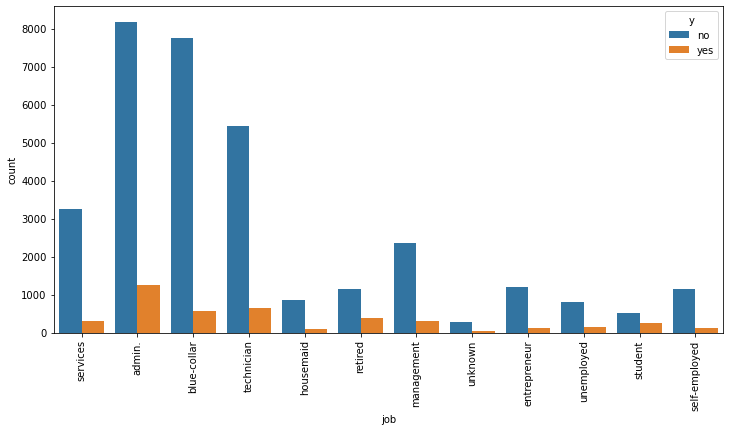

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(bank['job'],hue=bank['y'])
plt.xticks(rotation='vertical',fontsize=10)
plt.show()

y              total      yes %       no %
job                                       
admin.          9420  13.227176  86.772824
blue-collar     8314   6.928073  93.071927
entrepreneur    1309   8.479756  91.520244
housemaid        946   9.830867  90.169133
management      2637  11.073189  88.926811
retired         1541  25.632706  74.367294
self-employed   1276  10.266458  89.733542
services        3547   8.401466  91.598534
student          767  31.290743  68.709257
technician      6096  10.777559  89.222441
unemployed       925  14.486486  85.513514
unknown          306  11.437908  88.562092


<AxesSubplot:xlabel='job'>

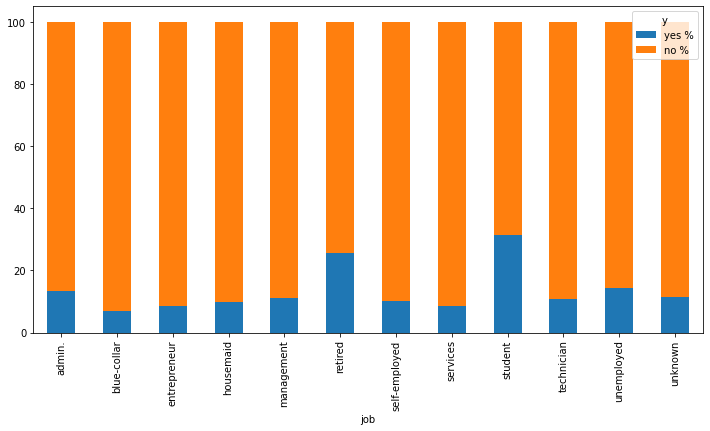

In [11]:
df=pd.crosstab(bank['job'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df[['total','yes %','no %']])
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(12,6))

In [12]:
yes=pd.DataFrame(
    np.round(bank[bank['y']=='yes']['job'].value_counts()/len(bank['job'])*100,2)).reset_index()
no=pd.DataFrame(
    np.round(bank[bank['y']=='no']['job'].value_counts()/len(bank['job'])*100,2)).reset_index()
distribution=pd.merge(yes,no,on='index').rename(columns={'index':'jobs',  'job_x':'subscribed%' , 'job_y':'not subscribed%'})
print('disctribution of data ')
print(distribution)

disctribution of data 
             jobs  subscribed%  not subscribed%
0          admin.         3.36            22.04
1      technician         1.77            14.67
2     blue-collar         1.55            20.87
3         retired         1.07             3.09
4        services         0.80             8.76
5      management         0.79             6.32
6         student         0.65             1.42
7      unemployed         0.36             2.13
8   self-employed         0.35             3.09
9    entrepreneur         0.30             3.23
10      housemaid         0.25             2.30
11        unknown         0.09             0.73


### Age:

In [13]:
print('mean age group of clients not subscribed',bank[bank['y']=='no']['age'].mean())
print('mean age group of clients subscribed',bank[bank['y']=='yes']['age'].mean())
print('median age group of clients not subscribed',bank[bank['y']=='no']['age'].median())
print('median age group of clients subscribed',bank[bank['y']=='yes']['age'].median())
print('range of  age',bank['age'].min(),bank['age'].max())
print('Skewness of the age collumn',bank['age'].skew())

mean age group of clients not subscribed 39.92493004015087
mean age group of clients subscribed 40.96292775665399
median age group of clients not subscribed 38.0
median age group of clients subscribed 37.0
range of  age 17 98
Skewness of the age collumn 0.7911491055381439


We can concider age to be normally distributed as mean ~ median.

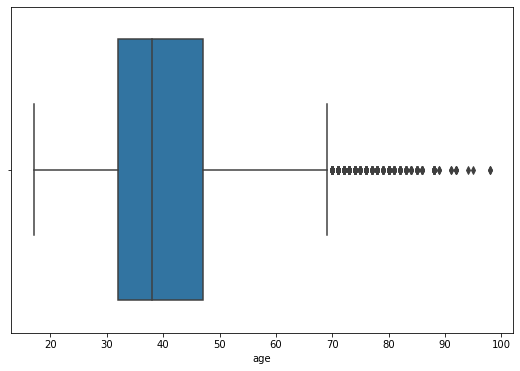

In [14]:
plt.figure(figsize=(9,6))
sns.boxplot(bank['age'])
plt.show()

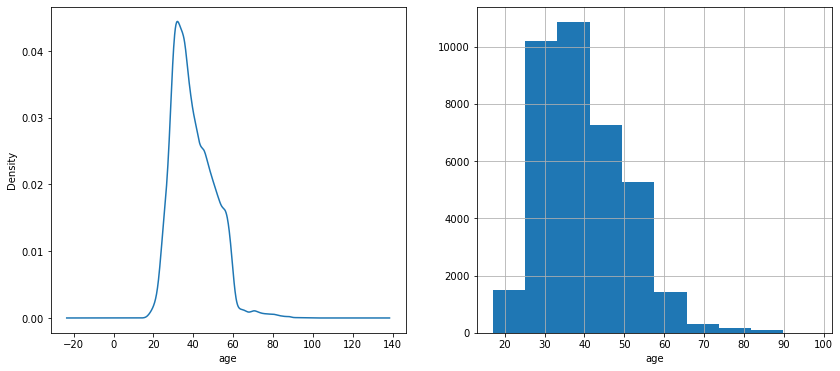

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
bank['age'].plot(kind='density')
plt.xlabel('age')
plt.subplot(1,2,2)
bank['age'].hist()
plt.xlabel('age')
plt.show()

#### Grouping ages in bins:

In [16]:
age,k=bank[['age','y']].copy(deep=True),[]
for i in bank['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    elif i>65:
        k.append('Group>65')
    else:
        continue
age['Groups']=k

In [17]:
print('percentage of data with respect to age groups\n',np.round(age['Groups'].value_counts()/len(age)*100)) 
print('\npercentage of data who has subsribed with respect to age groups\n', np.round(age[age['y']=='yes']['Groups'].value_counts()/len(age[age['y']=='yes']['Groups'])*100)) 
print('\npercentage of data who has not subscribed with respect to age groups\n', np.round(age[age['y']=='no']['Groups'].value_counts()/len(age[age['y']=='no']['Groups'])*100))

percentage of data with respect to age groups
 25<Group<=45    67.0
45<Group<=65    27.0
Group<25         4.0
Group>65         2.0
Name: Groups, dtype: float64

percentage of data who has subsribed with respect to age groups
 25<Group<=45    61.0
45<Group<=65    25.0
Group<25         7.0
Group>65         6.0
Name: Groups, dtype: float64

percentage of data who has not subscribed with respect to age groups
 25<Group<=45    68.0
45<Group<=65    28.0
Group<25         4.0
Group>65         1.0
Name: Groups, dtype: float64


###### We can see that most percent of the data belongs to the age group 25 to 65.

y             total      yes %       no %
Groups                                   
25<Group<=45  24912  10.280186  89.719814
45<Group<=65  10114  10.529958  89.470042
Group<25       1492  21.045576  78.954424
Group>65        566  47.349823  52.650177


<AxesSubplot:xlabel='Groups'>

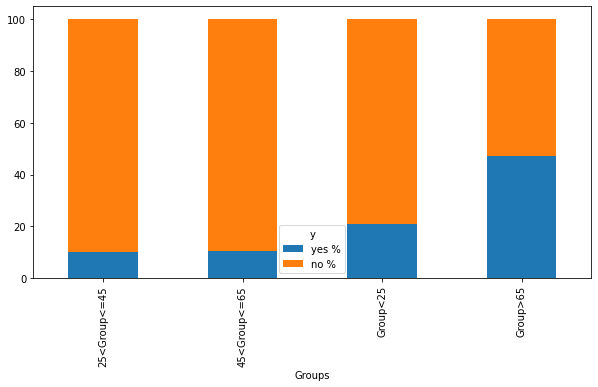

In [18]:
df=pd.crosstab(age['Groups'],age['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df[['total','yes %','no %']])
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))

We can see that more people subscribe from the Group of age greater than 65.

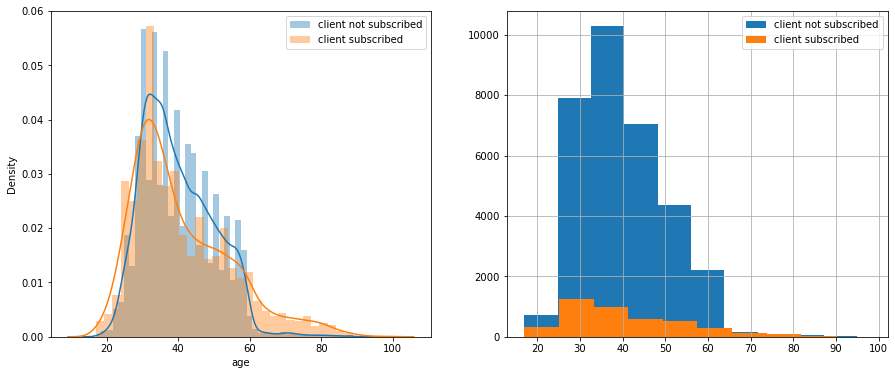

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(bank[bank['y']=='no']['age'],label='client not subscribed')
sns.distplot(bank[bank['y']=='yes']['age'],label='client subscribed')
plt.legend()
plt.subplot(1,2,2)
bank[bank['y']=='no']['age'].hist(label='client not subscribed')
bank[bank['y']=='yes']['age'].hist(label='client subscribed')
plt.legend()
plt.show()

### Marital:

<AxesSubplot:xlabel='marital', ylabel='count'>

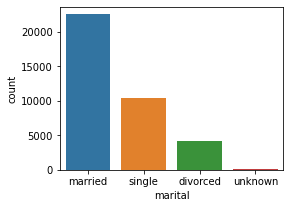

In [20]:
plt.figure(figsize=(4,3))
sns.countplot(bank['marital'])

y            no   yes  total       no %      yes %
marital                                           
divorced   3699   427   4126  89.650994  10.349006
married   20187  2292  22479  89.803817  10.196183
single     8930  1477  10407  85.807629  14.192371
unknown      60    12     72  83.333333  16.666667


<AxesSubplot:xlabel='marital'>

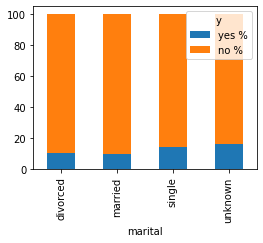

In [21]:
df=pd.crosstab(bank['marital'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(4,3))

In [22]:
yes=pd.DataFrame(bank[bank['y']=='yes']['marital'].value_counts()/len(bank['marital'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['marital'].value_counts()/len(bank['marital'])*100).reset_index()

distribution=pd.merge(yes,no,on='index').rename(columns={'index':'marital','marital_x':'subscribed%' ,
                                                         'marital_y':'not subscribed%'})
print('distribution of data ')
print(distribution)

distribution of data 
    marital  subscribed%  not subscribed%
0   married     6.180563        54.435875
1    single     3.982850        24.080466
2  divorced     1.151440         9.974652
3   unknown     0.032359         0.161795


Age and Marital status is suspected to have high correlation among themselves.

### Education:

y                      no   yes  total       no %      yes %
education                                                   
basic.4y             3374   391   3765  89.614874  10.385126
basic.6y             1903   171   2074  91.755063   8.244937
basic.9y             5001   420   5421  92.252352   7.747648
high.school          7597   945   8542  88.937017  11.062983
illiterate             14     2     16  87.500000  12.500000
professional.course  4205   541   4746  88.600927  11.399073
university.degree    9464  1507  10971  86.263786  13.736214
unknown              1318   231   1549  85.087153  14.912847


<AxesSubplot:xlabel='education'>

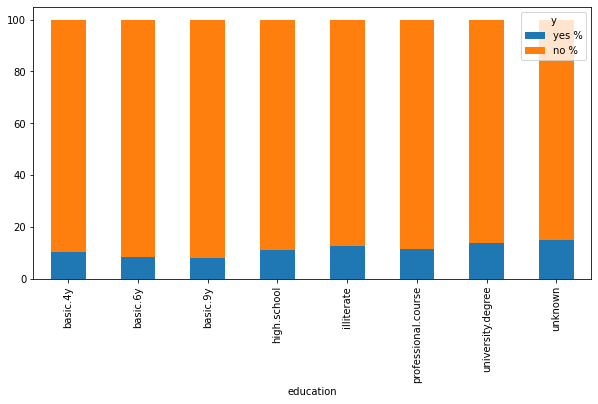

In [23]:
df=pd.crosstab(bank['education'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))

In [24]:
yes=pd.DataFrame(bank[bank['y']=='yes']['education'].value_counts()/len(bank['education'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['education'].value_counts()/len(bank['education'])*100).reset_index()

distribution=pd.merge(yes,no,on='index').rename(columns={'index':'education','education_x':'subscribed%' ,
                                                         'education_y':'not subscribed%'})
print('Distribution of data:')
print(distribution)

print('\nEducation proportions of the subscribers:')
print(bank[bank['y']=='yes']['education'].value_counts()/len(bank[bank['y']=='yes']['education'])*100)
print('\nEducation proportions of the non subscribers:')
print(bank[bank['y']=='no']['education'].value_counts()/len(bank[bank['y']=='no']['education'])*100)

Distribution of data:
             education  subscribed%  not subscribed%
0    university.degree     4.063747        25.520440
1          high.school     2.548269        20.485924
2  professional.course     1.458850        11.339122
3             basic.9y     1.132564        13.485600
4             basic.4y     1.054363         9.098263
5              unknown     0.622910         3.554093
6             basic.6y     0.461115         5.131593
7           illiterate     0.005393         0.037752

Education proportions of the subscribers:
university.degree      35.812738
high.school            22.457224
professional.course    12.856464
basic.9y                9.980989
basic.4y                9.291825
unknown                 5.489544
basic.6y                4.063688
illiterate              0.047529
Name: education, dtype: float64

Education proportions of the non subscribers:
university.degree      28.786957
high.school            23.108042
basic.9y               15.211705
professional.cou

### Default: default: has credit in default? (yes or no)

y           no   yes  total        no %      yes %
default                                           
no       25576  3806  29382   87.046491  12.953509
unknown   7298   402   7700   94.779221   5.220779
yes          2     0      2  100.000000   0.000000


<AxesSubplot:title={'center':'Default'}, xlabel='default'>

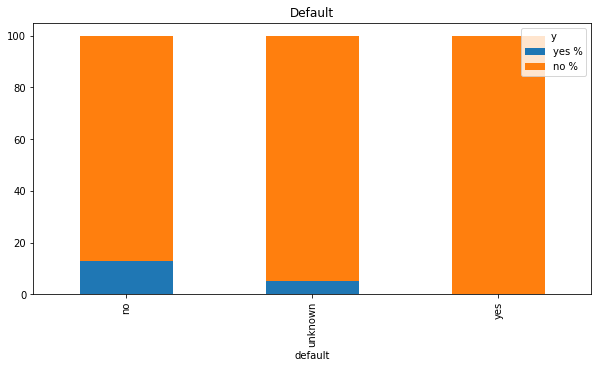

In [25]:
df=pd.crosstab(bank['default'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5),title='Default')

Too many unknown values present in most of the features. We need to impute the missing values and will handle them in the missing value treatment.

In [26]:
print('percentage of subscribers have credit and dont have credit')
print(bank[bank['y']=='yes']['default'].value_counts()/len(bank[bank['y']=='yes']['default'])*100)


percentage of subscribers have credit and dont have credit
no         90.446768
unknown     9.553232
Name: default, dtype: float64


90.4 % customers don't have credit who have subscribed.

In [27]:
print('percentage of non subscribers have credit and dont have credit')

print(bank[bank['y']=='no']['default'].value_counts()/len(bank[bank['y']=='no']['default'])*100)

percentage of non subscribers have credit and dont have credit
no         77.795352
unknown    22.198564
yes         0.006083
Name: default, dtype: float64


### Housing: 
Customer has housing loan? (yes or no )

y           no   yes  total       no %      yes %
housing                                          
no       14931  1838  16769  89.039299  10.960701
unknown    791    91    882  89.682540  10.317460
yes      17154  2279  19433  88.272526  11.727474


<AxesSubplot:title={'center':'Housing Loan'}, xlabel='housing'>

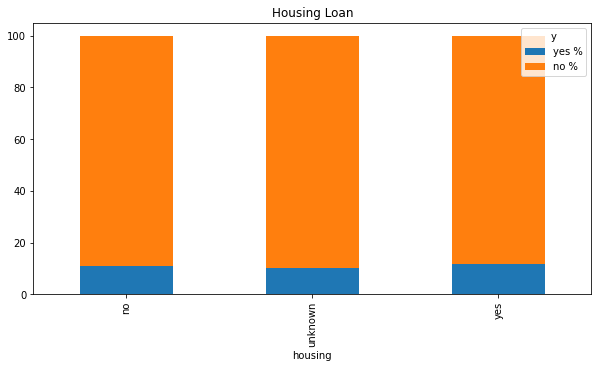

In [28]:
df=pd.crosstab(bank['housing'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5),title='Housing Loan')

In [29]:
print('percentage of non subscribers v/s have/dont have housing loan')
print(bank[bank['y']=='no']['housing'].value_counts()/len(bank[bank['y']=='no']['housing'])*100)
print('percentage of  subscribers v/s have/dont have housing loan')
print(bank[bank['y']=='yes']['housing'].value_counts()/len(bank[bank['y']=='yes']['housing'])*100)

percentage of non subscribers v/s have/dont have housing loan
yes        52.177881
no         45.416109
unknown     2.406010
Name: housing, dtype: float64
percentage of  subscribers v/s have/dont have housing loan
yes        54.158745
no         43.678707
unknown     2.162548
Name: housing, dtype: float64


#### Conclusion:
    52.17 % of non subscribers have housing loan.
    45.41 % of non subscribers dont have housing loan.
    54.15 % of subscribers have housing loan.
    43.67 % of subscribers dont have housing loan.

In [30]:
yes=pd.DataFrame(bank[bank['y']=='yes']['housing'].value_counts()/len(bank['housing'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['housing'].value_counts()/len(bank['housing'])*100).reset_index()

distribution=pd.merge(yes,no,on='index').rename(columns={'index':'housingLoan','housing_x':'subscribed%' ,
                                                         'housing_y':'not subscribed%'})
print('percentage of the client who have/donthave housing Loan')
print(distribution)

percentage of the client who have/donthave housing Loan
  housingLoan  subscribed%  not subscribed%
0         yes     6.145507        46.257146
1          no     4.956315        40.262647
2     unknown     0.245389         2.132995


### Loan:
loan: has personal loan? ("yes" or "no")

In [31]:
yes=pd.DataFrame(bank[bank['y']=='yes']['loan'].value_counts()/len(bank['loan'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['loan'].value_counts()/len(bank['loan'])*100).reset_index()

distribution=pd.merge(yes,no,on='index').rename(columns={'index':'PersonalLoan','loan_x':'subscribed%' ,
                                                         'loan_y':'not subscribed%'})
print('percentage of the client who has/hasnot Personal Loan')
print(distribution)

percentage of the client who has/hasnot Personal Loan
  PersonalLoan  subscribed%  not subscribed%
0           no     9.435336        72.974868
1          yes     1.666487        13.544925
2      unknown     0.245389         2.132995


y           no   yes  total       no %      yes %
loan                                             
no       27062  3499  30561  88.550767  11.449233
unknown    791    91    882  89.682540  10.317460
yes       5023   618   5641  89.044496  10.955504


<AxesSubplot:title={'center':'Personal Loan'}, xlabel='loan'>

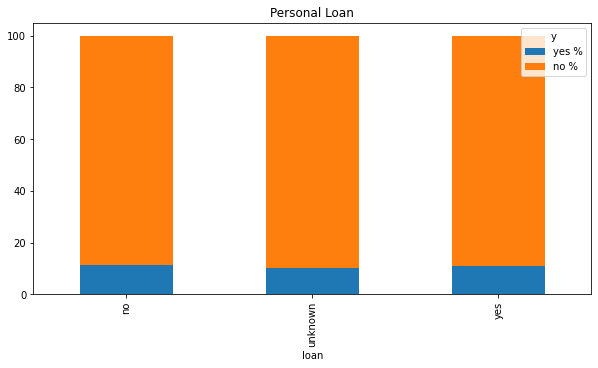

In [32]:
df=pd.crosstab(bank['loan'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5), title='Personal Loan')

In [33]:
print('Proportion of subscribers have personal loan:')
print(bank[bank['y']=='yes']['loan'].value_counts()/len(bank[bank['y']=='yes']['loan'])*100)
print('\nProportion of non subscribers have personal loan:')
print(bank[bank['y']=='no']['loan'].value_counts()/len(bank[bank['y']=='no']['loan'])*100)

Proportion of subscribers have personal loan:
no         83.151141
yes        14.686312
unknown     2.162548
Name: loan, dtype: float64

Proportion of non subscribers have personal loan:
no         82.315367
yes        15.278623
unknown     2.406010
Name: loan, dtype: float64


#### Conclusion:
        14.68 % of the clients who have subscribed have personal loan.
        15.27 % of the clients who have not subscribed have personal loan.

# Last campaign Data:
### Contact:
contact: contact communication type.(categorical:"telephone","cellular") 

In [34]:
bank['contact'].value_counts()/len(bank['contact'])*100

cellular     63.428972
telephone    36.571028
Name: contact, dtype: float64

#### Note:
    63.42 % of the clients were approached through cellular-contact  and 
    36.57% of the clients were approached through telephonic communication.

y             no   yes  total       no %      yes %
contact                                            
cellular   20030  3492  23522  85.154324  14.845676
telephone  12846   716  13562  94.720543   5.279457


<AxesSubplot:xlabel='contact'>

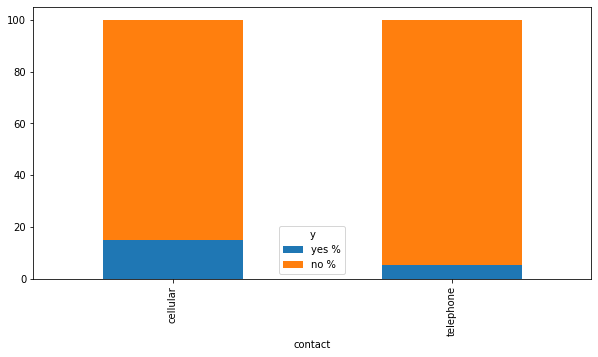

In [35]:
df=pd.crosstab(bank['contact'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))

In [36]:
yes=pd.DataFrame(bank[bank['y']=='yes']['contact'].value_counts()/len(bank['contact'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['contact'].value_counts()/len(bank['contact'])*100).reset_index()
distribution=pd.merge(yes,no,on='index').rename(columns={'index':'contact','contact_x':'subscribed%' ,
                                                         'contact_y':'not subscribed%'})
print('Percentage of the client with respect to Mode of Contact:')
print(distribution)

Percentage of the client with respect to Mode of Contact:
     contact  subscribed%  not subscribed%
0   cellular     9.416460        54.012512
1  telephone     1.930752        34.640276


In [37]:
print(bank[bank['y']=='yes']['contact'].value_counts()/len(bank[bank['y']=='yes']['contact'])*100)

cellular     82.984791
telephone    17.015209
Name: contact, dtype: float64


Of all the people who have subscribed 82.9% clients were approached through cellular contact.

### Day:
day: last contact day of the month (numeric)

In [38]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37084 entries, 0 to 37083
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

In [39]:
(bank['day_of_week'].value_counts())

thu    7778
mon    7671
wed    7341
tue    7262
fri    7032
Name: day_of_week, dtype: int64

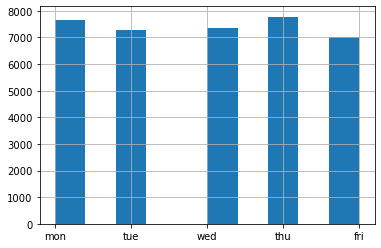

In [40]:
bank['day_of_week'].hist()
plt.show()

y              no  yes  total       no %      yes %
day_of_week                                        
fri          6267  765   7032  89.121160  10.878840
mon          6908  763   7671  90.053448   9.946552
thu          6815  963   7778  87.618925  12.381075
tue          6403  859   7262  88.171303  11.828697
wed          6483  858   7341  88.312219  11.687781


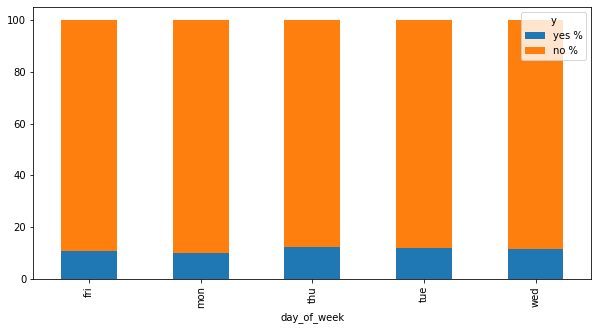

In [41]:
df=pd.crosstab(bank['day_of_week'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))
plt.show()

#### Conclusion:
        Highest number of clients gained on Thursday(12.38%)

### Month: 
last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

y         no  yes  total       no %      yes %
month                                         
apr     1892  496   2388  79.229481  20.770519
aug     4973  589   5562  89.410284  10.589716
dec       84   82    166  50.602410  49.397590
jul     5839  591   6430  90.808709   9.191291
jun     4278  508   4786  89.385708  10.614292
mar      241  246    487  49.486653  50.513347
may    11607  813  12420  93.454106   6.545894
nov     3328  377   3705  89.824561  10.175439
oct      351  279    630  55.714286  44.285714
sep      283  227    510  55.490196  44.509804


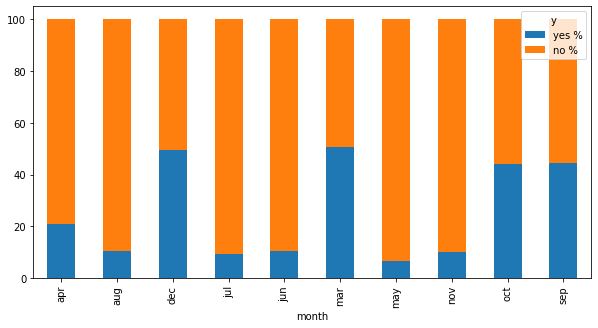

In [42]:
df=pd.crosstab(bank['month'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))
plt.show()

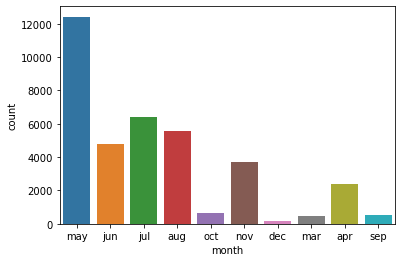

In [43]:
sns.countplot(bank['month'])
plt.show()

We can see that 71 % of the contacts were made between may to august.

In [44]:
yes=pd.DataFrame(bank[bank['y']=='yes']['month'].value_counts()/len(bank['month'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['month'].value_counts()/len(bank['month'])*100).reset_index()
distribution=pd.merge(yes,no,on='index').rename(columns={'index':'month','month_x':'subscribed%' ,
                                                         'month_y':'not subscribed%'})
print('Percentage of the clients contacted:')
print(distribution)
yes=pd.DataFrame(bank[bank['y']=='yes']['month'].value_counts()/len(bank[bank['y']=='yes']['month'])*100).reset_index()
no=pd.DataFrame(bank[bank['y']=='no']['month'].value_counts()/len(bank[bank['y']=='no']['month'])*100).reset_index()
distribution=pd.merge(yes,no,on='index').rename(columns={'index':'month','month_x':'subscribed%' ,
                                                         'month_y':'not subscribed%'})
print('\nPercentage of the subscribers:')
print(distribution)

Percentage of the clients contacted:
  month  subscribed%  not subscribed%
0   may     2.192320        31.299213
1   jul     1.593679        15.745335
2   aug     1.588286        13.410096
3   jun     1.369863        11.535972
4   apr     1.337504         5.101931
5   nov     1.016611         8.974221
6   oct     0.752346         0.946500
7   mar     0.663359         0.649876
8   sep     0.612124         0.763132
9   dec     0.221120         0.226513

Percentage of the subscribers:
  month  subscribed%  not subscribed%
0   may    19.320342        35.305390
1   jul    14.044677        17.760676
2   aug    13.997148        15.126536
3   jun    12.072243        13.012532
4   apr    11.787072         5.754958
5   nov     8.959125        10.122886
6   oct     6.630228         1.067648
7   mar     5.846008         0.733058
8   sep     5.394487         0.860810
9   dec     1.948669         0.255506


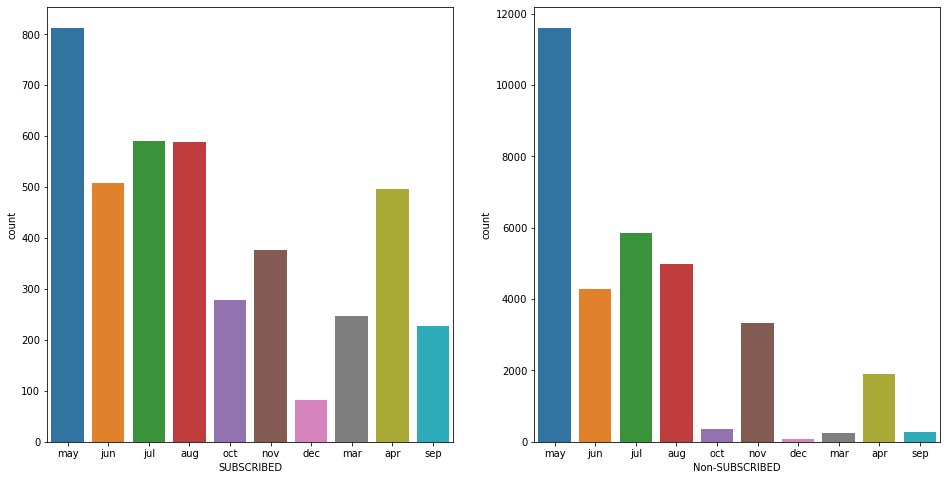

In [45]:
plt.rcParams['figure.figsize']=[16,8]
plt.subplot(1,2,1)
sns.countplot(bank[bank['y']=='yes']['month'])
plt.xlabel('SUBSCRIBED')
plt.subplot(1,2,2)
sns.countplot(bank[bank['y']=='no']['month'])
plt.xlabel('Non-SUBSCRIBED')
plt.show()

### Duration:
duration: last contact duration:

<AxesSubplot:xlabel='duration', ylabel='Density'>

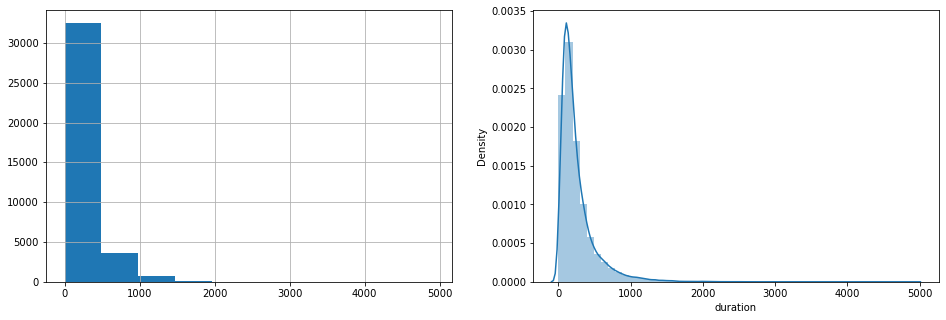

In [46]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
bank['duration'].hist()
plt.subplot(1,2,2)
sns.distplot(bank['duration'])

#### Converting to minutes:

In [47]:
minutes=bank[['duration']]/60

<AxesSubplot:xlabel='duration', ylabel='Density'>

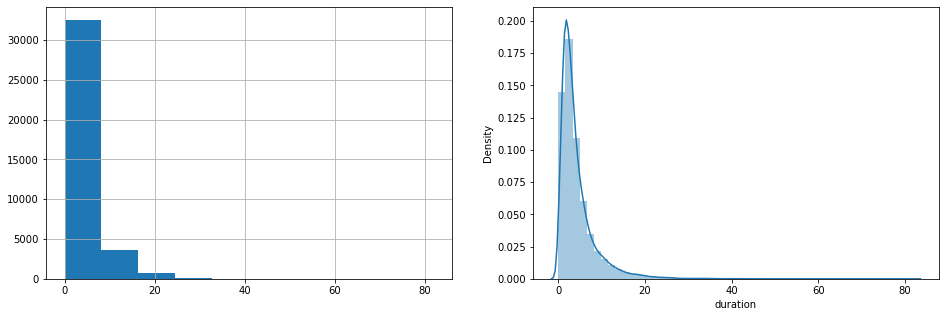

In [48]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
minutes['duration'].hist()
plt.subplot(1,2,2)
sns.distplot(minutes['duration'])

In [49]:
k=[]
for i in minutes['duration']:
    if i<=5:
        k.append('<=5')
    elif i>5 and i<=10:
        k.append('>5&<=10')
    elif i>10 and i<=15:
        k.append('>10&<=15')
    elif i>15 and i<=20:
        k.append('>15&<=20')
    else:
        k.append('>20')
minutes['time']=k

In [50]:
minutes['y']=bank['y']

y            no   yes  total       no %      yes %
time                                              
<=5       25627  1361  26988  94.957018   5.042982
>10&<=15   1142   842   1984  57.560484  42.439516
>15&<=20    294   400    694  42.363112  57.636888
>20         171   289    460  37.173913  62.826087
>5&<=10    5642  1316   6958  81.086519  18.913481


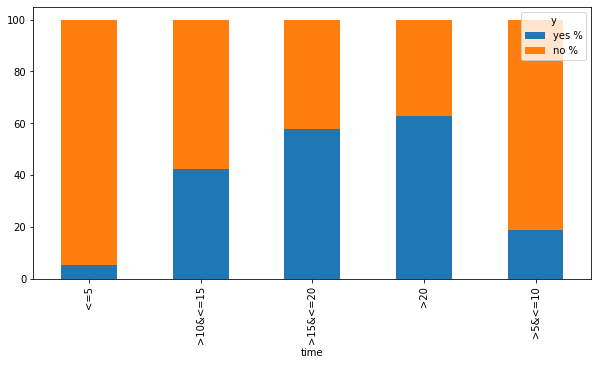

In [51]:
df=pd.crosstab(minutes['time'],minutes['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))
plt.show()

In [52]:
yes=pd.DataFrame(minutes[minutes['y']=='yes']['time'].value_counts()/len(minutes['time'])*100).reset_index()
no=pd.DataFrame(minutes[minutes['y']=='no']['time'].value_counts()/len(minutes['time'])*100).reset_index()
distribution=pd.merge(yes,no,on='index').rename(columns={'index':'time','time_x':'subscribed%' ,
                                                         'time_y':'not subscribed%'})
print('percentage of the client wrt Mode of Contact')
print(distribution)

yes=pd.DataFrame(minutes[minutes['y']=='yes']['time'].value_counts()/len(minutes[minutes['y']=='yes'])*100).reset_index()
no=pd.DataFrame(minutes[minutes['y']=='no']['time'].value_counts()/len(minutes[minutes['y']=='no'])*100).reset_index()
distribution=pd.merge(yes,no,on='index').rename(columns={'index':'time','time_x':'subscribed%' ,
                                                         'time_y':'not subscribed%'})
print('\npercentage of the client wrt Mode of Contact')
print(distribution)

percentage of the client wrt Mode of Contact
       time  subscribed%  not subscribed%
0       <=5     3.670046        69.105275
1   >5&<=10     3.548700        15.214109
2  >10&<=15     2.270521         3.079495
3  >15&<=20     1.078632         0.792795
4       >20     0.779312         0.461115

percentage of the client wrt Mode of Contact
       time  subscribed%  not subscribed%
0       <=5    32.343156        77.950481
1   >5&<=10    31.273764        17.161455
2  >10&<=15    20.009506         3.473659
3  >15&<=20     9.505703         0.894269
4       >20     6.867871         0.520136


#### Conclusion:
Looks like 65 percent of the subscribers has time cintact duration less than 10 minutes.

##### Note: 
    Considering time duration greater than 10 minutes 
    35 percent of the subscribers while 5 % of non subscribing clients that         have not subscribed.

We can say chances of client subscribing is way more when call duration is greater than 10 minutes.

# Other Atrributes:
### Campaign:
campaign: number of contacts performed during this campaign and for this client.

In [53]:
total=pd.DataFrame(bank['campaign'].value_counts()).reset_index().rename(
    columns={'index':'number_of_approaches','campaign':'total'})

yes=pd.DataFrame(bank[bank['y']=='yes']['campaign'].value_counts()).reset_index().rename(
    columns={'index':'number_of_approaches','campaign':'yes'})

no=pd.DataFrame(bank[bank['y']=='no']['campaign'].value_counts()).reset_index().rename(
    columns={'index':'number_of_approaches','campaign':'no'})

success=pd.merge(pd.merge(total,yes,on='number_of_approaches',how='outer'),no,on='number_of_approaches',how='outer')
success['successrate']=success[success['number_of_approaches']<=32]['yes']/success['total']*100
success

number_of_approaches  total     yes     no  successrate
0                      1  15883  2090.0  13793    13.158723
1                      2   9532  1094.0   8438    11.477130
2                      3   4777   515.0   4262    10.780825
3                      4   2389   235.0   2154     9.836752
4                      5   1441   110.0   1331     7.633588
5                      6    873    69.0    804     7.903780
6                      7    580    33.0    547     5.689655
7                      8    360    14.0    346     3.888889
8                      9    260    13.0    247     5.000000
9                     10    196    10.0    186     5.102041
10                    11    165    11.0    154     6.666667
11                    12    118     3.0    115     2.542373
12                    13     88     3.0     85     3.409091
13                    14     62     1.0     61     1.612903
14                    17     49     4.0     45     8.163265
15                    16     45     NaN     45          NaN
16                    15     41     2.0     39     4.878049
17                    18     32     NaN     32          NaN
18                    20     28     NaN     28          NaN
19                    19     25     NaN     25          NaN
20                    21     24     NaN     24          NaN
21                    24     14     NaN     14          NaN
22                    23     14     1.0     13     7.142857
23                    22     14     NaN     14          NaN
24                    27      9     NaN      9          NaN
25                    28      8     NaN      8          NaN
26                    29      8     NaN      8          NaN
27                    26      7     NaN      7          NaN
28                    25      6     NaN      6          NaN
29                    30      6     NaN      6          NaN
30                    31      6     NaN      6          NaN
31                    35      4     NaN      4          NaN
32                    33      4     NaN      4          NaN
33                    32      4     NaN      4          NaN
34                    34      3     NaN      3          NaN
35                    43      2     NaN      2          NaN
36                    40      2     NaN      2          NaN
37                    42      1     NaN      1          NaN
38                    41      1     NaN      1          NaN
39                    56      1     NaN      1          NaN
40                    39      1     NaN      1          NaN
41                    37      1     NaN      1          NaN

#### Conclusion:
We see that 87% of subscribers comes from first 3 attemts only and the no of subscribers decreases from so on such that .55% of subscribers comes from more than 10 attempts.
If we look at the success rate it is more than 10% for first 10 attempts.

In [54]:
print('Percentage of subscribers in first 10 attempts:')
print((success[success['number_of_approaches']<=32]['yes']/success['yes'].sum()*100)[0:10])

Percentage of subscribers in first 10 attempts:
0    49.667300
1    25.998099
2    12.238593
3     5.584601
4     2.614068
5     1.639734
6     0.784221
7     0.332700
8     0.308935
9     0.237643
Name: yes, dtype: float64


In [55]:
success['no'].sum()+success['yes'].sum()

37084.0

Text(0.5, 0, 'success rate')

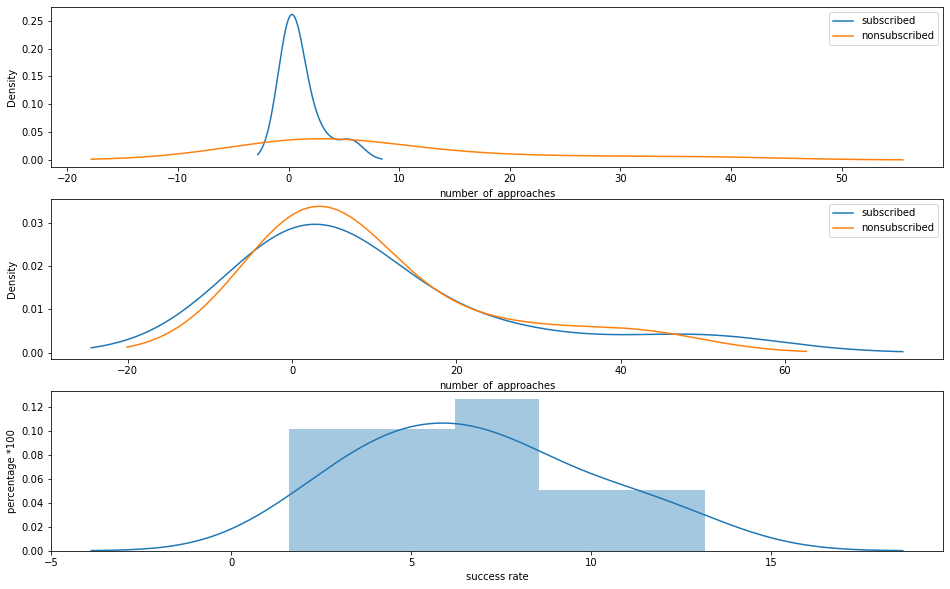

In [56]:
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
(success[success['number_of_approaches']<=32]['yes']/37084.0*100)[0:10].plot(kind='density',label='subscribed')
(success[success['number_of_approaches']<=32]['no']/37084.0*100)[0:10].plot(kind='density',label='nonsubscribed')
plt.xlabel('number_of_approaches')
plt.legend()
plt.subplot(3,1,2)
(success[success['number_of_approaches']<=32]['yes']/success['yes'].sum()*100)[0:10].plot(kind='density',label='subscribed')
(success[success['number_of_approaches']<=32]['no']/success['no'].sum()*100)[0:10].plot(kind='density',label='nonsubscribed')
plt.legend()
plt.xlabel('number_of_approaches')
plt.subplot(3,1,3)
sns.distplot(success['successrate'])
plt.ylabel('percentage *100')
plt.xlabel('success rate')

### Pdays: 
number of days that passed by after the client was last contacted from a previous campaign (numeric, 999 means client was not previously contacted)

<AxesSubplot:>

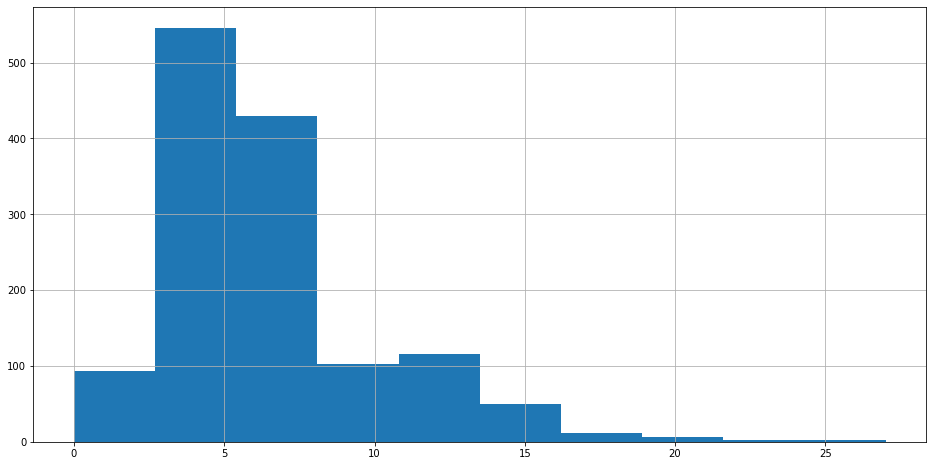

In [57]:
bank[bank['pdays']<999]['pdays'].hist()

As seen if pdays =999 then client has never been contacted before.

Grouping New-Clients and Old-Clients:

In [58]:
k=[]
for i in bank['pdays']:
    if i==999:
        k.append('newClients')
    else:
        k.append('oldClients')
df=bank[['y']].copy(deep=True)
df['type']=k

y              no   yes  total       no %      yes %
type                                                
newClients  32391  3331  35722  90.675214   9.324786
oldClients    485   877   1362  35.609398  64.390602


<AxesSubplot:xlabel='type'>

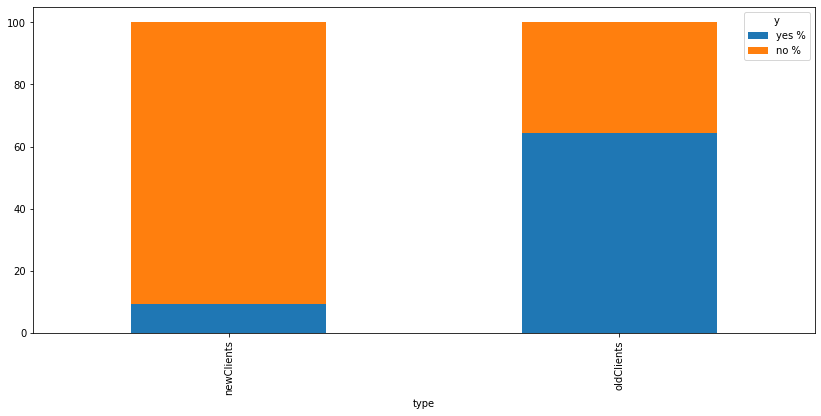

In [59]:
df=pd.crosstab(df['type'],df['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
plt.rcParams['figure.figsize']=[14,6]
df[['yes %','no %']].plot(kind='bar',stacked=True)

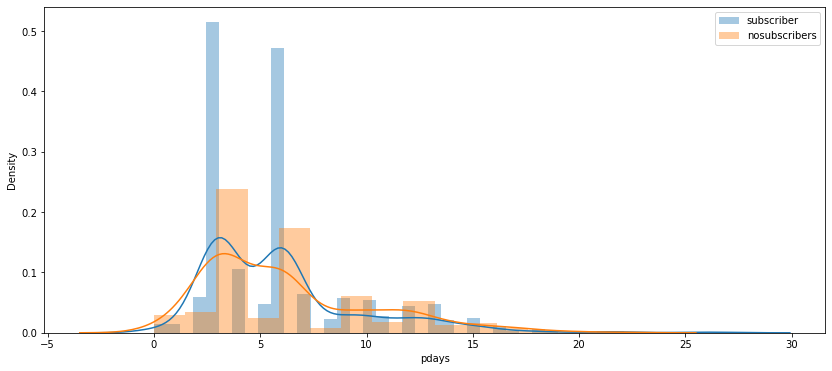

In [60]:
client=bank[bank['pdays']<999][['pdays','y']]
sns.distplot(client[client['y']=='yes']['pdays'],label='subscriber')
sns.distplot(client[client['y']=='no']['pdays'],label='nosubscribers')
plt.legend()
plt.show()

If the old client is old >8 days then chances of non subscribing are more.

### Previous:
Number of contacts performed before this campaign and for this client (numeric)

In [61]:
print('number of newly approached clients')
print(bank[bank['pdays']==999].shape[0])
print('number of clients who were approached zero times before this')
print(bank[bank['previous']==0].shape[0])
print('number of old  clients')
print(bank[bank['pdays']<999].shape[0])
print('number of clients who were approached zero times before this')
print(bank[bank['previous']>0].shape[0])

number of newly approached clients
35722
number of clients who were approached zero times before this
32023
number of old  clients
1362
number of clients who were approached zero times before this
5061



Proportion of old clients new clients subscribed/not subscribed:
y              no   yes  total       no %      yes %
type                                                
newClients  32391  3331  35722  90.675214   9.324786
oldClients    485   877   1362  35.609398  64.390602


<AxesSubplot:xlabel='type'>

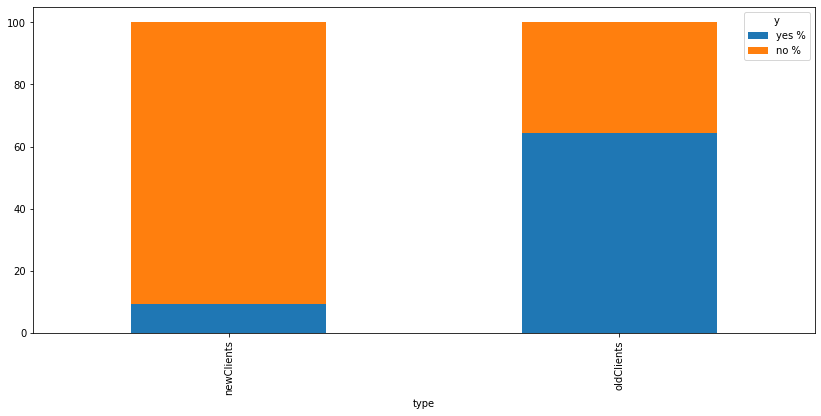

In [62]:
k=[]
for i in bank['pdays']:
    if i==999:
        k.append('newClients')
    else:
        k.append('oldClients')
df=bank[['y']].copy(deep=True)
df['type']=k

print('\nProportion of old clients new clients subscribed/not subscribed:')
df=pd.crosstab(df['type'],minutes['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
plt.rcParams['figure.figsize']=[14,6]
df[['yes %','no %']].plot(kind='bar',stacked=True)

Text(0.5, 0, 'no of approaches made previously for old clients data upto 15 approaches')

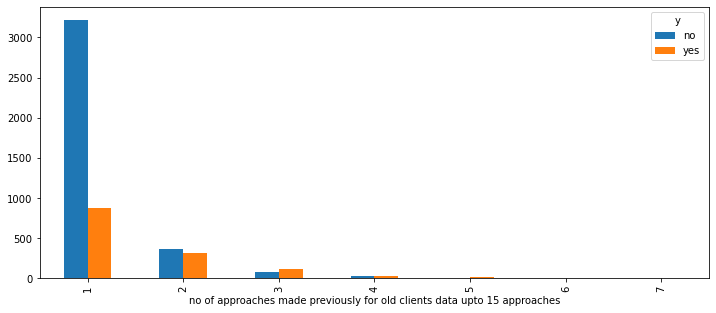

In [63]:
k=bank[bank['previous']>0][['previous','y']]
plt.rcParams['figure.figsize']=[12,5]
pd.crosstab(k[k['previous']<15]['previous'],k[k['previous']<15]['y']).plot(kind='bar')
plt.xlabel('no of approaches made previously for old clients data upto 15 approaches')

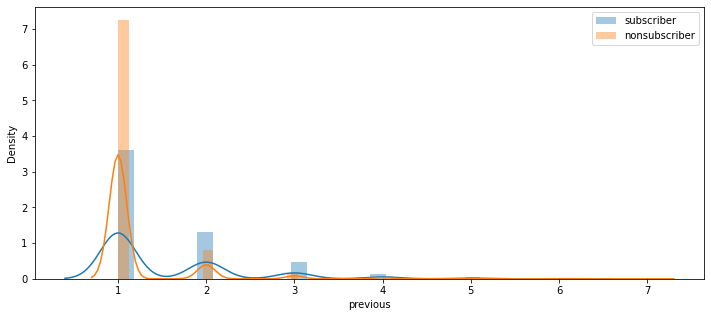

In [64]:
sns.distplot(bank[(bank['previous']>0)&(bank['previous']<30)&(bank['y']=='yes')]['previous'],label='subscriber')
sns.distplot(bank[(bank['previous']>0)&(bank['previous']<30)&(bank['y']=='no')]['previous'],label='nonsubscriber')
plt.legend()
plt.show()

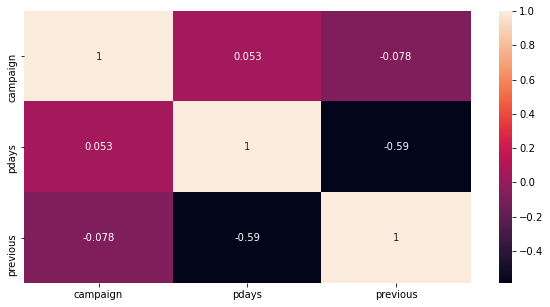

In [65]:
plt.rcParams['figure.figsize']=[10,5]
sns.heatmap(bank[['campaign','pdays','previous']].corr(),annot=True)
plt.show()

hence, we can see high correlation with previous,pdays.

### Poutcome:
Outcome of the previous marketing campaign (categorical: "nonexistent","failure","success")

In [66]:
bank['poutcome'].value_counts()

nonexistent    32023
failure         3822
success         1239
Name: poutcome, dtype: int64

y               no   yes  total       no %      yes %
poutcome                                             
failure       3274   548   3822  85.661957  14.338043
nonexistent  29178  2845  32023  91.115761   8.884239
success        424   815   1239  34.221146  65.778854


<AxesSubplot:xlabel='poutcome'>

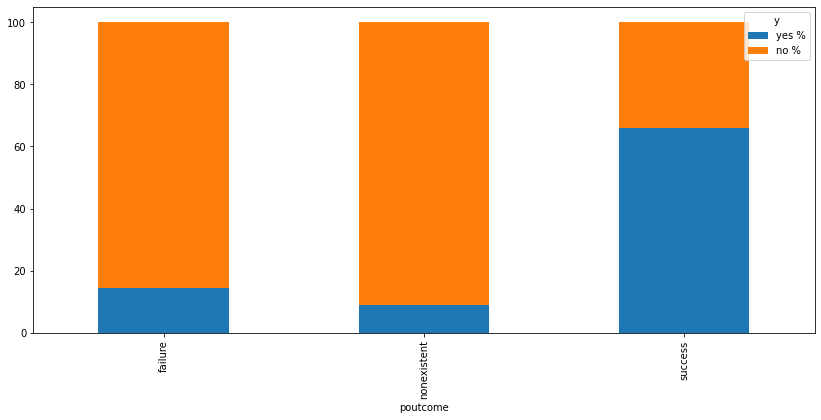

In [67]:
df=pd.crosstab(bank['poutcome'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
plt.rcParams['figure.figsize']=[14,6]
df[['yes %','no %']].plot(kind='bar',stacked=True)

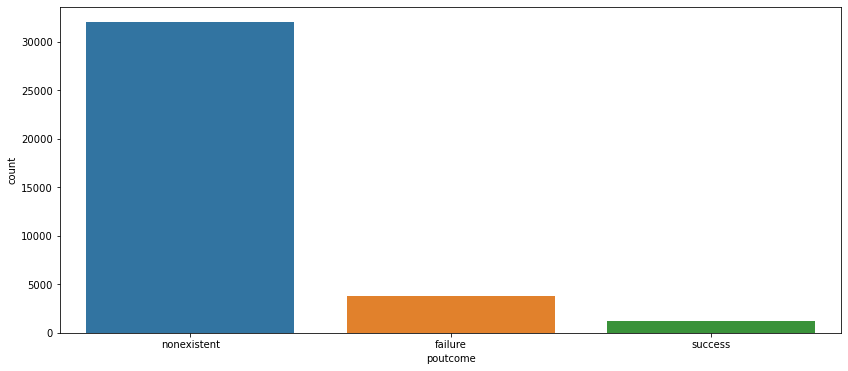

In [68]:
sns.countplot(bank['poutcome'])
plt.show()

Poutcome for nonexistent =32939, while newly contacted clients= 35722,hence, looks to be collinear.

## Distribution of Quarterly Indicators:

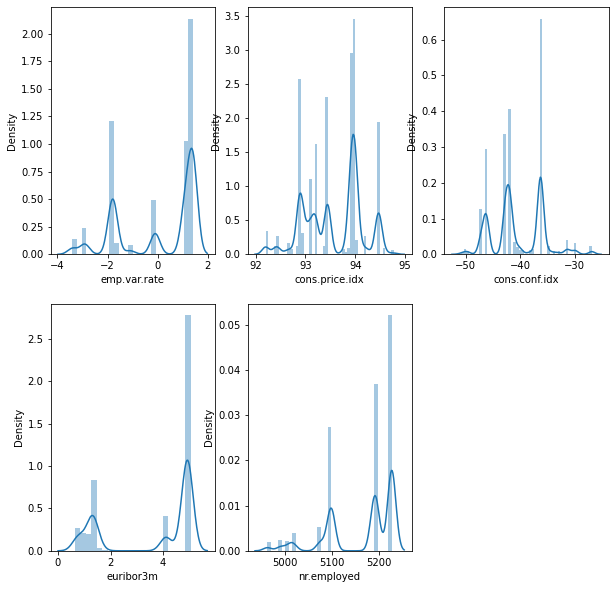

In [69]:
plt.subplot(231)
sns.distplot(bank['emp.var.rate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(bank['cons.price.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(bank['cons.conf.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(bank['euribor3m'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(bank['nr.employed'])
fig = plt.gcf()
fig.set_size_inches(10,10)

### Insights:

    1.We can see there is a high employee variation rate which signifies that they have made the campaign when there were high shifts in job due to conditions of economy
    2.The Consumer price index is also good which shows the leads where having good price to pay for goods and services may be that could be the reason to stimulate these leads into making a deposit and plant the idea of savings
    3.Consumer confidence index is pretty low as they don't have much confidence on the fluctuating economy
    4.The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. In our case the interest rates are high for lending their loans
    5.The number of employees were also at peak which can increase their income index that could be the reason the campaign targetted the leads who were employeed to make a deposit

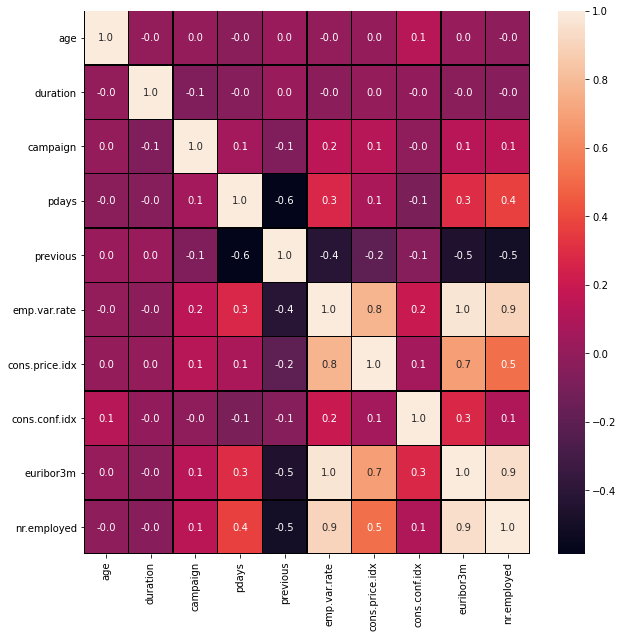

In [70]:

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(bank.drop(['Customer_id','Postal Code'],axis=1).corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

### Insights:

    1.The indicators have correlation among themselves
    2.Number of employees rate is highly correlated with employee variation rate
    3.Consumer price index is highly correlated with bank interest rate( higher the price index, higher the interest rate)
    4.Employee variation rate also correlates with the bank interest rates

# Bi-variate and Multi-variate Analysis:

### Age-Default:

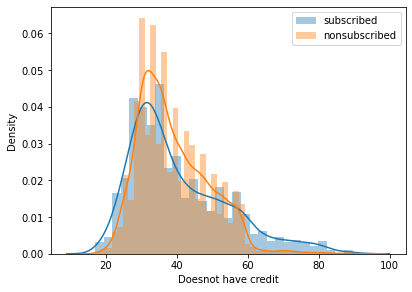

In [71]:

plt.rcParams['figure.figsize']=[14,10]

plt.subplot(2,2,2)
sns.distplot(bank[(bank['default']=='no')&(bank['y']=='yes')]['age'],label='subscribed')
sns.distplot(bank[(bank['default']=='no')&(bank['y']=='no')]['age'],label='nonsubscribed')
plt.xlabel('Doesnot have credit')
plt.legend()
plt.show()

y                        no   yes
Groups       default             
25<Group<=45 no       18193  2339
             unknown   4158   222
45<Group<=65 no        6039   920
             unknown   3008   145
             yes          2     0
Group<25     no        1070   306
             unknown    108     8
Group>65     no         274   241
             unknown     24    27


<AxesSubplot:xlabel='Groups,default'>

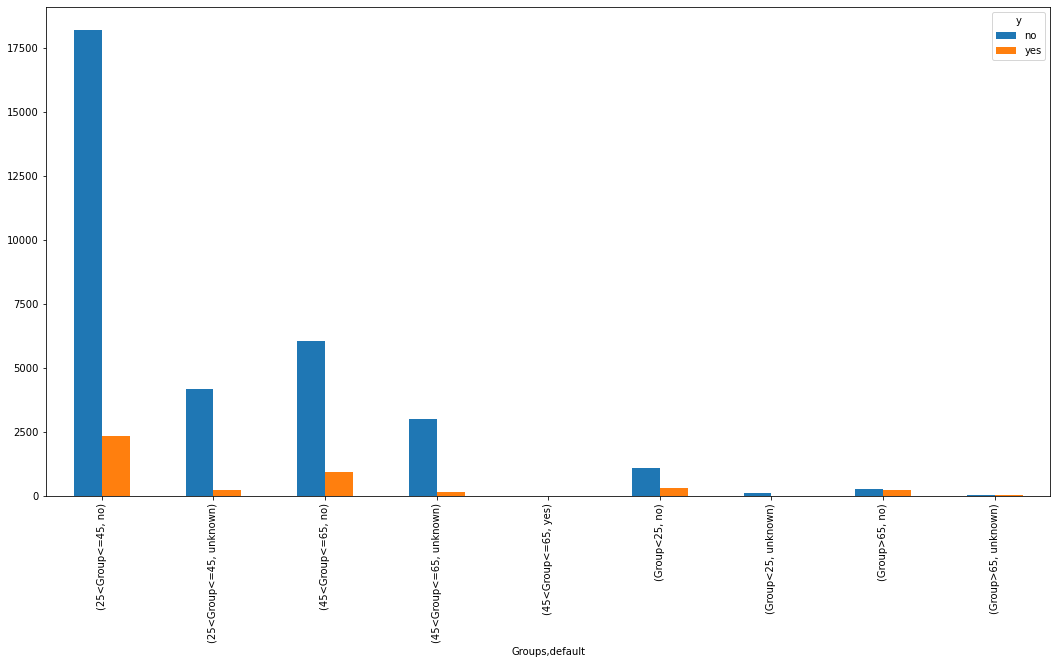

In [72]:
age,k=bank[['age','default','y']].copy(deep=True),[]
for i in bank['age']:
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    else:
        k.append('Group>65')
age['Groups']=k
print(pd.crosstab([age['Groups'],age['default']],age['y']))
plt.rcParams['figure.figsize']=[18,9]
pd.crosstab([age['Groups'],age['default']],age['y']).plot(kind='bar')

### Age-Housing:

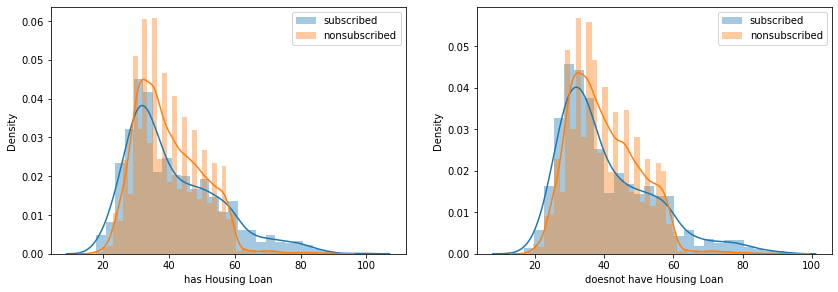

In [73]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(2,2,1)
sns.distplot(bank[(bank['housing']=='yes')&(bank['y']=='yes')]['age'],label='subscribed')
sns.distplot(bank[(bank['housing']=='yes')&(bank['y']=='no')]['age'],label='nonsubscribed')
plt.xlabel('has Housing Loan')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(bank[(bank['housing']=='no')&(bank['y']=='yes')]['age'],label='subscribed')
sns.distplot(bank[(bank['housing']=='no')&(bank['y']=='no')]['age'],label='nonsubscribed')
plt.xlabel('doesnot have Housing Loan')
plt.legend()
plt.show()

y                        no   yes
Groups       housing             
25<Group<=45 no       10118  1164
             unknown    529    49
             yes      11704  1348
45<Group<=65 no        4155   444
             unknown    225    28
             yes       4669   593
Group<25     no         529   123
             unknown     31     9
             yes        618   182
Group>65     no         129   107
             unknown      6     5
             yes        163   156


Text(0.5, 0, 'HOUSING LOAN')

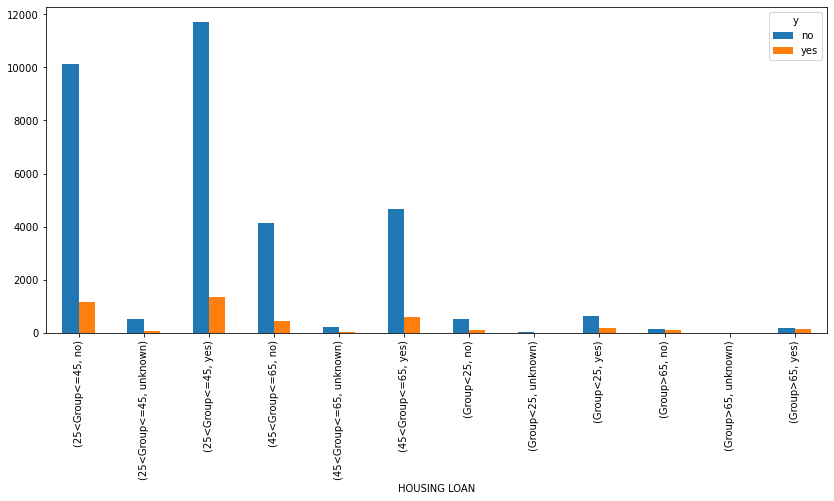

In [74]:
age,k=bank[['age','housing','y']].copy(deep=True),[]
for i in bank['age']:
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    else:
        k.append('Group>65')
age['Groups']=k
print(pd.crosstab([age['Groups'],age['housing']],age['y']))
plt.rcParams['figure.figsize']=[14,6]
pd.crosstab([age['Groups'],age['housing']],age['y']).plot(kind='bar')
plt.xlabel('HOUSING LOAN')

### Age-Loan:

no         30561
yes         5641
unknown      882
Name: loan, dtype: int64


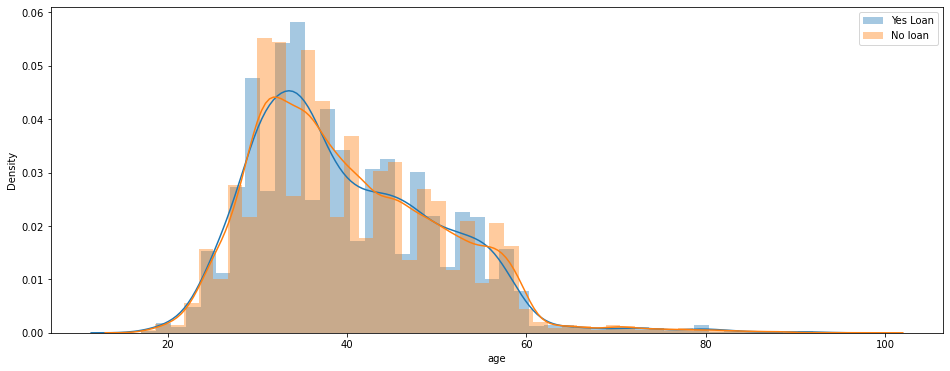

In [75]:
plt.rcParams['figure.figsize']=[16,6]
print(bank['loan'].value_counts())
sns.distplot(bank[(bank['loan']=='yes')]['age'],label='Yes Loan')
sns.distplot(bank[(bank['loan']=='no')]['age'],label='No loan')
plt.legend()

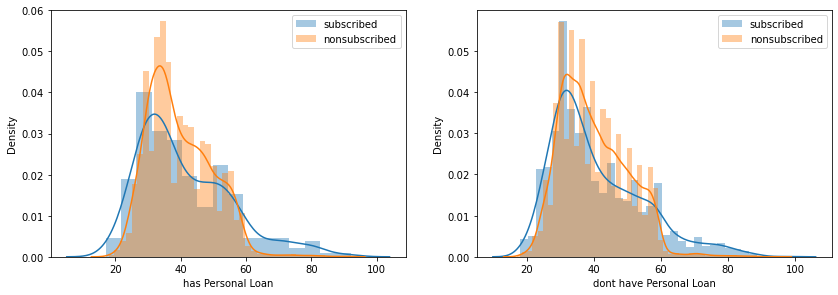

In [76]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(2,2,1)
sns.distplot(bank[(bank['loan']=='yes')&(bank['y']=='yes')]['age'],label='subscribed')
sns.distplot(bank[(bank['loan']=='yes')&(bank['y']=='no')]['age'],label='nonsubscribed')
plt.xlabel('has Personal Loan')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(bank[(bank['loan']=='no')&(bank['y']=='yes')]['age'],label='subscribed')
sns.distplot(bank[(bank['loan']=='no')&(bank['y']=='no')]['age'],label='nonsubscribed')
plt.xlabel('dont have Personal Loan')
plt.legend()
plt.show()

y                        no   yes
Groups       loan                
25<Group<=45 no       18359  2152
             unknown    529    49
             yes       3463   360
45<Group<=65 no        7473   876
             unknown    225    28
             yes       1351   161
Group<25     no         978   253
             unknown     31     9
             yes        169    52
Group>65     no         252   218
             unknown      6     5
             yes         40    45


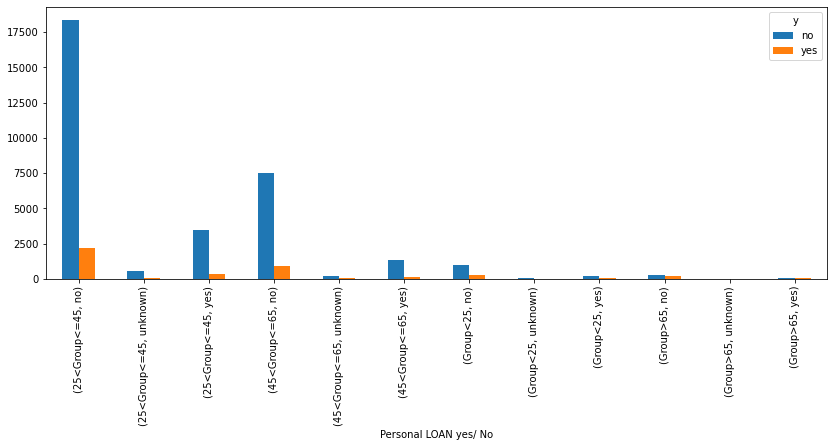

In [77]:
age,k=bank[['age','loan','y']].copy(deep=True),[]
for i in bank['age']:
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    else:
        k.append('Group>65')
age['Groups']=k
print(pd.crosstab([age['Groups'],age['loan']],age['y']))
plt.rcParams['figure.figsize']=[14,5]
pd.crosstab([age['Groups'],age['loan']],age['y']).plot(kind='bar')
plt.xlabel('Personal LOAN yes/ No')
plt.show()


### Job-Age:


In [78]:
age,k=bank[['age','job','y']].copy(deep=True),[]
for i in bank['age']:
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    elif i>65:
        k.append('Group>65')
    else:
        continue
age['Groups']=k

In [79]:
df=pd.crosstab([age['Groups'],age['job']],age['y'])
df['total']=df['no']+df['yes']
df['%no']=np.round(df['no']/df['total']*100)
df['%yes']=np.round(df['yes']/df['total']*100)

y                             no  yes  total   %no  %yes
Groups       job                                        
25<Group<=45 admin.         6116  891   7007  87.0  13.0
             management     1445  177   1622  89.0  11.0
             self-employed   773   94    867  89.0  11.0
             student         276   95    371  74.0  26.0
             technician     4091  491   4582  89.0  11.0
             unemployed      554   83    637  87.0  13.0
45<Group<=65 admin.         1813  293   2106  86.0  14.0
             housemaid       388   47    435  89.0  11.0
             management      869  105    974  89.0  11.0
             retired         837  164   1001  84.0  16.0
             unemployed      213   40    253  84.0  16.0
Group<25     admin.          238   55    293  81.0  19.0
             services        187   33    220  85.0  15.0
             student         250  143    393  64.0  36.0
             technician      127   26    153  83.0  17.0
Group>65     retired         25

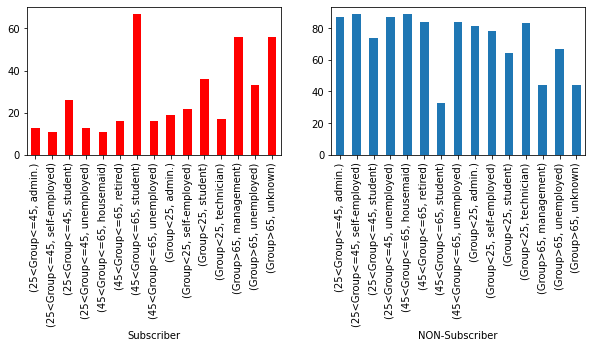

In [80]:
print(df[(df['%yes']>10)&(df['total']>100)])
print('Representating only clients where conversion rates are higher than 10percent')
plt.rcParams['figure.figsize']=[10,6]
plt.subplot(2,2,1)
df[(df['%yes']>10)&(df['total'])]['%yes'].plot(kind='bar',color='r')
plt.xlabel('Subscriber')
plt.subplot(2,2,2)
df[(df['%yes']>10)&(df['total'])]['%no'].plot(kind='bar')
plt.xlabel('NON-Subscriber')
plt.show()

### Marital-Age:

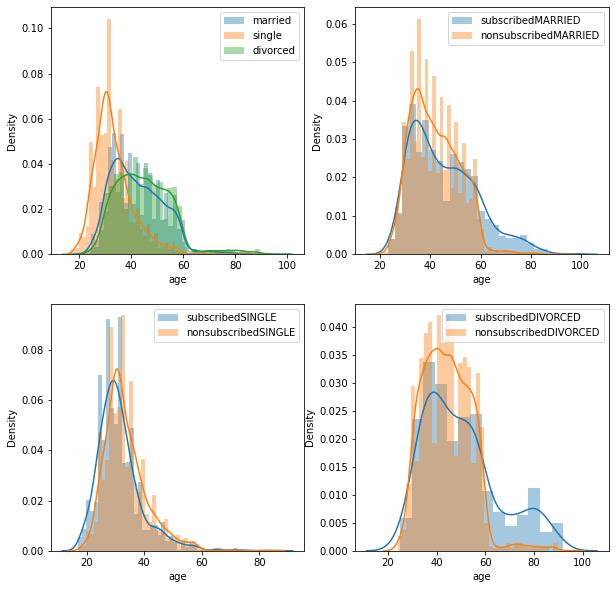

In [81]:
plt.rcParams['figure.figsize']=[10,10]
plt.subplot(2,2,1)
sns.distplot(bank[bank['marital']=='married']['age'],label='married')
sns.distplot(bank[bank['marital']=='single']['age'],label='single')
sns.distplot(bank[bank['marital']=='divorced']['age'],label='divorced')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(bank[(bank['marital']=='married')&(bank['y']=='yes')]['age'],label='subscribedMARRIED')
sns.distplot(bank[(bank['marital']=='married')&(bank['y']=='no')]['age'],label='nonsubscribedMARRIED')
plt.legend()
plt.subplot(2,2,3)
sns.distplot(bank[(bank['marital']=='single')&(bank['y']=='yes')]['age'],label='subscribedSINGLE')
sns.distplot(bank[(bank['marital']=='single')&(bank['y']=='no')]['age'],label='nonsubscribedSINGLE')
plt.legend()
plt.subplot(2,2,4)
sns.distplot(bank[(bank['marital']=='divorced')&(bank['y']=='yes')]['age'],label='subscribedDIVORCED')
sns.distplot(bank[(bank['marital']=='divorced')&(bank['y']=='no')]['age'],label='nonsubscribedDIVORCED')
plt.legend()
plt.show()

### Age-Education:

In [82]:
education=bank[['age','education','y']].copy(deep=True)
education['education']=education['education'].mask(education['education']=='unknown','primary')
education['education'].value_counts()

university.degree      10971
high.school             8542
basic.9y                5421
professional.course     4746
basic.4y                3765
basic.6y                2074
primary                 1549
illiterate                16
Name: education, dtype: int64

<AxesSubplot:xlabel='Groups,education'>

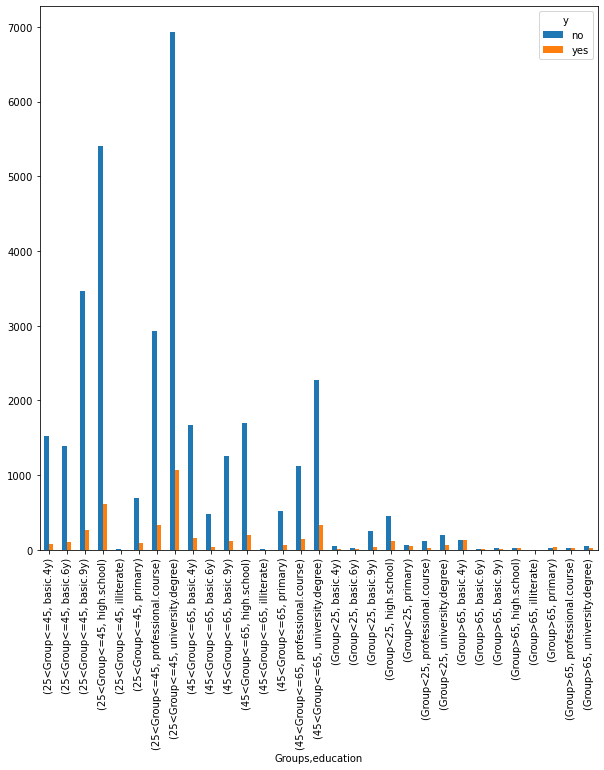

In [83]:
k=[]
plt.rcParams['figure.figsize']=[14,6]
for i in education['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    elif i>65:
        k.append('Group>65')
    else:
        continue
education['Groups']=k
plt.rcParams['figure.figsize']=[10,10]
pd.crosstab([education['Groups'],education['education']],education['y']).plot(kind='bar')





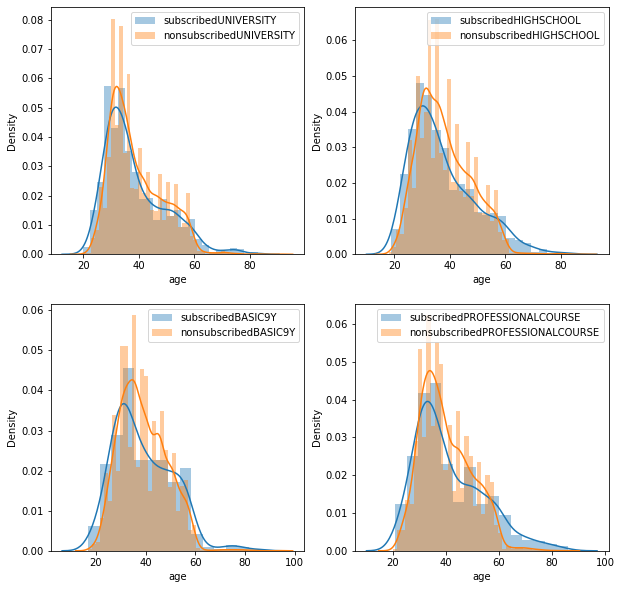

In [84]:
plt.rcParams['figure.figsize']=[10,10]
plt.subplot(2,2,1)
sns.distplot(bank[(bank['education']=='university.degree')&(bank['y']=='yes')]['age'],label='subscribedUNIVERSITY')
sns.distplot(bank[(bank['education']=='university.degree')&(bank['y']=='no')]['age'],label='nonsubscribedUNIVERSITY')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(bank[(bank['education']=='high.school')&(bank['y']=='yes')]['age'],label='subscribedHIGHSCHOOL')
sns.distplot(bank[(bank['education']=='high.school')&(bank['y']=='no')]['age'],label='nonsubscribedHIGHSCHOOL')
plt.legend()
plt.subplot(2,2,3)
sns.distplot(bank[(bank['education']=='basic.9y')&(bank['y']=='yes')]['age'],label='subscribedBASIC9Y')
sns.distplot(bank[(bank['education']=='basic.9y')&(bank['y']=='no')]['age'],label='nonsubscribedBASIC9Y')
plt.legend()
plt.subplot(2,2,4)
sns.distplot(bank[(bank['education']=='professional.course')&(bank['y']=='yes')]['age'],label='subscribedPROFESSIONALCOURSE')
sns.distplot(bank[(bank['education']=='professional.course')&(bank['y']=='no')]['age'],label='nonsubscribedPROFESSIONALCOURSE')
plt.legend()
plt.show()

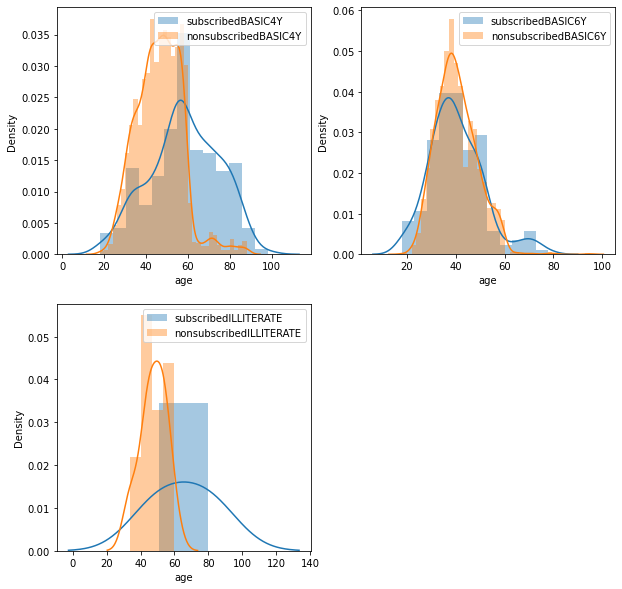

In [85]:
plt.rcParams['figure.figsize']=[10,10]
plt.subplot(2,2,1)
sns.distplot(bank[(bank['education']=='basic.4y')&(bank['y']=='yes')]['age'],label='subscribedBASIC4Y')
sns.distplot(bank[(bank['education']=='basic.4y')&(bank['y']=='no')]['age'],label='nonsubscribedBASIC4Y')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(bank[(bank['education']=='basic.6y')&(bank['y']=='yes')]['age'],label='subscribedBASIC6Y')
sns.distplot(bank[(bank['education']=='basic.6y')&(bank['y']=='no')]['age'],label='nonsubscribedBASIC6Y')
plt.legend()
plt.subplot(2,2,3)
sns.distplot(bank[(bank['education']=='illiterate')&(bank['y']=='yes')]['age'],label='subscribedILLITERATE')
sns.distplot(bank[(bank['education']=='illiterate')&(bank['y']=='no')]['age'],label='nonsubscribedILLITERATE')
plt.legend()

### Age-Contact:

In [86]:
bank['contact'].value_counts()

cellular     23522
telephone    13562
Name: contact, dtype: int64

y                       total_approached  percentage no  percentage yes
Groups       contact                                                   
25<Group<=45 cellular              15623           87.0            13.0
             telephone              9289           95.0             5.0
45<Group<=65 cellular               6326           86.0            14.0
             telephone              3788           95.0             5.0
Group<25     cellular               1069           74.0            26.0
             telephone               423           91.0             9.0
Group>65     cellular                504           51.0            49.0
             telephone                62           66.0            34.0


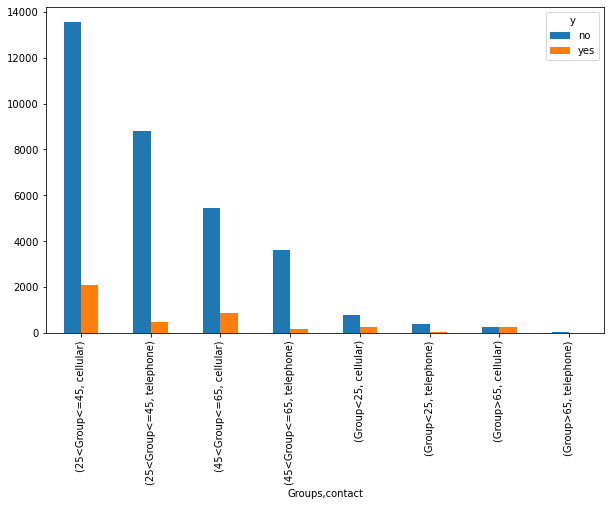

In [87]:
age,k=bank[['age','contact','y']].copy(deep=True),[]
for i in bank['age']:
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    else:
        k.append('Group>65')
age['Groups']=k

plt.rcParams['figure.figsize']=[10,6]
pd.crosstab([age['Groups'],age['contact']],age['y']).plot(kind='bar')
df=pd.crosstab([age['Groups'],age['contact']],age['y'])
df['total_approached']=df['no']+df['yes']
df['percentage no']=np.round(df['no']*100/df['total_approached'])
df['percentage yes']=np.round(df['yes']*100/df['total_approached'])
print(df[['total_approached','percentage no','percentage yes']])

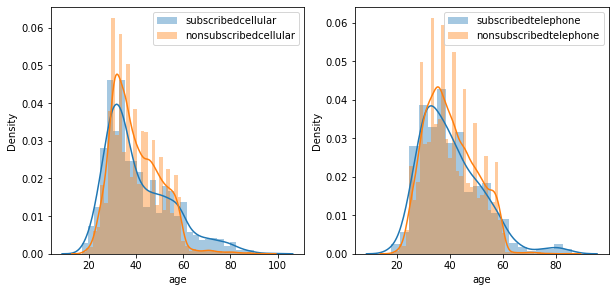

In [88]:
plt.rcParams['figure.figsize']=[10,10]
plt.subplot(2,2,1)
sns.distplot(bank[(bank['contact']=='cellular')&(bank['y']=='yes')]['age'],label='subscribedcellular')
sns.distplot(bank[(bank['contact']=='cellular')&(bank['y']=='no')]['age'],label='nonsubscribedcellular')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(bank[(bank['contact']=='telephone')&(bank['y']=='yes')]['age'],label='subscribedtelephone')
sns.distplot(bank[(bank['contact']=='telephone')&(bank['y']=='no')]['age'],label='nonsubscribedtelephone')
plt.legend()
plt.show()

### Age-Poutcome:

y                      total_approached  percentage no  percentage yes
Groups       poutcome                                                 
25<Group<=45 failure               2579           88.0            12.0
             success                694           37.0            63.0
45<Group<=65 failure                916           85.0            15.0
             success                326           34.0            66.0
Group<25     failure                196           73.0            27.0
             success                107           31.0            69.0
Group>65     failure                131           66.0            34.0
             success                112           22.0            78.0


Text(0.5, 0, 'Previous Outcome NO/Yes')

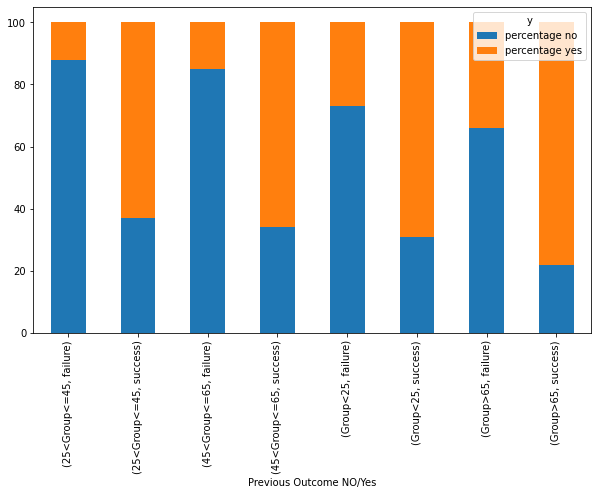

In [89]:

age,k=bank[bank['poutcome']!='nonexistent'][['age','poutcome','y']].copy(deep=True),[]
for i in age['age']:
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    else:
        k.append('Group>65')
age['Groups']=k

plt.rcParams['figure.figsize']=[10,6]
df=pd.crosstab([age['Groups'],age['poutcome']],age['y'])
df['total_approached']=df['no']+df['yes']
df['percentage no']=np.round(df['no']*100/df['total_approached'])
df['percentage yes']=np.round(df['yes']*100/df['total_approached'])
print(df[['total_approached','percentage no','percentage yes']])
(df[['percentage no','percentage yes']]).plot(kind='bar',stacked=True)
plt.xlabel('Previous Outcome NO/Yes')

y                         total_approached  percentage no  percentage yes
Groups       poutcome                                                    
25<Group<=45 nonexistent             21639           92.0             8.0
45<Group<=65 nonexistent              8872           92.0             8.0
Group<25     nonexistent              1189           84.0            16.0
Group>65     nonexistent               323           58.0            42.0


<AxesSubplot:xlabel='Groups,poutcome'>

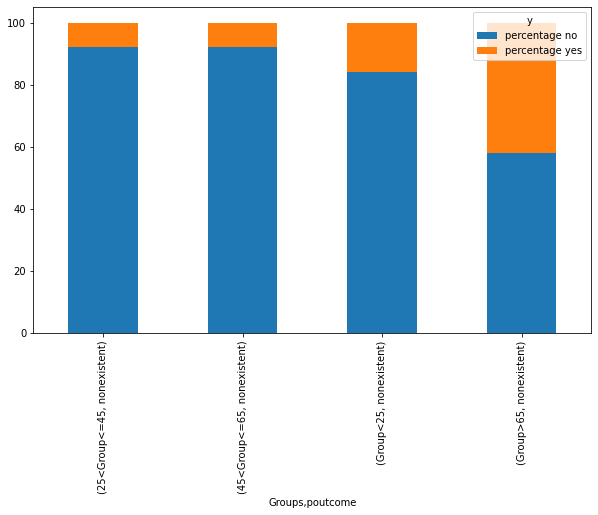

In [90]:
age,k=bank[bank['poutcome']=='nonexistent'][['age','poutcome','y']].copy(deep=True),[]
for i in age['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    else:
        k.append('Group>65')
age['Groups']=k
df=pd.crosstab([age['Groups'],age['poutcome']],age['y'])
df['total_approached']=df['no']+df['yes']
df['percentage no']=np.round(df['no']*100/df['total_approached'])
df['percentage yes']=np.round(df['yes']*100/df['total_approached'])
print(df[['total_approached','percentage no','percentage yes']])
df[['percentage no','percentage yes']].plot(kind='bar',stacked=True)

# Categorical-Categorical Bivariate Analysis:
### Job-Marital:

y                       People_approached  Percentage No  Percentage Yes
job           marital                                                   
admin.        divorced               1149          89.82           10.18
              married                4778          87.48           12.52
              single                 3480          84.80           15.20
              unknown                  13          84.62           15.38
blue-collar   divorced                632          92.41            7.59
              married                6011          93.68            6.32
              single                 1657          91.25            8.75
              unknown                  14          78.57           21.43
entrepreneur  divorced                161          91.30            8.70
              married                 969          92.16            7.84
              single                  177          88.70           11.30
              unknown                   2          

Text(0.5, 0, 'Previous Outcome No/Yes')

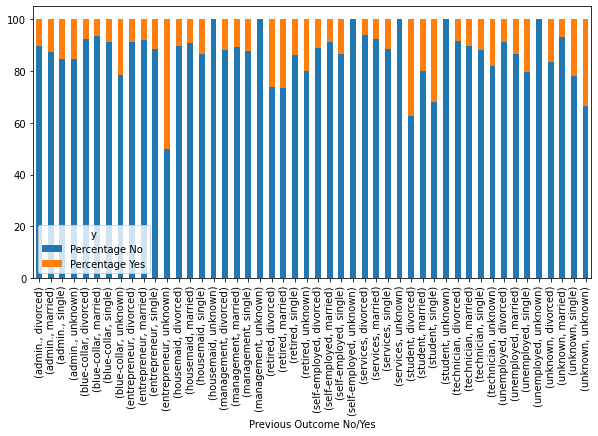

In [91]:
df=pd.crosstab([bank['job'],bank['marital']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

#### Conclusion:
We can infer from the above plot that the students who were single were the highest subscriber (31% of the of the total students) of term deposite

### Job-Education:

y                            People_approached  Percentage No  Percentage Yes
job     education                                                            
admin.  basic.4y                            72          87.50           12.50
        basic.6y                           133          93.98            6.02
        basic.9y                           460          91.52            8.48
        high.school                       3011          88.24           11.76
        illiterate                           1         100.00            0.00
...                                        ...            ...             ...
unknown basic.9y                            29          96.55            3.45
        high.school                         31          93.55            6.45
        professional.course                 11          90.91            9.09
        university.degree                   43          74.42           25.58
        unknown                            121          86.78   

Text(0.5, 0, 'Previous Outcome No/Yes')

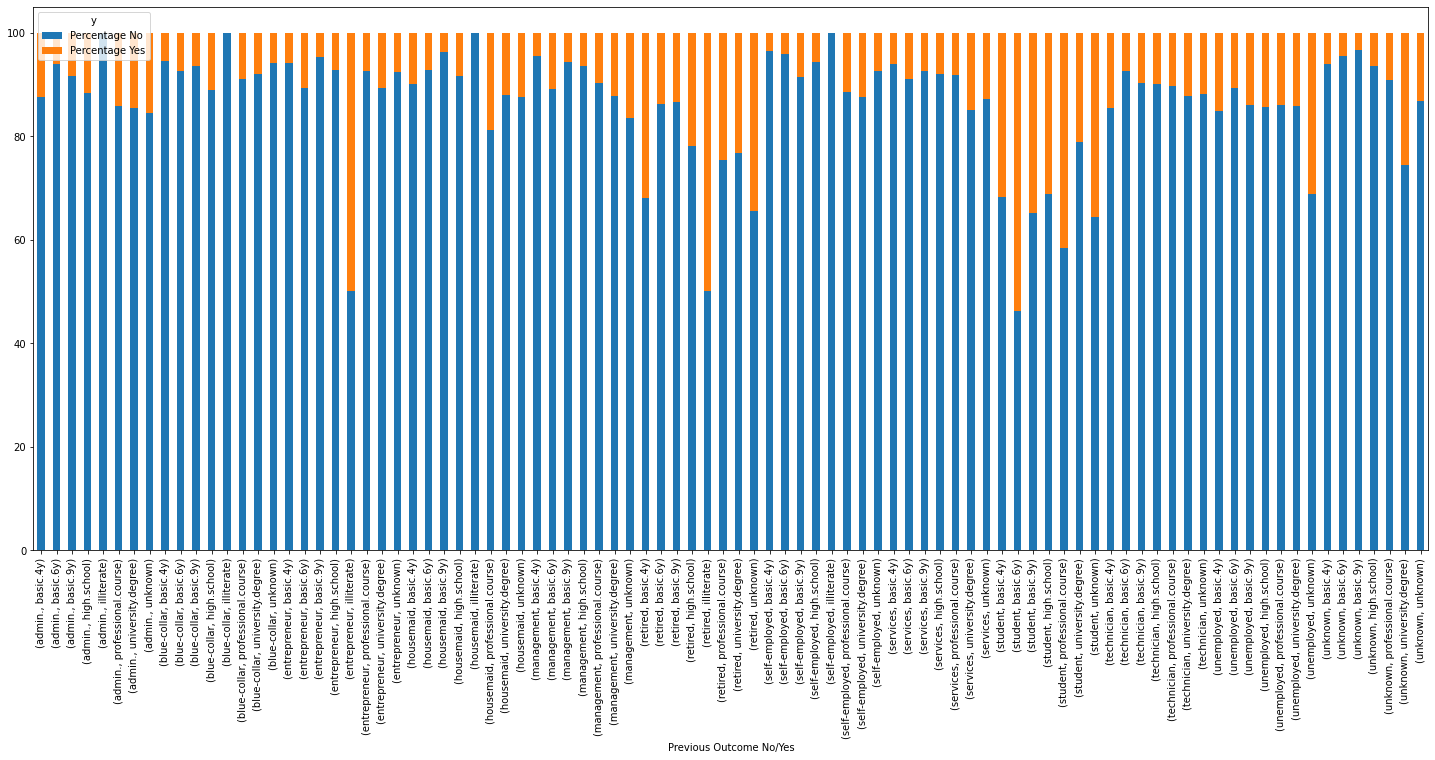

In [92]:
df=pd.crosstab([bank['job'],bank['education']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(25,10))
plt.xlabel('Previous Outcome No/Yes')


### Job-Default:

y                      People_approached  Percentage No  Percentage Yes
job           default                                                  
admin.        no                    8257          85.67           14.33
              unknown               1163          94.58            5.42
blue-collar   no                    5481          91.99            8.01
              unknown               2833          95.16            4.84
entrepreneur  no                    1038          90.56            9.44
              unknown                271          95.20            4.80
housemaid     no                     664          87.65           12.35
              unknown                282          96.10            3.90
management    no                    2225          87.69           12.31
              unknown                412          95.63            4.37
retired       no                    1187          70.01           29.99
              unknown                354          88.98         

Text(0.5, 0, 'Previous Outcome No/Yes')

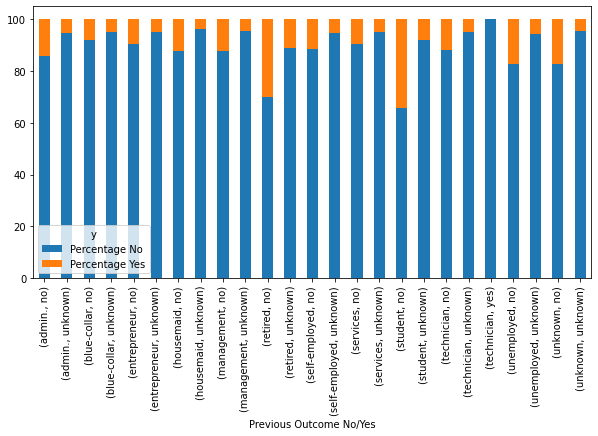

In [93]:
df=pd.crosstab([bank['job'],bank['default']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

Students with no default credit were among the highest subscribers of term deposit where as none of the student with default credit subscribed the term deposit.

### Job-Loan:

y                      People_approached  Percentage No  Percentage Yes
job           loan                                                     
admin.        no                    7672          86.55           13.45
              unknown                203          87.19           12.81
              yes                   1545          87.83           12.17
blue-collar   no                    6870          92.94            7.06
              unknown                211          93.36            6.64
              yes                   1233          93.76            6.24
entrepreneur  no                    1084          90.87            9.13
              unknown                 34          91.18            8.82
              yes                    191          95.29            4.71
housemaid     no                     785          89.94           10.06
              unknown                 29          89.66           10.34
              yes                    132          91.67         

Text(0.5, 0, 'Previous Outcome No/Yes')

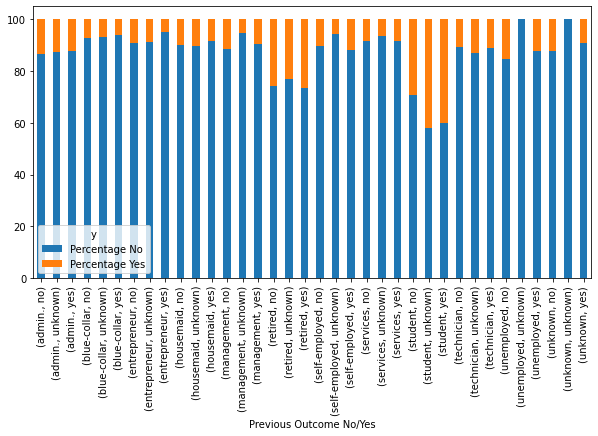

In [94]:
df=pd.crosstab([bank['job'],bank['loan']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

None of the student with personal loan subscribed the term deposit.

### Job-Housing:

y                      People_approached  Percentage No  Percentage Yes
job           housing                                                  
admin.        no                    4186          87.10           12.90
              unknown                203          87.19           12.81
              yes                   5031          86.48           13.52
blue-collar   no                    3861          92.85            7.15
              unknown                211          93.36            6.64
              yes                   4242          93.26            6.74
entrepreneur  no                     578          92.04            7.96
              unknown                 34          91.18            8.82
              yes                    697          91.10            8.90
housemaid     no                     434          90.09            9.91
              unknown                 29          89.66           10.34
              yes                    483          90.27         

Text(0.5, 0, 'Previous Outcome No/Yes')

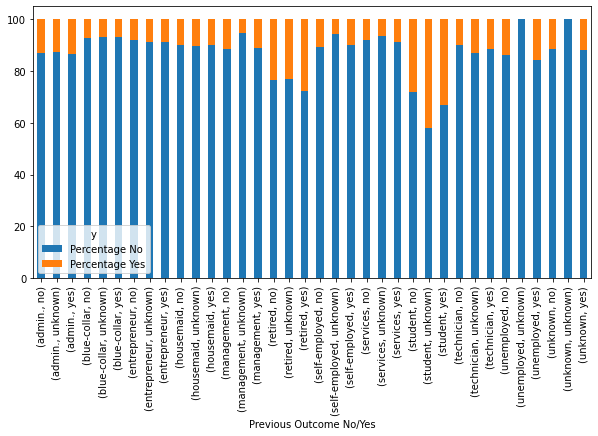

In [95]:
df=pd.crosstab([bank['job'],bank['housing']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Job-Contact:

y                        People_approached  Percentage No  Percentage Yes
job           contact                                                    
admin.        cellular                6470          83.52           16.48
              telephone               2950          93.90            6.10
blue-collar   cellular                4556          90.87            9.13
              telephone               3758          95.74            4.26
entrepreneur  cellular                 763          89.52           10.48
              telephone                546          94.32            5.68
housemaid     cellular                 570          87.02           12.98
              telephone                376          94.95            5.05
management    cellular                1710          85.61           14.39
              telephone                927          95.04            4.96
retired       cellular                1099          67.70           32.30
              telephone               

Text(0.5, 0, 'Previous Outcome No/Yes')

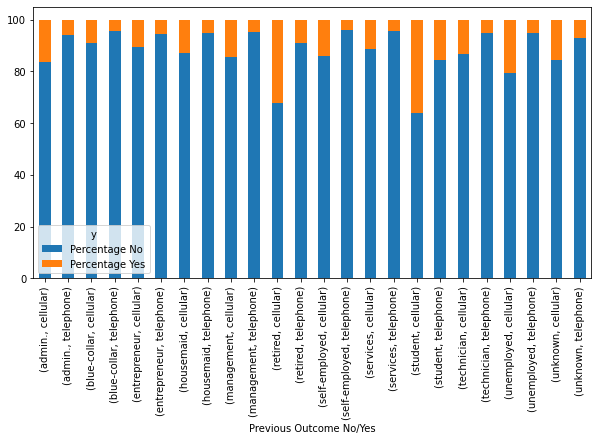

In [96]:
df=pd.crosstab([bank['job'],bank['contact']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

We can infer that people whose mode of contact is telephoe are almost 85% non-subscriber across all job profiles.

### Job-Month:

y                             People_approached  Percentage No  Percentage Yes
job           quarters                                                        
admin.        First Quarter                3645          87.65           12.35
              Fourth Quarter               4416          88.54           11.46
              Second Quarter               1209          82.55           17.45
              Third Quarter                 150          47.33           52.67
blue-collar   First Quarter                2123          92.70            7.30
              Fourth Quarter               5557          93.88            6.12
              Second Quarter                588          90.31            9.69
              Third Quarter                  46          47.83           52.17
entrepreneur  First Quarter                 319          89.97           10.03
              Fourth Quarter                736          91.98            8.02
              Second Quarter                252     

Text(0.5, 0, 'Previous Outcome No/Yes')

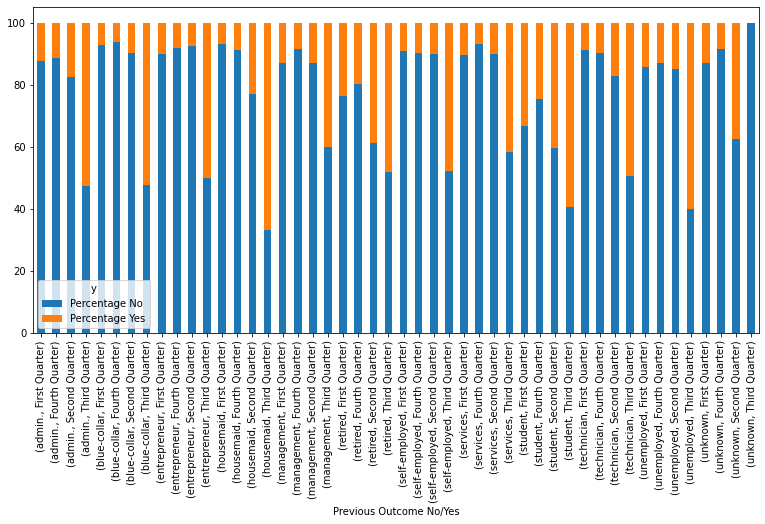

In [97]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k
df=pd.crosstab([bank['job'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(13,6))
plt.xlabel('Previous Outcome No/Yes')

No significant conclusion could be drawn.

### Job-Poutcome:

y                          People_approached  Percentage No  Percentage Yes
job           poutcome                                                     
admin.        failure                    987          84.60           15.40
              nonexistent               8037          89.72           10.28
              success                    396          32.32           67.68
blue-collar   failure                    800          92.12            7.88
              nonexistent               7412          93.75            6.25
              success                    102          50.98           49.02
entrepreneur  failure                    140          93.57            6.43
              nonexistent               1147          91.98            8.02
              success                     22          54.55           45.45
housemaid     failure                     64          84.38           15.62
              nonexistent                847          93.15            6.85
            

Text(0.5, 0, 'Previous Outcome No/Yes')

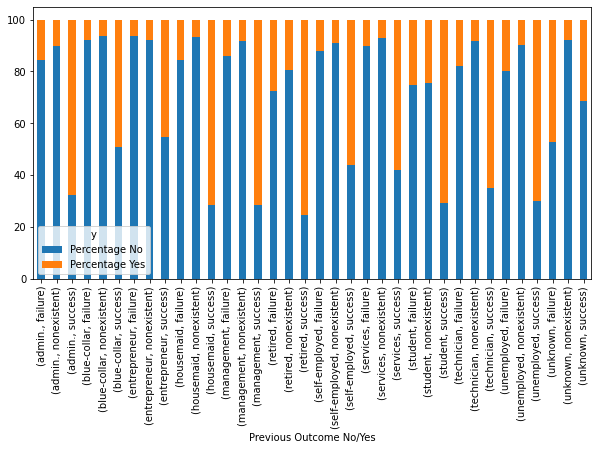

In [98]:
df=pd.crosstab([bank['job'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

From the above bar graph it can be infered that more 50% of people who subscribed in previous marketing campaign, subscribes again irrespective of jobs except for entrepreneure who subscribed around 40%.

#### --------------------------------------------------------------------------------------------------------------

### Marital-Education:

y                             People_approached  Percentage No  Percentage Yes
marital  education                                                            
divorced basic.4y                           430          82.33           17.67
         basic.6y                           164          93.29            6.71
         basic.9y                           497          94.77            5.23
         high.school                       1069          91.21            8.79
         illiterate                           1         100.00            0.00
         professional.course                600          90.67            9.33
         university.degree                 1198          87.81           12.19
         unknown                            167          89.22           10.78
married  basic.4y                          2918          90.27            9.73
         basic.6y                          1594          92.10            7.90
         basic.9y                          3728     

Text(0.5, 0, 'Previous Outcome No/Yes')

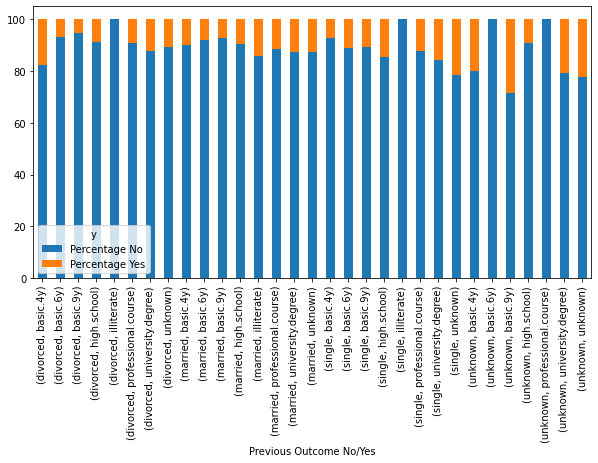

In [100]:
df=pd.crosstab([bank['marital'],bank['education']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

NO significant conclusion.

### Marital-Default:

y                 People_approached  Percentage No  Percentage Yes
marital  default                                                  
divorced no                    3401          88.62           11.38
         unknown                725          94.48            5.52
married  no                   16849          88.08           11.92
         unknown               5628          94.97            5.03
         yes                      2         100.00            0.00
single   no                    9071          84.59           15.41
         unknown               1336          94.09            5.91
unknown  no                      61          80.33           19.67
         unknown                 11         100.00            0.00


Text(0.5, 0, 'Previous Outcome No/Yes')

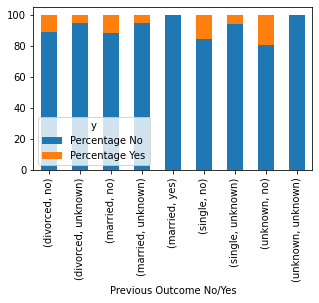

In [101]:

df=pd.crosstab([bank['marital'],bank['default']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(5,3))
plt.xlabel('Previous Outcome No/Yes')

No significant conclusion.



### Marital-Housing:

y                 People_approached  Percentage No  Percentage Yes
marital  housing                                                  
divorced no                    1877          89.45           10.55
         unknown                107          95.33            4.67
         yes                   2142          89.54           10.46
married  no                   10295          90.21            9.79
         unknown                529          89.79           10.21
         yes                  11655          89.45           10.55
single   no                    4558          86.29           13.71
         unknown                245          86.94           13.06
         yes                   5604          85.37           14.63
unknown  no                      39          82.05           17.95
         unknown                  1         100.00            0.00
         yes                     32          84.38           15.62


Text(0.5, 0, 'Previous Outcome No/Yes')

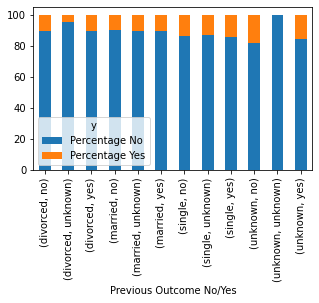

In [102]:
df=pd.crosstab([bank['marital'],bank['housing']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(5,3))
plt.xlabel('Previous Outcome No/Yes')

No Significant conclusion.


### Marital-Loan:

y                 People_approached  Percentage No  Percentage Yes
marital  loan                                                     
divorced no                    3403          89.48           10.52
         unknown                107          95.33            4.67
         yes                    616          89.61           10.39
married  no                   18535          89.75           10.25
         unknown                529          89.79           10.21
         yes                   3415          90.10            9.90
single   no                    8562          85.63           14.37
         unknown                245          86.94           13.06
         yes                   1600          86.56           13.44
unknown  no                      61          81.97           18.03
         unknown                  1         100.00            0.00
         yes                     10          90.00           10.00


Text(0.5, 0, 'Previous Outcome No/Yes')

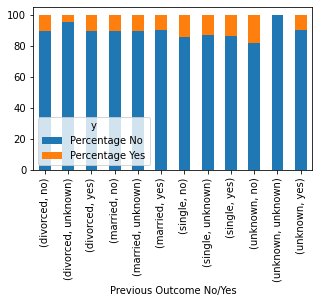

In [103]:
df=pd.crosstab([bank['marital'],bank['loan']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(5,3))
plt.xlabel('Previous Outcome No/Yes')

### Marital-Contact:

y                   People_approached  Percentage No  Percentage Yes
marital  contact                                                    
divorced cellular                2593          86.27           13.73
         telephone               1533          95.37            4.63
married  cellular               13701          86.37           13.63
         telephone               8778          95.17            4.83
single   cellular                7182          82.50           17.50
         telephone               3225          93.18            6.82
unknown  cellular                  46          76.09           23.91
         telephone                 26          96.15            3.85


Text(0.5, 0, 'Previous Outcome No/Yes')

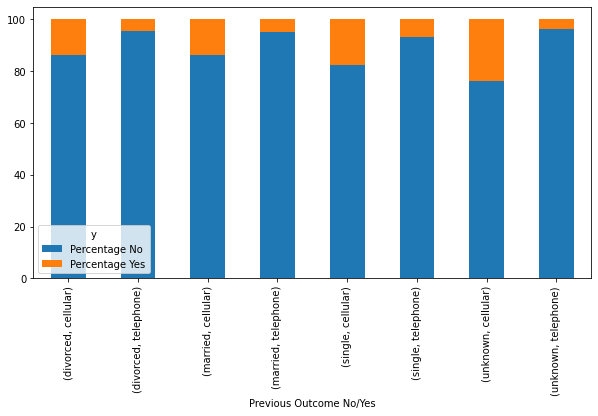

In [104]:
df=pd.crosstab([bank['marital'],bank['contact']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Marital-Months:

y                        People_approached  Percentage No  Percentage Yes
marital  quarters                                                        
divorced First Quarter                1378          89.62           10.38
         Fourth Quarter               2126          92.14            7.86
         Second Quarter                568          85.39           14.61
         Third Quarter                  54          37.04           62.96
married  First Quarter                7455          89.23           10.77
         Fourth Quarter              12086          91.87            8.13
         Second Quarter               2728          84.93           15.07
         Third Quarter                 210          54.76           45.24
single   First Quarter                3651          87.54           12.46
         Fourth Quarter               5338          87.56           12.44
         Second Quarter               1198          79.72           20.28
         Third Quarter                

Text(0.5, 0, 'Previous Outcome No/Yes')

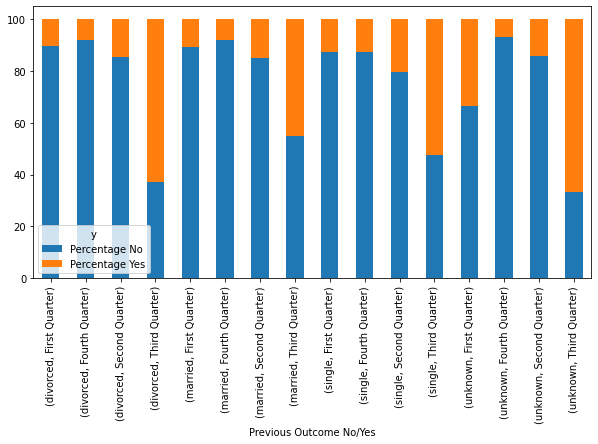

In [105]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k

df=pd.crosstab([bank['marital'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Marital-Poutcome:

y                     People_approached  Percentage No  Percentage Yes
marital  poutcome                                                     
divorced failure                    452          87.39           12.61
         nonexistent               3562          91.94            8.06
         success                    112          25.89           74.11
married  failure                   2146          85.79           14.21
         nonexistent              19674          92.10            7.90
         success                    659          34.45           65.55
single   failure                   1215          84.77           15.23
         nonexistent               8729          88.60           11.40
         success                    463          35.85           64.15
unknown  failure                      9          88.89           11.11
         nonexistent                 58          86.21           13.79
         success                      5          40.00           60.00


Text(0.5, 0, 'Previous Outcome No/Yes')

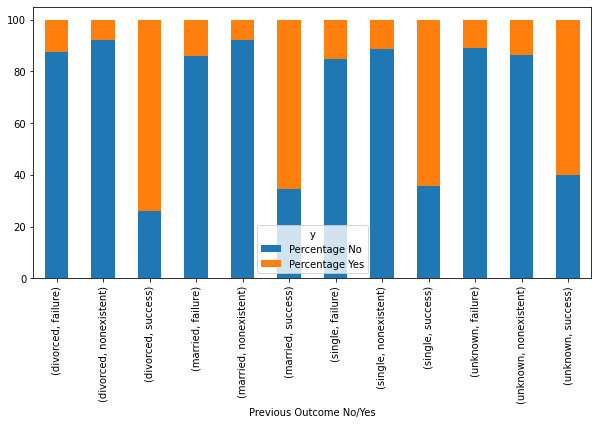

In [106]:
df=pd.crosstab([bank['marital'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

From the above bar graph it can be infered that 60-65% of people who subscribed in previous marketing campaign, subscribes again irrespective of marital status.

### Education-Default:

y                            People_approached  Percentage No  Percentage Yes
education           default                                                  
basic.4y            no                    2246          86.29           13.71
                    unknown               1519          94.54            5.46
basic.6y            no                    1305          90.19            9.81
                    unknown                769          94.41            5.59
basic.9y            no                    3971          91.11            8.89
                    unknown               1450          95.38            4.62
high.school         no                    7120          87.71           12.29
                    unknown               1422          95.08            4.92
illiterate          no                       9          88.89           11.11
                    unknown                  7          85.71           14.29
professional.course no                    4011          87.46   

Text(0.5, 0, 'Previous Outcome No/Yes')

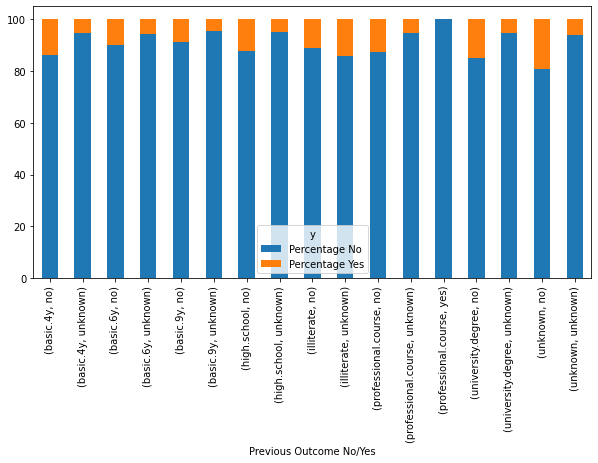

In [107]:
df=pd.crosstab([bank['education'],bank['default']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Education-Housing:

y                            People_approached  Percentage No  Percentage Yes
education           housing                                                  
basic.4y            no                    1761          90.29            9.71
                    unknown                104          90.38            9.62
                    yes                   1900          88.95           11.05
basic.6y            no                     969          91.74            8.26
                    unknown                 55          89.09           10.91
                    yes                   1050          91.90            8.10
basic.9y            no                    2443          92.30            7.70
                    unknown                133          90.98            9.02
                    yes                   2845          92.27            7.73
high.school         no                    3915          89.22           10.78
                    unknown                195          91.79   

Text(0.5, 0, 'Previous Outcome No/Yes')

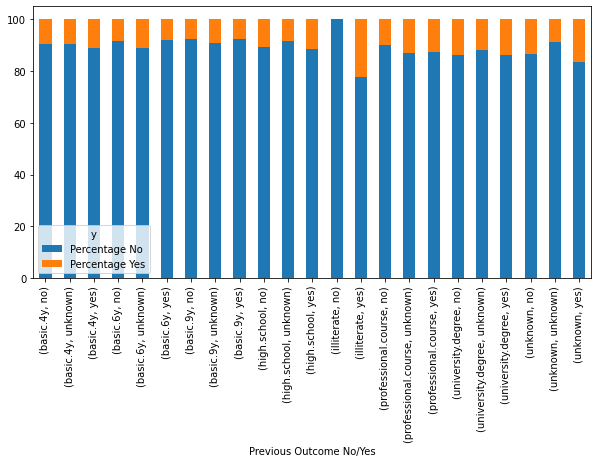

In [108]:
df=pd.crosstab([bank['education'],bank['housing']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Education-Loan:

y                            People_approached  Percentage No  Percentage Yes
education           loan                                                     
basic.4y            no                    3098          89.74           10.26
                    unknown                104          90.38            9.62
                    yes                    563          88.81           11.19
basic.6y            no                    1721          91.46            8.54
                    unknown                 55          89.09           10.91
                    yes                    298          93.96            6.04
basic.9y            no                    4479          92.43            7.57
                    unknown                133          90.98            9.02
                    yes                    809          91.47            8.53
high.school         no                    7051          88.73           11.27
                    unknown                195          91.79   

Text(0.5, 0, 'Previous Outcome No/Yes')

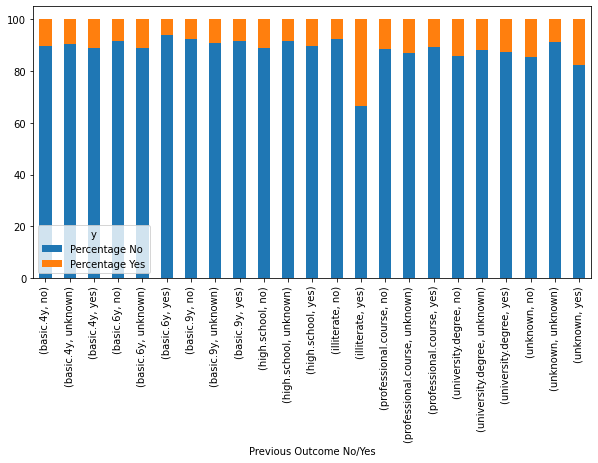

In [109]:
df=pd.crosstab([bank['education'],bank['loan']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Education-Contact:

y                              People_approached  Percentage No  \
education           contact                                       
basic.4y            cellular                2115          84.87   
                    telephone               1650          95.70   
basic.6y            cellular                1128          88.83   
                    telephone                946          95.24   
basic.9y            cellular                3090          89.42   
                    telephone               2331          96.01   
high.school         cellular                5334          85.43   
                    telephone               3208          94.76   
illiterate          cellular                  14          85.71   
                    telephone                  2         100.00   
professional.course cellular                3147          85.45   
                    telephone               1599          94.81   
university.degree   cellular                7793          83.3

Text(0.5, 0, 'Previous Outcome No/Yes')

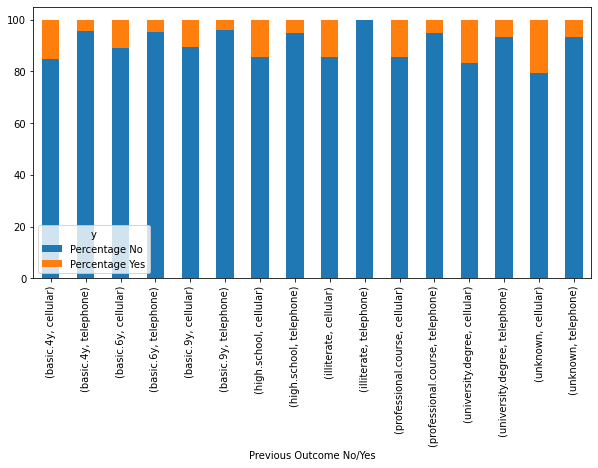

In [110]:
df=pd.crosstab([bank['education'],bank['contact']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Education-Months:

y                                   People_approached  Percentage No  \
education           quarters                                           
basic.4y            First Quarter                1165          89.01   
                    Fourth Quarter               2187          92.41   
                    Second Quarter                368          79.89   
                    Third Quarter                  45          48.89   
basic.6y            First Quarter                 533          91.18   
                    Fourth Quarter               1366          92.53   
                    Second Quarter                166          89.76   
                    Third Quarter                   9          44.44   
basic.9y            First Quarter                1390          90.07   
                    Fourth Quarter               3466          93.74   
                    Second Quarter                525          91.05   
                    Third Quarter                  40          5

Text(0.5, 0, 'Previous Outcome No/Yes')

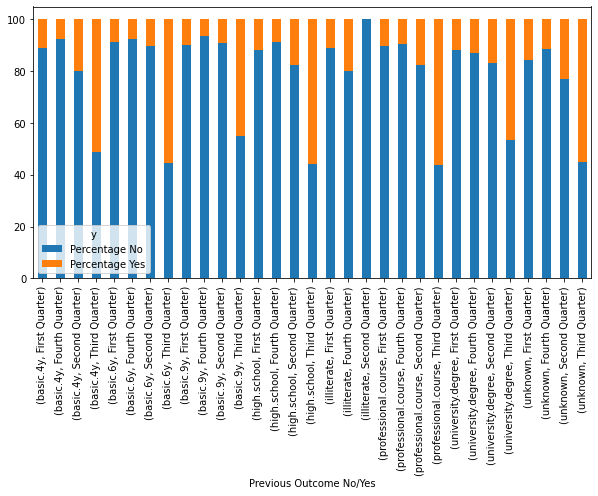

In [111]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k


df=pd.crosstab([bank['education'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Education-Poutcome:

y                                People_approached  Percentage No  \
education           poutcome                                        
basic.4y            failure                    316          85.76   
                    nonexistent               3332          92.14   
                    success                    117          28.21   
basic.6y            failure                    200          90.00   
                    nonexistent               1838          92.93   
                    success                     36          41.67   
basic.9y            failure                    563          90.94   
                    nonexistent               4764          93.20   
                    success                     94          52.13   
high.school         failure                    996          87.65   
                    nonexistent               7278          91.03   
                    success                    268          36.94   
illiterate          failure       

Text(0.5, 0, 'Previous Outcome No/Yes')

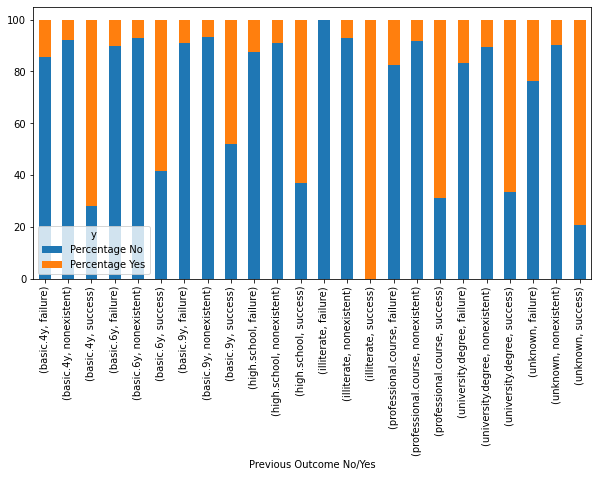

In [112]:
df=pd.crosstab([bank['education'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

From the above bar graph it can be infered that 60-70% of people who subscribed in previous marketing campaign, subscribes again irrespective of education.
#### ------------------------------------------------------


### Default-Housing:

y                People_approached  Percentage No  Percentage Yes
default housing                                                  
no      no                   13148          87.49           12.51
        unknown                684          88.01           11.99
        yes                  15550          86.63           13.37
unknown no                    3620          94.67            5.33
        unknown                198          95.45            4.55
        yes                   3882          94.85            5.15
yes     no                       1         100.00            0.00
        yes                      1         100.00            0.00


Text(0.5, 0, 'Previous Outcome No/Yes')

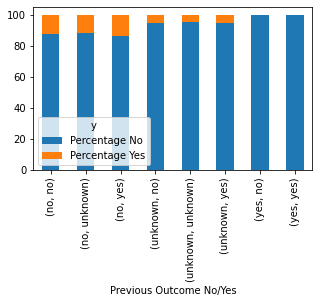

In [113]:
df=pd.crosstab([bank['default'],bank['housing']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(5,3))
plt.xlabel('Previous Outcome No/Yes')

### Default-Loan:

y                People_approached  Percentage No  Percentage Yes
default loan                                                     
no      no                   24212          86.94           13.06
        unknown                684          88.01           11.99
        yes                   4486          87.49           12.51
unknown no                    6347          94.71            5.29
        unknown                198          95.45            4.55
        yes                   1155          95.06            4.94
yes     no                       2         100.00            0.00


Text(0.5, 0, 'Previous Outcome No/Yes')

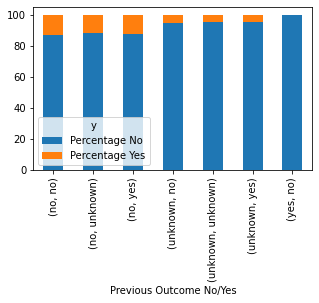

In [114]:
df=pd.crosstab([bank['default'],bank['loan']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(5,3))
plt.xlabel('Previous Outcome No/Yes')

### Default-Contact:

y                  People_approached  Percentage No  Percentage Yes
default contact                                                    
no      cellular               19629          83.53           16.47
        telephone               9753          94.11            5.89
unknown cellular                3891          93.32            6.68
        telephone               3809          96.27            3.73
yes     cellular                   2         100.00            0.00


Text(0.5, 0, 'Previous Outcome No/Yes')

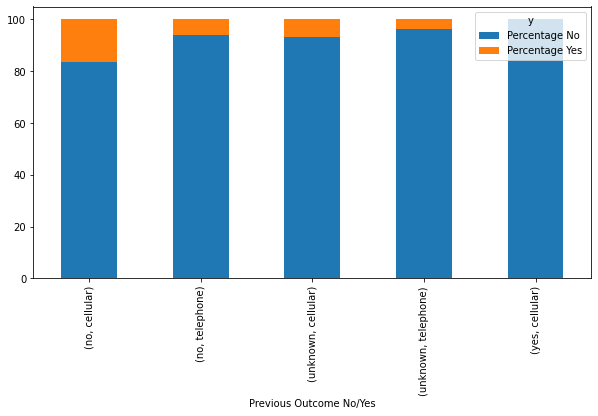

In [115]:
df=pd.crosstab([bank['default'],bank['contact']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

None of the people who had default credit and who were contacted over telephone subscribed the term deposite.

### Default-Months:

y                       People_approached  Percentage No  Percentage Yes
default quarters                                                        
no      First Quarter                9840          87.30           12.70
        Fourth Quarter              14979          89.26           10.74
        Second Quarter               4090          82.71           17.29
        Third Quarter                 473          49.05           50.95
unknown First Quarter                2660          94.10            5.90
        Fourth Quarter               4615          95.47            4.53
        Second Quarter                411          92.46            7.54
        Third Quarter                  14          64.29           35.71
yes     First Quarter                   2         100.00            0.00


Text(0.5, 0, 'Previous Outcome No/Yes')

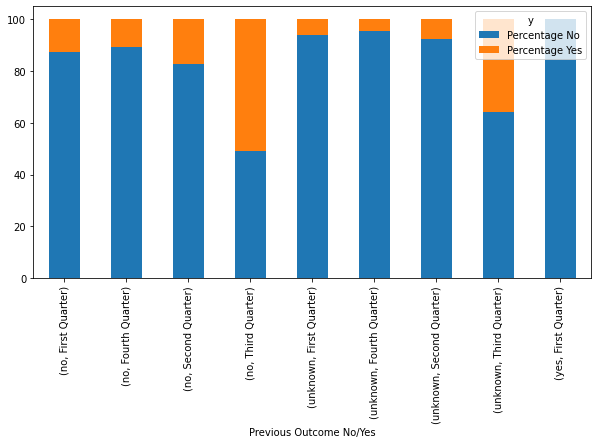

In [116]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k


df=pd.crosstab([bank['default'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Default-Poutcome:

y                    People_approached  Percentage No  Percentage Yes
default poutcome                                                     
no      failure                   3363          84.51           15.49
        nonexistent              24833          89.94           10.06
        success                   1186          33.56           66.44
unknown failure                    459          94.12            5.88
        nonexistent               7188          95.16            4.84
        success                     53          49.06           50.94
yes     nonexistent                  2         100.00            0.00


Text(0.5, 0, 'Previous Outcome No/Yes')

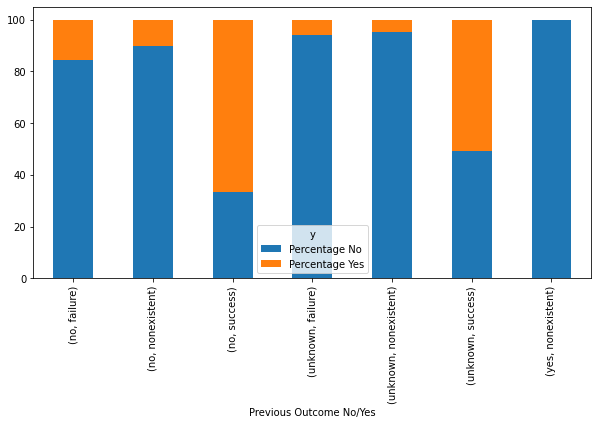

In [117]:
df=pd.crosstab([bank['default'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

From the above bar graph it can be deduced that the NONE of people who had default credit and subscribed in previous marketing campaign, subscribes again.
# --------------------------------------

### Housing-Loan:

y                People_approached  Percentage No  Percentage Yes
housing loan                                                     
no      no                   14465          89.01           10.99
        yes                   2304          89.24           10.76
unknown unknown                882          89.68           10.32
yes     no                   16096          88.14           11.86
        yes                   3337          88.91           11.09


Text(0.5, 0, 'Previous Outcome No/Yes')

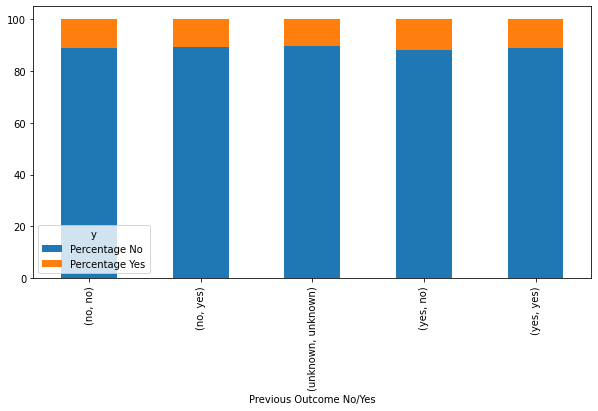

In [118]:
df=pd.crosstab([bank['housing'],bank['loan']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Housing-Contact:

y                  People_approached  Percentage No  Percentage Yes
housing contact                                                    
no      cellular                9928          85.09           14.91
        telephone               6841          94.77            5.23
unknown cellular                 505          84.75           15.25
        telephone                377          96.29            3.71
yes     cellular               13089          85.22           14.78
        telephone               6344          94.58            5.42


Text(0.5, 0, 'Previous Outcome No/Yes')

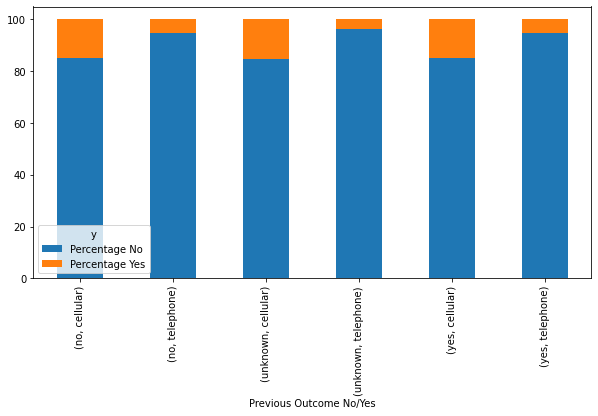

In [119]:
df=pd.crosstab([bank['housing'],bank['contact']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Housing-Month:

y                       People_approached  Percentage No  Percentage Yes
housing quarters                                                        
no      First Quarter                5494          88.41           11.59
        Fourth Quarter               9239          91.50            8.50
        Second Quarter               1843          83.13           16.87
        Third Quarter                 193          45.60           54.40
unknown First Quarter                 264          87.50           12.50
        Fourth Quarter                519          92.29            7.71
        Second Quarter                 90          82.22           17.78
        Third Quarter                   9          77.78           22.22
yes     First Quarter                6744          89.07           10.93
        Fourth Quarter               9836          89.91           10.09
        Second Quarter               2568          84.00           16.00
        Third Quarter                 285          

Text(0.5, 0, 'Previous Outcome No/Yes')

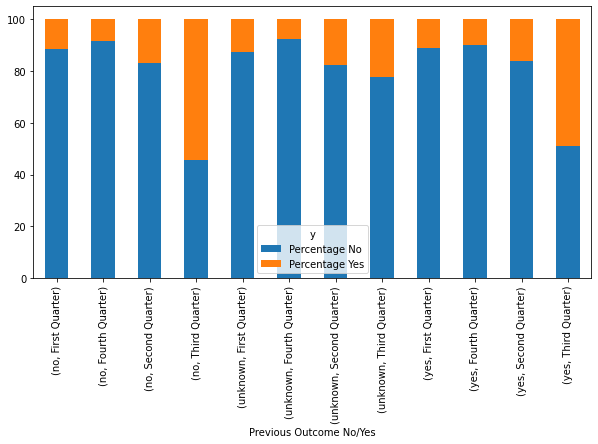

In [120]:

df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k


df=pd.crosstab([bank['housing'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Housing-Poutcome:

y                    People_approached  Percentage No  Percentage Yes
housing poutcome                                                     
no      failure                   1594          85.26           14.74
        nonexistent              14662          91.36            8.64
        success                    513          34.50           65.50
unknown failure                    101          81.19           18.81
        nonexistent                756          92.99            7.01
        success                     25          24.00           76.00
yes     failure                   2127          86.18           13.82
        nonexistent              16605          90.82            9.18
        success                    701          34.38           65.62


Text(0.5, 0, 'Previous Outcome No/Yes')

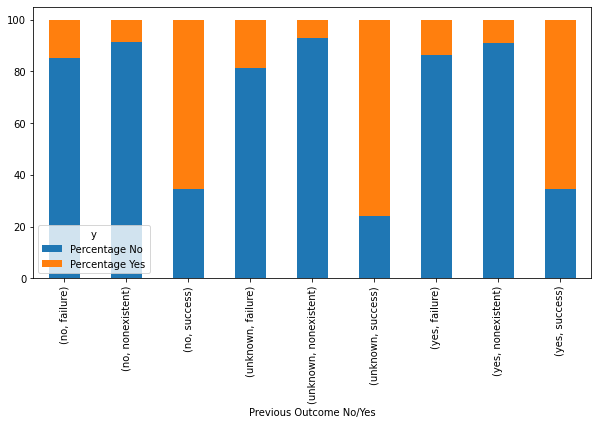

In [121]:
df=pd.crosstab([bank['housing'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

From the above bar graph it can be infereded that the around 70% people who subscribed in previous marketing campaign and didnot have housing loan subscribes again and 50% of those who had loan subscribe for term deposit.

### Loan-Contact:

y                  People_approached  Percentage No  Percentage Yes
loan    contact                                                    
no      cellular               19356          85.03           14.97
        telephone              11205          94.63            5.37
unknown cellular                 505          84.75           15.25
        telephone                377          96.29            3.71
yes     cellular                3661          85.85           14.15
        telephone               1980          94.95            5.05


Text(0.5, 0, 'Previous Outcome No/Yes')

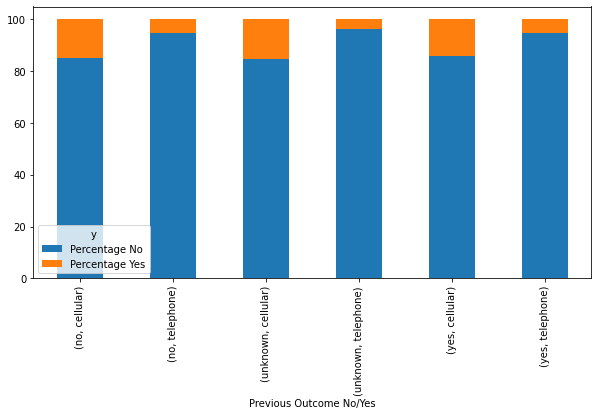

In [122]:
df=pd.crosstab([bank['loan'],bank['contact']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Loan-Month:

In [123]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k

y                       People_approached  Percentage No  Percentage Yes
loan    quarters                                                        
no      First Quarter               10272          88.59           11.41
        Fourth Quarter              16125          90.72            9.28
        Second Quarter               3752          83.61           16.39
        Third Quarter                 412          47.82           52.18
unknown First Quarter                 264          87.50           12.50
        Fourth Quarter                519          92.29            7.71
        Second Quarter                 90          82.22           17.78
        Third Quarter                   9          77.78           22.22
yes     First Quarter                1966          89.73           10.27
        Fourth Quarter               2950          90.51            9.49
        Second Quarter                659          83.76           16.24
        Third Quarter                  66          

Text(0.5, 0, 'Previous Outcome No/Yes')

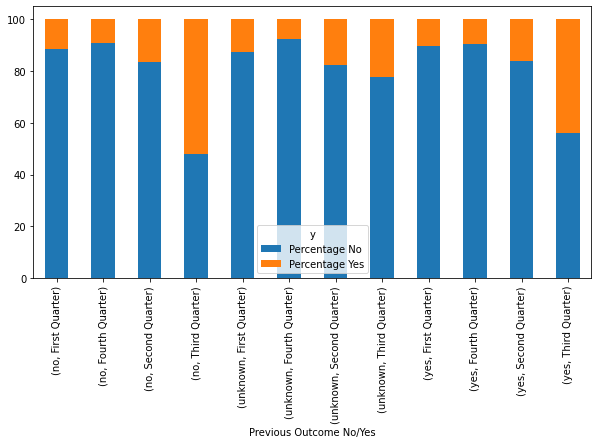

In [124]:
df=pd.crosstab([bank['loan'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Loan-Poutcome:

y                    People_approached  Percentage No  Percentage Yes
loan    poutcome                                                     
no      failure                   3141          85.51           14.49
        nonexistent              26389          91.02            8.98
        success                   1031          34.72           65.28
unknown failure                    101          81.19           18.81
        nonexistent                756          92.99            7.01
        success                     25          24.00           76.00
yes     failure                    580          87.24           12.76
        nonexistent               4878          91.37            8.63
        success                    183          32.79           67.21


Text(0.5, 0, 'Previous Outcome No/Yes')

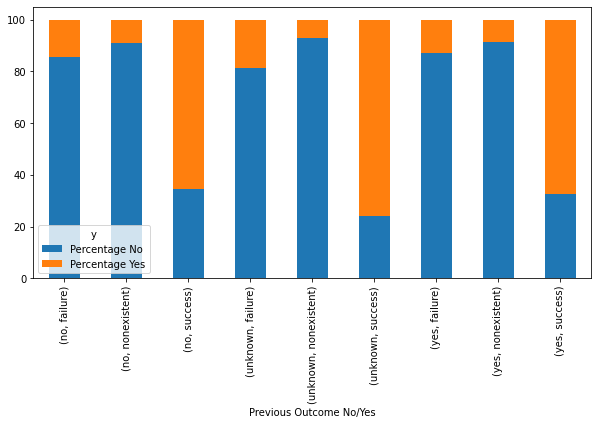

In [125]:
df=pd.crosstab([bank['loan'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

From the above bar graph it can be infered that the out of the people who subscribed in previous marketing campaign, 55-65% subscribe again.

### Contact-Month:


y                         People_approached  Percentage No  Percentage Yes
contact   quarters                                                        
cellular  First Quarter               11215          88.31           11.69
          Fourth Quarter               7929          83.19           16.81
          Second Quarter               3944          84.20           15.80
          Third Quarter                 434          48.16           51.84
telephone First Quarter                1287          92.54            7.46
          Fourth Quarter              11665          95.85            4.15
          Second Quarter                557          79.35           20.65
          Third Quarter                  53          60.38           39.62


Text(0.5, 0, 'Previous Outcome No/Yes')

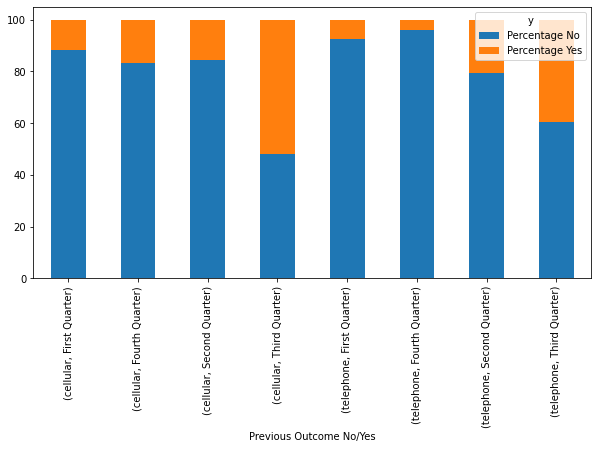

In [126]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k

df=pd.crosstab([bank['contact'],df['quarters']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### Contact-Poutcome:

y                      People_approached  Percentage No  Percentage Yes
contact   poutcome                                                     
cellular  failure                   3546          85.45           14.55
          nonexistent              18825          88.22           11.78
          success                   1151          34.14           65.86
telephone failure                    276          88.41           11.59
          nonexistent              13198          95.25            4.75
          success                     88          35.23           64.77


Text(0.5, 0, 'Previous Outcome No/Yes')

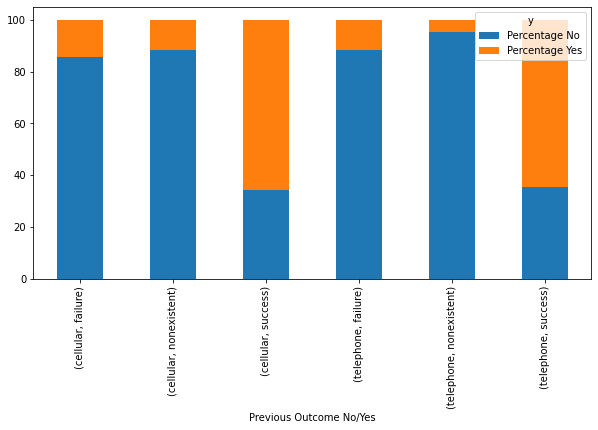

In [127]:
df=pd.crosstab([bank['contact'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

From the above bar graph it can be deduced that the people who were contacted on cellular and telephone subscribed during previous marketing campaigns, subscribes significantly.


### Month-Poutcome:

y                           People_approached  Percentage No  Percentage Yes
quarters       poutcome                                                     
First Quarter  failure                    467          67.45           32.55
               nonexistent              11620          91.76            8.24
               success                    415          28.19           71.81
Fourth Quarter failure                   2325          89.85           10.15
               nonexistent              16822          92.14            7.86
               success                    447          42.06           57.94
Second Quarter failure                    943          86.64           13.36
               nonexistent               3250          87.38           12.62
               success                    308          34.42           65.58
Third Quarter  failure                     87          60.92           39.08
               nonexistent                331          52.87           47.13

Text(0.5, 0, 'Previous Outcome No/Yes')

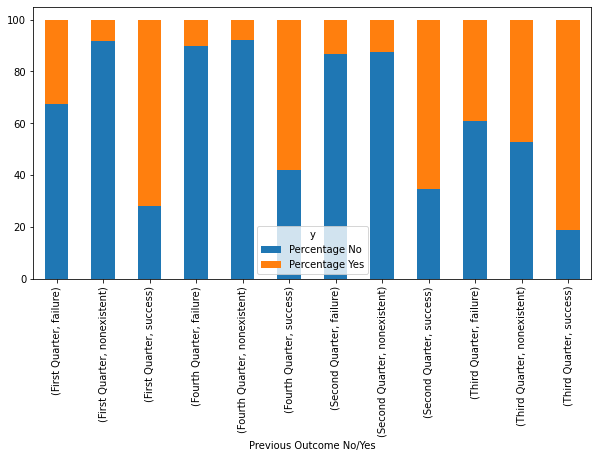

In [128]:
df=bank[['month','y']].copy(deep=True)
k=[]
m=['apr' ,'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec' ,'jan', 'feb' ,'mar']
for i in df['month']:
    if i in m[3:6]:
        k.append('First Quarter')
    elif i in m[6:9]:
        k.append('Second Quarter')
    elif i in m[9:12]:
        k.append('Third Quarter')
    else:
        k.append('Fourth Quarter')
df['quarters']=k
df=pd.crosstab([df['quarters'],bank['poutcome']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

From the above bar graph it can be deduced that the people who subscribed because of previous marketing campaign, subscribes again in each quarter.

### Multivariate Analysis Num-Num:

In [133]:
dummy=bank[['y','age','day_of_week']].copy(deep=True)
k=[]
for i in bank['age']:#dividing the age into groups
    if i<26:
        k.append('Group<25')
    elif i>25 and i<=45:
        k.append('25<Group<=45')
    elif i>45 and i<=65:
        k.append('45<Group<=65')
    elif i>65:
        k.append('Group>65')
    else:
        continue
dummy['converted_age_group']=k
minutes=bank[['duration']]/60
dummy['Time']=minutes
k=[]
for i in dummy['Time']:
    if i<=5:
        k.append('<=5')
    elif i>5 and i<=10:
        k.append('>5&<=10')
    elif i>10 and i<=15:
        k.append('>10&<=15')
    elif i>15 and i<=20:
        k.append('>15&<=20')
    else:
        k.append('>20')
dummy['converted_duration_group']=k


k=[]
for i in bank['pdays']:
    if i==999:
        k.append('newClients')
    else:
        k.append('oldClients')
dummy['converted_pdays_group']=k

dummy.head()


y  age day_of_week converted_age_group      Time converted_duration_group  \
0  no   56         mon        45<Group<=65  5.116667                  >5&<=10   
1  no   45         mon        25<Group<=45  3.300000                      <=5   
2  no   59         mon        45<Group<=65  2.316667                      <=5   
3  no   41         mon        25<Group<=45  3.616667                      <=5   
4  no   24         mon            Group<25  6.333333                  >5&<=10   

  converted_pdays_group  
0            newClients  
1            newClients  
2            newClients  
3            newClients  
4            newClients

### Duration-Age:

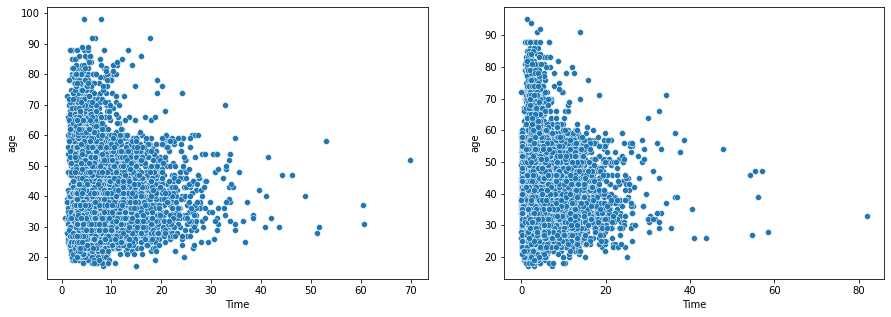

In [134]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dummy[dummy['y']=='yes']['Time'],y=bank[bank['y']=='yes']['age'])
plt.subplot(1,2,2)
sns.scatterplot(x=dummy[dummy['y']=='no']['Time'],y=bank[bank['y']=='no']['age'])
plt.show()

converted_age_group       25<Group<=45  45<Group<=65  Group<25  Group>65
converted_duration_group                                                
<=5                              18199          7366      1041       382
>10&<=15                          1327           534        95        28
>15&<=20                           489           166        31         8
>20                                310           126        18         6
>5&<=10                           4587          1922       307       142


<AxesSubplot:xlabel='converted_duration_group'>

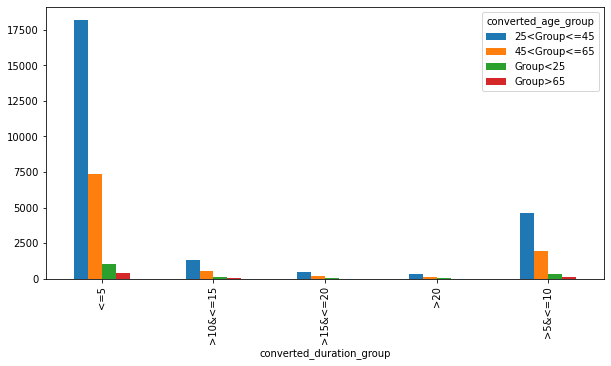

In [135]:
print(pd.crosstab(dummy['converted_duration_group'],dummy['converted_age_group']))
pd.crosstab(dummy['converted_duration_group'],dummy['converted_age_group']).plot(kind='bar',figsize=(10,5))

y                                                  no %      yes %
converted_duration_group converted_age_group                      
<=5                      25<Group<=45         95.851420   4.148580
                         45<Group<=65         95.492805   4.507195
                         Group<25             87.319885  12.680115
                         Group>65             62.827225  37.172775
>10&<=15                 25<Group<=45         57.498116  42.501884
                         45<Group<=65         60.861423  39.138577
                         Group<25             47.368421  52.631579
                         Group>65             32.142857  67.857143
>15&<=20                 25<Group<=45         42.944785  57.055215
                         45<Group<=65         40.963855  59.036145
                         Group<25             45.161290  54.838710
                         Group>65             25.000000  75.000000
>20                      25<Group<=45         36.451613  63.54

<AxesSubplot:xlabel='converted_duration_group,converted_age_group'>

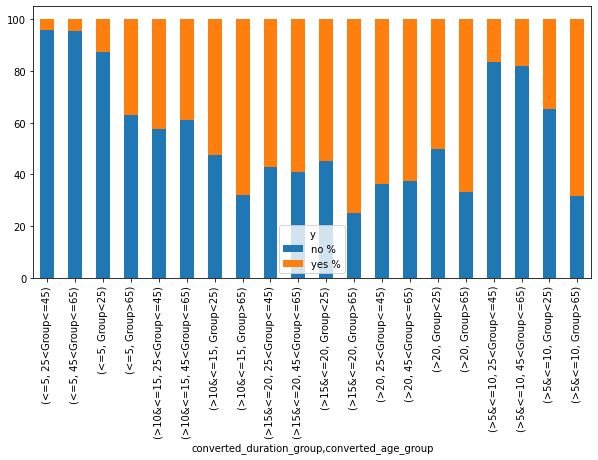

In [136]:
df=pd.crosstab([dummy['converted_duration_group'],dummy['converted_age_group']],dummy['y'])
df['total_approached']=df['yes']+df['no']
df['no %']=df['no']/df['total_approached']*100
df['yes %']=df['yes']/df['total_approached']*100
print(df[['no %','yes %']])
df[['no %','yes %']].plot(kind='bar',stacked=True,figsize=(10,5))

### Day-Age:

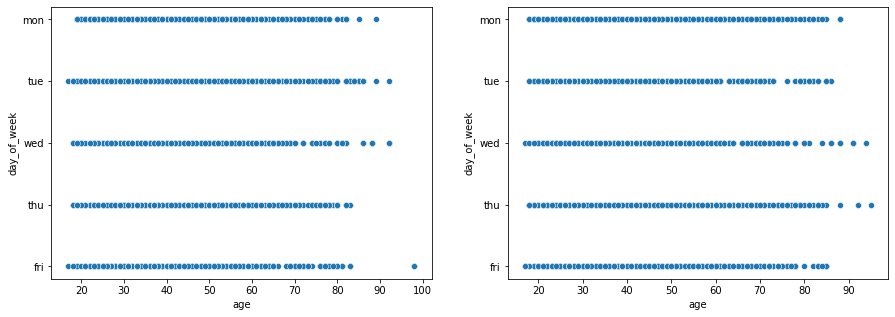

In [137]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dummy[dummy['y']=='yes']['age'],y=dummy[dummy['y']=='yes']['day_of_week'])
plt.subplot(1,2,2)
sns.scatterplot(x=dummy[dummy['y']=='no']['age'],y=dummy[dummy['y']=='no']['day_of_week'])
plt.show()

### Pdays-Age:

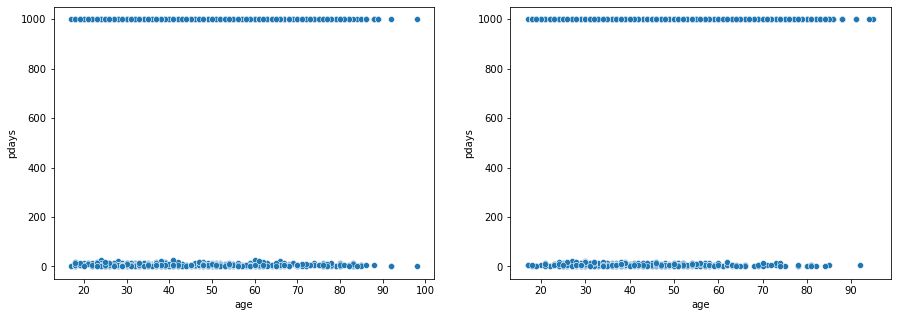

In [138]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dummy[dummy['y']=='yes']['age'],y=bank[bank['y']=='yes']['pdays'])
plt.subplot(1,2,2)
sns.scatterplot(x=dummy[dummy['y']=='no']['age'],y=bank[bank['y']=='no']['pdays'])
plt.show()

### Day-Duration:

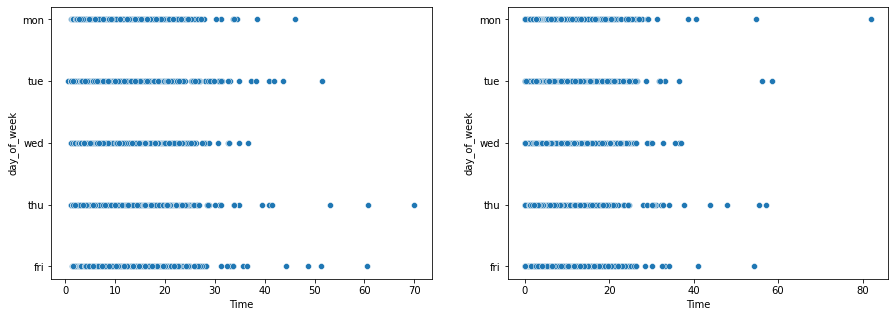

In [139]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dummy[dummy['y']=='yes']['Time'],y=dummy[dummy['y']=='yes']['day_of_week'])
plt.subplot(1,2,2)
sns.scatterplot(x=dummy[dummy['y']=='no']['Time'],y=dummy[dummy['y']=='no']['day_of_week'])
plt.show()

Text(0.5, 0, 'Wdnesday')

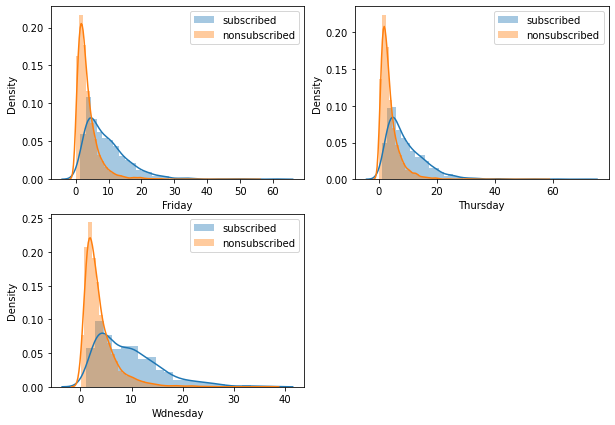

In [140]:

plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.distplot(dummy[(dummy['day_of_week']=='fri')&
                           (dummy['y']=='yes')]['Time'],label='subscribed')
sns.distplot(dummy[(dummy['day_of_week']=='fri')&
                           (dummy['y']=='no')]['Time'],label='nonsubscribed')
plt.xlabel('Friday')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(dummy[(dummy['day_of_week']=='thu')&
                           (dummy['y']=='yes')]['Time'],label='subscribed')
sns.distplot(dummy[(dummy['day_of_week']=='thu')&
                           (dummy['y']=='no')]['Time'],label='nonsubscribed')
plt.legend()
plt.xlabel('Thursday')
plt.subplot(2,2,3)
sns.distplot(dummy[(dummy['day_of_week']=='wed')&
                           (dummy['y']=='yes')]['Time'],label='subscribed')
sns.distplot(dummy[(dummy['day_of_week']=='wed')&
                           (dummy['y']=='no')]['Time'],label='nonsubscribed')
plt.legend()
plt.xlabel('Wdnesday')


Text(0.5, 0, 'Monday')

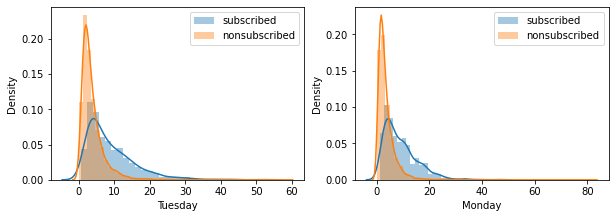

In [141]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.distplot(dummy[(dummy['day_of_week']=='tue')&
                           (dummy['y']=='yes')]['Time'],label='subscribed')
sns.distplot(dummy[(dummy['day_of_week']=='tue')&
                           (dummy['y']=='no')]['Time'],label='nonsubscribed')
plt.xlabel('Tuesday')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(dummy[(dummy['day_of_week']=='mon')&
                           (dummy['y']=='yes')]['Time'],label='subscribed')
sns.distplot(dummy[(dummy['day_of_week']=='mon')&
                           (dummy['y']=='no')]['Time'],label='nonsubscribed')
plt.legend()
plt.xlabel('Monday')


### Pdays-Duration:

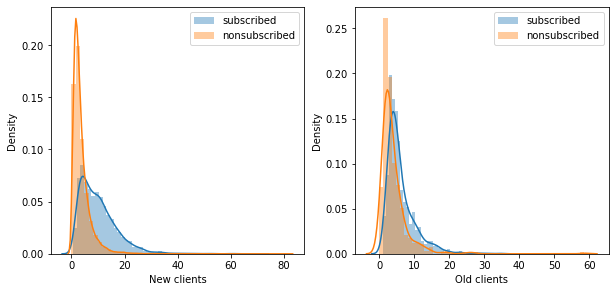

In [142]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(dummy[(dummy['converted_pdays_group']=='newClients')&
                           (dummy['y']=='yes')]['Time'],label='subscribed')
sns.distplot(dummy[(dummy['converted_pdays_group']=='newClients')&
                           (dummy['y']=='no')]['Time'],label='nonsubscribed')
plt.xlabel('New clients')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(dummy[(dummy['converted_pdays_group']=='oldClients')&
                           (dummy['y']=='yes')]['Time'],label='subscribed')
sns.distplot(dummy[(dummy['converted_pdays_group']=='oldClients')&
                           (dummy['y']=='no')]['Time'],label='nonsubscribed')
plt.legend()
plt.xlabel('Old clients')

plt.show()

### Additional Multivariate Analysis:

In [143]:
dummy=bank[['marital','y','job','day_of_week','education','default','housing','loan','contact','poutcome']].copy(deep=True)
minutes=bank[['duration']]/60
dummy['Time']=minutes
k=[]
for i in dummy['Time']:
    if i<=5:
        k.append('<=5')
    elif i>5 and i<=10:
        k.append('>5&<=10')
    elif i>10 and i<=15:
        k.append('>10&<=15')
    elif i>15 and i<=20:
        k.append('>15&<=20')
    else:
        k.append('>20')
dummy['minutes']=k

k=[]
for i in bank['pdays']:
    if i==999:
        k.append('newClients')
    else:
        k.append('oldClients')
dummy['client']=k

#### bivariate categorical to numerical plots:(Marital,Duration,Y)

y                  People_approached  Percentage No  Percentage Yes
marital  minutes                                                   
divorced <=5                    3024          95.73            4.27
         >10&<=15                223          56.95           43.05
         >15&<=20                 63          44.44           55.56
         >20                      46          39.13           60.87
         >5&<=10                 770          81.95           18.05
married  <=5                   16413          95.78            4.22
         >10&<=15               1191          59.87           40.13
         >15&<=20                421          41.33           58.67
         >20                     279          37.63           62.37
         >5&<=10                4175          83.23           16.77
single   <=5                    7508          92.86            7.14
         >10&<=15                564          52.84           47.16
         >15&<=20                207          43

Text(0.5, 0, 'Previous Outcome No/Yes')

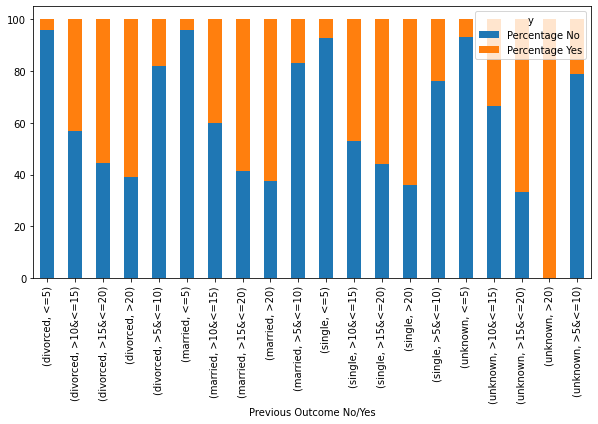

In [144]:
df=pd.crosstab([dummy['marital'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

#### bivariate categorical to numerical plots:(Job,Duration,Y)

Text(0.5, 0, 'Previous Outcome No/Yes')

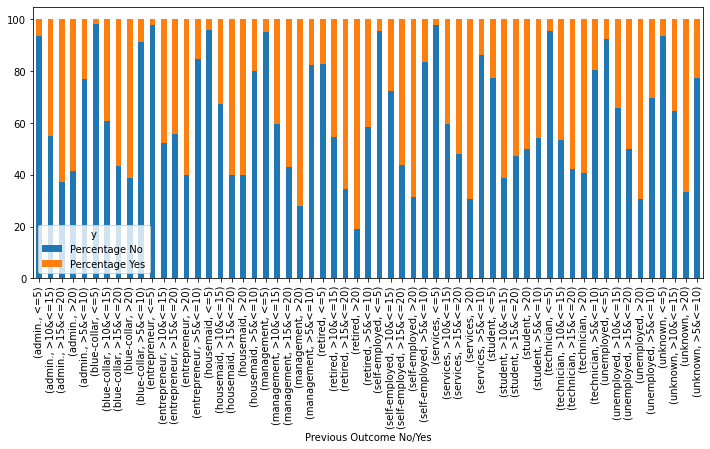

In [145]:
df=pd.crosstab([dummy['job'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
#print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True,figsize=(12,5))
plt.xlabel('Previous Outcome No/Yes')

#### bivariate categorical to numerical plots:(Education,Duration,Y)

y                             People_approached  Percentage No  Percentage Yes
education           minutes                                                   
basic.4y            <=5                    2696          95.18            4.82
                    >10&<=15                193          67.88           32.12
                    >15&<=20                 63          49.21           50.79
                    >20                      51          37.25           62.75
                    >5&<=10                 762          82.28           17.72
basic.6y            <=5                    1495          97.93            2.07
                    >10&<=15                116          59.48           40.52
                    >15&<=20                 47          36.17           63.83
                    >20                      29          31.03           68.97
                    >5&<=10                 387          88.89           11.11
basic.9y            <=5                    3930     

Text(0.5, 0, 'Previous Outcome No/Yes')

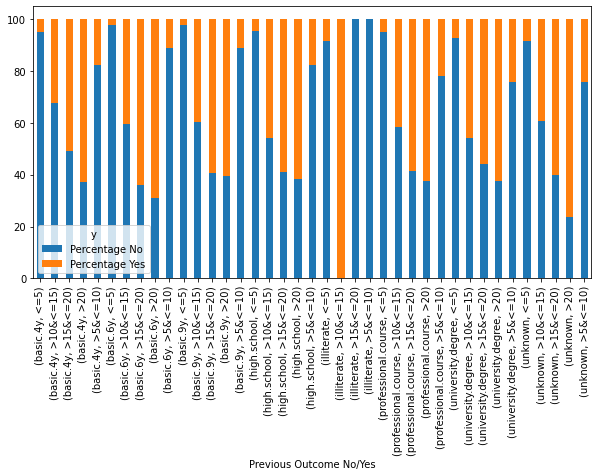

In [146]:
df=pd.crosstab([dummy['education'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### bivariate categorical to numerical plots:(Default,Duration,Y)

y                 People_approached  Percentage No  Percentage Yes
default minutes                                                   
no      <=5                   21345          93.78            6.22
        >10&<=15               1594          55.02           44.98
        >15&<=20                547          40.95           59.05
        >20                     369          39.02           60.98
        >5&<=10                5527          78.05           21.95
unknown <=5                    5641          99.41            0.59
        >10&<=15                390          67.95           32.05
        >15&<=20                147          47.62           52.38
        >20                      91          29.67           70.33
        >5&<=10                1431          92.80            7.20
yes     <=5                       2         100.00            0.00


Text(0.5, 0, 'Previous Outcome No/Yes')

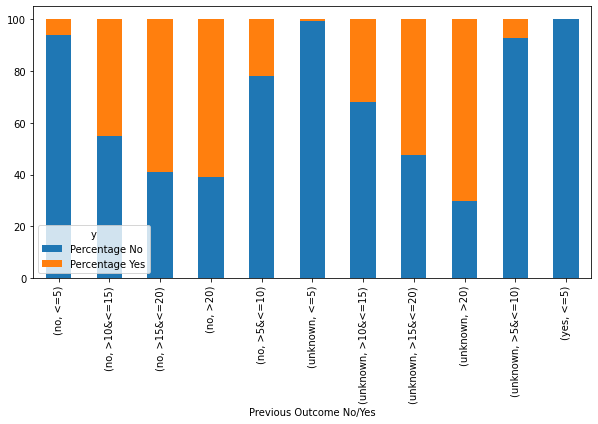

In [147]:
df=pd.crosstab([dummy['default'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### bivariate categorical to numerical plots:(Housing,Duration,Y)

y                 People_approached  Percentage No  Percentage Yes
housing minutes                                                   
no      <=5                   12158          95.35            4.65
        >10&<=15                904          59.29           40.71
        >15&<=20                324          42.28           57.72
        >20                     222          37.39           62.61
        >5&<=10                3161          81.68           18.32
unknown <=5                     661          95.31            4.69
        >10&<=15                 51          49.02           50.98
        >15&<=20                  9          22.22           77.78
        >20                      12          58.33           41.67
        >5&<=10                 149          85.23           14.77
yes     <=5                   14169          94.60            5.40
        >10&<=15               1029          56.46           43.54
        >15&<=20                361          42.94           5

Text(0.5, 0, 'Previous Outcome No/Yes')

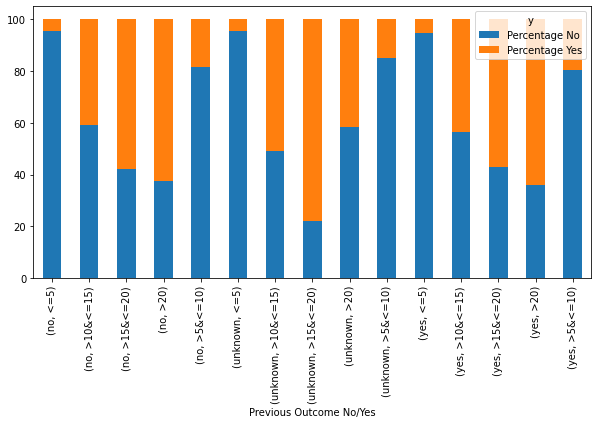

In [148]:
df=pd.crosstab([dummy['housing'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### bivariate categorical to numerical plots:(Loan,Duration,Y)

y                 People_approached  Percentage No  Percentage Yes
loan    minutes                                                   
no      <=5                   22181          94.87            5.13
        >10&<=15               1638          58.24           41.76
        >15&<=20                579          42.49           57.51
        >20                     364          35.16           64.84
        >5&<=10                5799          80.89           19.11
unknown <=5                     661          95.31            4.69
        >10&<=15                 51          49.02           50.98
        >15&<=20                  9          22.22           77.78
        >20                      12          58.33           41.67
        >5&<=10                 149          85.23           14.77
yes     <=5                    4146          95.37            4.63
        >10&<=15                295          55.25           44.75
        >15&<=20                106          43.40           5

Text(0.5, 0, 'Previous Outcome No/Yes')

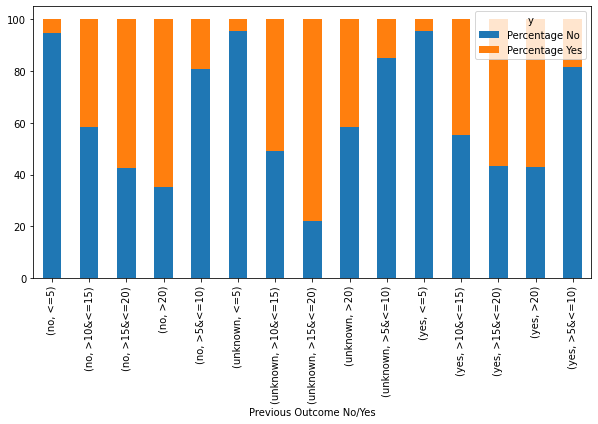

In [149]:
df=pd.crosstab([dummy['loan'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### bivariate categorical to numerical plots:(Contact,Duration,Y)

y                   People_approached  Percentage No  Percentage Yes
contact   minutes                                                   
cellular  <=5                   16921          92.75            7.25
          >10&<=15               1339          51.38           48.62
          >15&<=20                462          38.53           61.47
          >20                     303          34.32           65.68
          >5&<=10                4497          74.83           25.17
telephone <=5                   10067          98.66            1.34
          >10&<=15                645          70.39           29.61
          >15&<=20                232          50.00           50.00
          >20                     157          42.68           57.32
          >5&<=10                2461          92.52            7.48


Text(0.5, 0, 'Previous Outcome No/Yes')

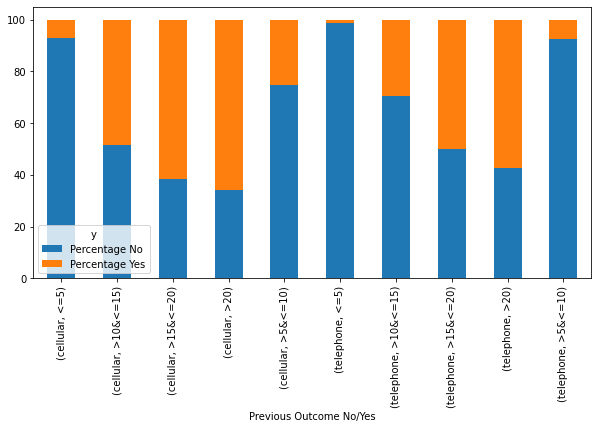

In [150]:
df=pd.crosstab([dummy['contact'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### bivariate categorical to numerical plots:(Poutcome,Duration,Y)

y                     People_approached  Percentage No  Percentage Yes
poutcome    minutes                                                   
failure     <=5                    2819          92.37            7.63
            >10&<=15                175          52.00           48.00
            >15&<=20                 53          35.85           64.15
            >20                      44          40.91           59.09
            >5&<=10                 731          74.15           25.85
nonexistent <=5                   23418          96.94            3.06
            >10&<=15               1716          60.20           39.80
            >15&<=20                610          44.43           55.57
            >20                     403          36.97           63.03
            >5&<=10                5876          85.48           14.52
success     <=5                     751          42.74           57.26
            >10&<=15                 93          19.35           80.65
      

Text(0.5, 0, 'Previous Outcome No/Yes')

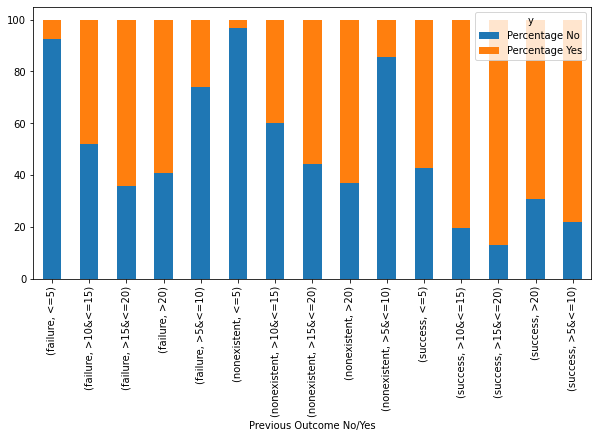

In [151]:
df=pd.crosstab([dummy['poutcome'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

### bivariate categorical to numerical plots:(Pdays(old or new client),Duration,Y)

y                    People_approached  Percentage No  Percentage Yes
client     minutes                                                   
newClients <=5                   26163          96.54            3.46
           >10&<=15               1875          59.63           40.37
           >15&<=20                661          43.87           56.13
           >20                     446          37.44           62.56
           >5&<=10                6577          84.51           15.49
oldClients <=5                     825          44.73           55.27
           >10&<=15                109          22.02           77.98
           >15&<=20                 33          12.12           87.88
           >20                      14          28.57           71.43
           >5&<=10                 381          22.05           77.95


Text(0.5, 0, 'Previous Outcome No/Yes')

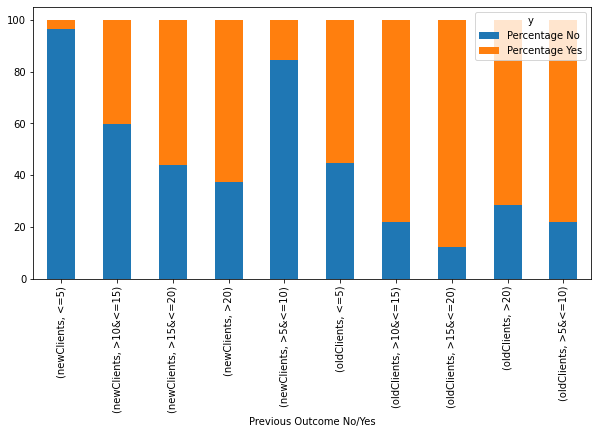

In [152]:
df=pd.crosstab([dummy['client'],dummy['minutes']],bank.y)
df['People_approached']=df['no']+df['yes']
df['Percentage No']=np.round(df['no']*100/df['People_approached'],2)
df['Percentage Yes']=np.round(df['yes']*100/df['People_approached'],2)
print(df[['People_approached','Percentage No','Percentage Yes']])
plt.rcParams['figure.figsize']=[20,6]
(df[['Percentage No','Percentage Yes']]).plot(kind='bar',stacked= True, figsize=(10,5))
plt.xlabel('Previous Outcome No/Yes')

##### --------------------------------------------------------------------------------------------------------------
# Task2.2(Question-2) Missing values identification and treatment :

In [153]:
bank.isnull().sum()

Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code       0
State_Code        0
City_Code         0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Postal Code       0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
Region            0
y                 0
dtype: int64

We find no missing values as such but we need to replace the unkown values with null values because they are the mssing values

In [154]:
df = bank.copy()
df


Customer_id  age          job  marital            education  default  \
0                1   56     services  married          high.school       no   
1                2   45     services  married             basic.9y  unknown   
2                3   59       admin.  married  professional.course       no   
3                4   41  blue-collar  married              unknown  unknown   
4                5   24   technician   single  professional.course       no   
...            ...  ...          ...      ...                  ...      ...   
37079        37080   73      retired  married  professional.course       no   
37080        37081   46  blue-collar  married  professional.course       no   
37081        37082   56      retired  married    university.degree       no   
37082        37083   44   technician  married  professional.course       no   
37083        37084   74      retired  married  professional.course       no   

      housing loan Region_Code State_Code  ... previous     poutcome  \
0          no  yes           3         S1  ...        0  nonexistent   
1          no   no           3         S1  ...        0  nonexistent   
2          no   no           4         S2  ...        0  nonexistent   
3          no   no           3         S3  ...        0  nonexistent   
4         yes   no           3         S3  ...        0  nonexistent   
...       ...  ...         ...        ...  ...      ...          ...   
37079     yes   no           2        S16  ...        0  nonexistent   
37080      no   no           2        S16  ...        0  nonexistent   
37081     yes   no           2        S16  ...        0  nonexistent   
37082      no   no           4        S17  ...        0  nonexistent   
37083     yes   no           1         S6  ...        1      failure   

      Postal Code emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0           42420          1.1          93.994          -36.4      4.857   
1           42420          1.1          93.994          -36.4      4.857   
2           90036          1.1          93.994          -36.4      4.857   
3           33311          1.1          93.994          -36.4      4.857   
4           33311          1.1          93.994          -36.4      4.857   
...           ...          ...             ...            ...        ...   
37079       10009         -1.1          94.767          -50.8      1.028   
37080       10011         -1.1          94.767          -50.8      1.028   
37081       10009         -1.1          94.767          -50.8      1.028   
37082       85254         -1.1          94.767          -50.8      1.028   
37083       79109         -1.1          94.767          -50.8      1.028   

       nr.employed   Region    y  
0           5191.0    South   no  
1           5191.0    South   no  
2           5191.0     West   no  
3           5191.0    South   no  
4           5191.0    South   no  
...            ...      ...  ...  
37079       4963.6     East  yes  
37080       4963.6     East   no  
37081       4963.6     East   no  
37082       4963.6     West  yes  
37083       4963.6  Central   no  

[37084 rows x 27 columns]

In [155]:
df.replace('unknown',np.NaN,inplace=True)
df.isnull().sum()


Customer_id          0
age                  0
job                306
marital             72
education         1549
default           7700
housing            882
loan               882
Region_Code          0
State_Code           0
City_Code            0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
Postal Code          0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
Region               0
y                    0
dtype: int64

#### Note:
We can see after replacing unknown with null values we have many missing values.

##### Missing Value Treatment for Marital column:
We can see we have only 72 missing values and rather than deleting the rows we will fill the missing data with the preceding row:

In [156]:
df1= df['marital'].fillna(method='bfill')

In [157]:
df1.isnull().sum()

0

We can see there are no null values present for the Marital column now as we have the column with fillna method.

##### Missing values for Job, Loan, Education and Housing Column:

In [158]:
df.isnull().mean().sort_values()

Customer_id       0.000000
nr.employed       0.000000
euribor3m         0.000000
cons.conf.idx     0.000000
cons.price.idx    0.000000
emp.var.rate      0.000000
Postal Code       0.000000
poutcome          0.000000
previous          0.000000
pdays             0.000000
campaign          0.000000
duration          0.000000
Region            0.000000
day_of_week       0.000000
contact           0.000000
City_Code         0.000000
State_Code        0.000000
Region_Code       0.000000
age               0.000000
month             0.000000
y                 0.000000
marital           0.001942
job               0.008252
loan              0.023784
housing           0.023784
education         0.041770
default           0.207637
dtype: float64

We can see missing values for job,loan, education and housing are very less than 20%, so we will use Frequent Category Imputation.

<AxesSubplot:>

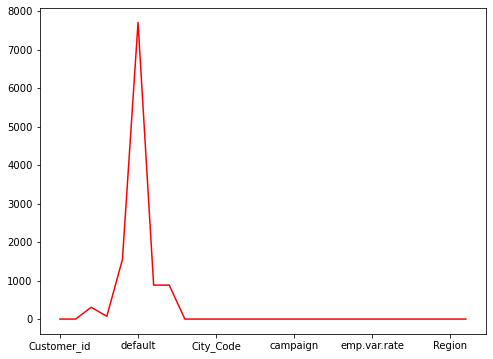

In [159]:
plt.figure(figsize=(8,6))
df.isnull().sum().plot(color='r')

In [160]:
for col in df.columns:
    if df[col].isnull().mean()<=0.20:
        df[col].fillna(df[col].mode()[0],inplace=True)

In [161]:
df.isnull().sum()

Customer_id          0
age                  0
job                  0
marital              0
education            0
default           7700
housing              0
loan                 0
Region_Code          0
State_Code           0
City_Code            0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
Postal Code          0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
Region               0
y                    0
dtype: int64

In [162]:
print(df.job.unique())
print(df.loan.unique())
print(df.housing.unique())
print(df.education.unique())

['services' 'admin.' 'blue-collar' 'technician' 'housemaid' 'retired'
 'management' 'entrepreneur' 'unemployed' 'student' 'self-employed']
['yes' 'no']
['no' 'yes']
['high.school' 'basic.9y' 'professional.course' 'university.degree'
 'basic.4y' 'basic.6y' 'illiterate']


We can see that the missing values for job, loan, education and housing column have been replaced by the most frequent categorical value.

##### Missing values for Default:
Default had >20% of missing values so we didn't use Most Frequent method for it.
We replace the missing values with unknown.

In [163]:
df['default']= df['default'].fillna('unknown')

In [164]:
df.isnull().sum()

Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code       0
State_Code        0
City_Code         0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Postal Code       0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
Region            0
y                 0
dtype: int64

##### Conclusion:
Thus, we have treated all the missing values.

## Outlier analysis and treatment :

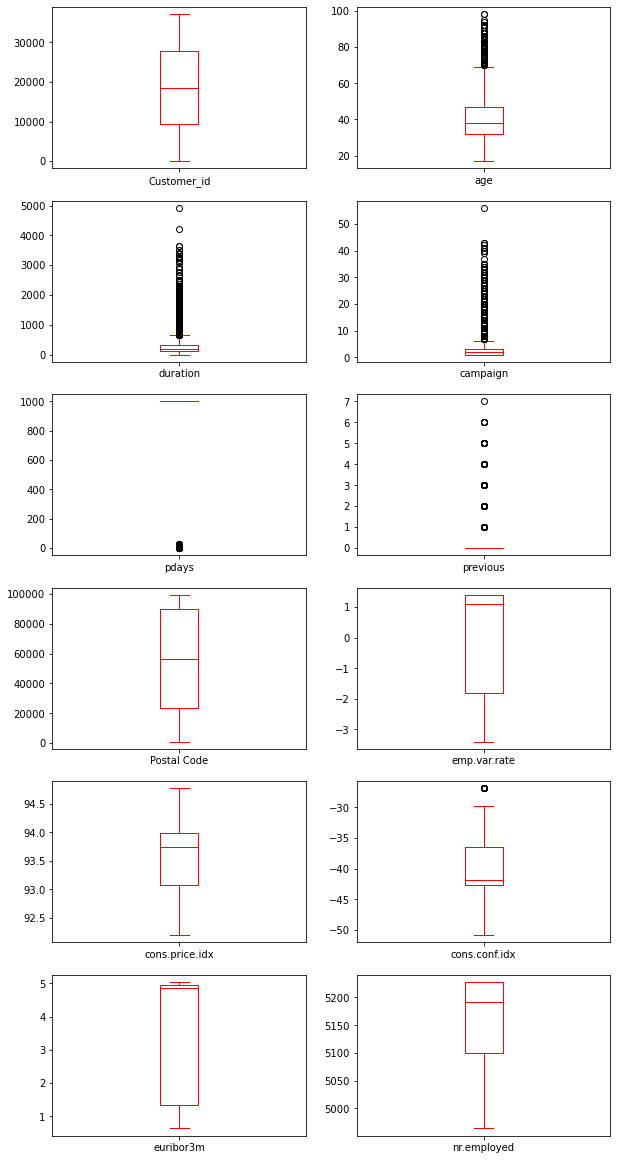

In [165]:
df.plot(kind='box', color='red', subplots=True, layout = (10,2), sharex=False,figsize=(10,35))
plt.show()

We can see duration, age and campaign have a lot of outliers and we will replace them with the median values for age and duration.
We wont change the campaign data as it may be needed.

#### Outlier Treatment for duration.

In [166]:
df.duration.quantile(.99)

1269.3399999999965

In [167]:
median=df['duration'].median()

In [168]:
df['duration'].loc[(df['duration']>df.duration.quantile(0.99))]=median

<AxesSubplot:>

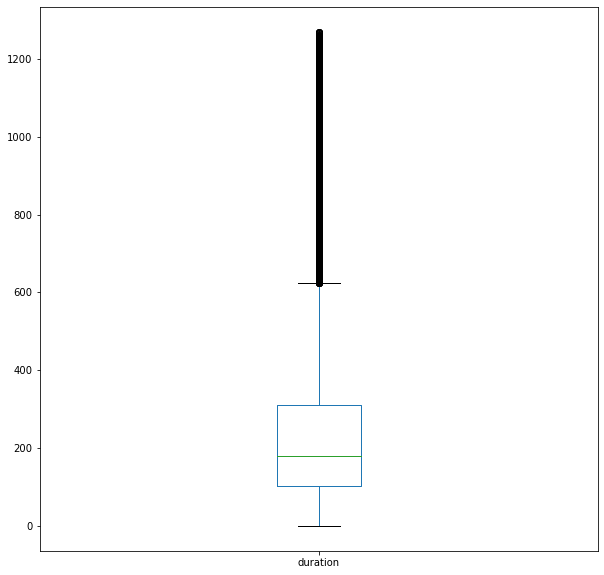

In [169]:
df.duration.plot(kind='box', figsize=(10,10))

The remaining outliers can be allowed as it is feasible.

##### For age column- Outliers:

As such we wouldn't want to replace values for the age column but just for the sake of better distribution, we will replace, it with the median.

In [170]:
df.age.quantile(.99)

71.0

In [171]:
median=df['age'].median()

In [172]:
df['age'].loc[(df['age']>df.age.quantile(0.99))]=median

<AxesSubplot:>

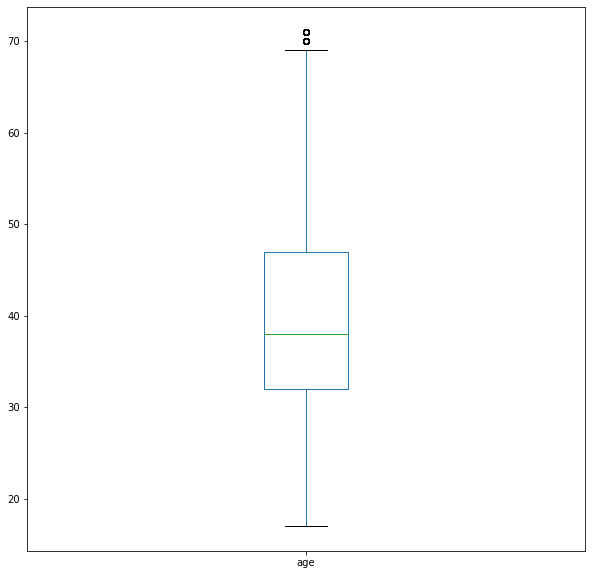

In [173]:
df.age.plot(kind='box', figsize=(10,10))

Now the age column has very low number of outliers.

# Task 2.2(Question 4)--Data Scaling:

Scaling data using minmax and z-score normalization:

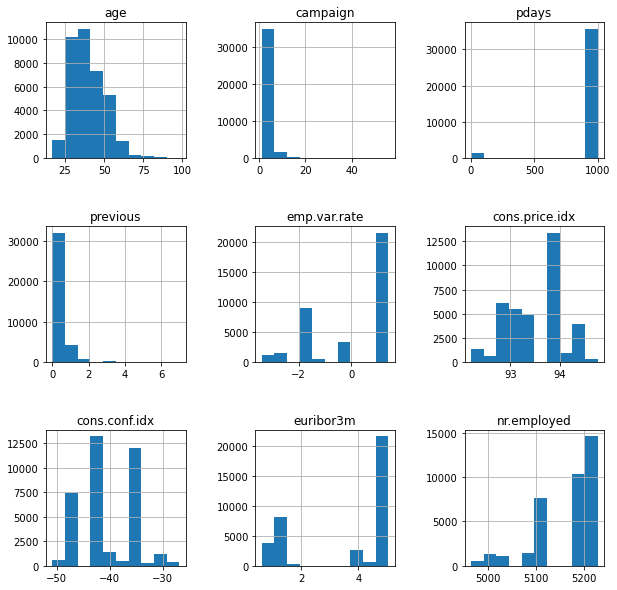

In [174]:
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
bank.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [208]:
bank.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [209]:
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
df['pdays2']=df.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
df['pdays']=df.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
df['pdays']=df['pdays'].astype(int)
df.head()

Customer_id  age  job  marital  education  default  housing  loan  \
0            1   56    7        1          3        0        0     1   
1            2   45    7        1          2        1        0     0   
2            3   59    0        1          5        0        0     0   
3            4   41    1        1          6        1        0     0   
4            5   24    9        2          5        0        1     0   

   Region_Code  State_Code  ...  poutcome  Postal Code  emp.var.rate  \
0            2           0  ...         1        42420           1.1   
1            2           0  ...         1        42420           1.1   
2            3          11  ...         1        90036           1.1   
3            2          22  ...         1        33311           1.1   
4            2          22  ...         1        33311           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  Region  y  pdays2  
0          93.994          -36.4      4.857       5191.0       3  0       1  
1          93.994          -36.4      4.857       5191.0       3  0       1  
2          93.994          -36.4      4.857       5191.0       4  0       1  
3          93.994          -36.4      4.857       5191.0       3  0       1  
4          93.994          -36.4      4.857       5191.0       3  0       1  

[5 rows x 28 columns]

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37084 entries, 0 to 37083
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  int32  
 3   marital         37084 non-null  int32  
 4   education       37084 non-null  int32  
 5   default         37084 non-null  int32  
 6   housing         37084 non-null  int32  
 7   loan            37084 non-null  int32  
 8   Region_Code     37084 non-null  int32  
 9   State_Code      37084 non-null  int32  
 10  City_Code       37084 non-null  int32  
 11  contact         37084 non-null  int32  
 12  month           37084 non-null  int32  
 13  day_of_week     37084 non-null  int32  
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int32  
 17  previous        37084 non-null 

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37084 entries, 0 to 37083
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  int32  
 3   marital         37084 non-null  int32  
 4   education       37084 non-null  int32  
 5   default         37084 non-null  int32  
 6   housing         37084 non-null  int32  
 7   loan            37084 non-null  int32  
 8   Region_Code     37084 non-null  int32  
 9   State_Code      37084 non-null  int32  
 10  City_Code       37084 non-null  int32  
 11  contact         37084 non-null  int32  
 12  month           37084 non-null  int32  
 13  day_of_week     37084 non-null  int32  
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int32  
 17  previous        37084 non-null 

In [212]:
df_num = df.select_dtypes(exclude=['object'])
df_num

Customer_id  age  job  marital  education  default  housing  loan  \
0                1   56    7        1          3        0        0     1   
1                2   45    7        1          2        1        0     0   
2                3   59    0        1          5        0        0     0   
3                4   41    1        1          6        1        0     0   
4                5   24    9        2          5        0        1     0   
...            ...  ...  ...      ...        ...      ...      ...   ...   
37079        37080   38    5        1          5        0        1     0   
37080        37081   46    1        1          5        0        0     0   
37081        37082   56    5        1          6        0        1     0   
37082        37083   44    9        1          5        0        0     0   
37083        37084   38    5        1          5        0        1     0   

       Region_Code  State_Code  ...  poutcome  Postal Code  emp.var.rate  \
0                2           0  ...         1        42420           1.1   
1                2           0  ...         1        42420           1.1   
2                3          11  ...         1        90036           1.1   
3                2          22  ...         1        33311           1.1   
4                2          22  ...         1        33311           1.1   
...            ...         ...  ...       ...          ...           ...   
37079            1           7  ...         1        10009          -1.1   
37080            1           7  ...         1        10011          -1.1   
37081            1           7  ...         1        10009          -1.1   
37082            3           8  ...         1        85254          -1.1   
37083            0          45  ...         0        79109          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  Region  y  \
0              93.994          -36.4      4.857       5191.0       3  0   
1              93.994          -36.4      4.857       5191.0       3  0   
2              93.994          -36.4      4.857       5191.0       4  0   
3              93.994          -36.4      4.857       5191.0       3  0   
4              93.994          -36.4      4.857       5191.0       3  0   
...               ...            ...        ...          ...     ... ..   
37079          94.767          -50.8      1.028       4963.6       1  1   
37080          94.767          -50.8      1.028       4963.6       1  0   
37081          94.767          -50.8      1.028       4963.6       1  0   
37082          94.767          -50.8      1.028       4963.6       4  1   
37083          94.767          -50.8      1.028       4963.6       0  0   

       pdays2  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
37079       1  
37080       1  
37081       1  
37082       1  
37083       1  

[37084 rows x 28 columns]

In [213]:
from sklearn.preprocessing import MinMaxScaler

In [218]:
scaler = StandardScaler()

NameError: name 'StandardScaler' is not defined

In [215]:
scaled_data = scaler.fit_transform(df_num)

In [216]:
scaled_data = pd.DataFrame(scaled_data, columns=df_num.columns)

In [217]:
scaled_data

Customer_id       age  job  marital  education  default  housing  loan  \
0         0.000000  0.722222  0.7      0.5   0.500000      0.0      0.0   1.0   
1         0.000027  0.518519  0.7      0.5   0.333333      0.5      0.0   0.0   
2         0.000054  0.777778  0.0      0.5   0.833333      0.0      0.0   0.0   
3         0.000081  0.444444  0.1      0.5   1.000000      0.5      0.0   0.0   
4         0.000108  0.129630  0.9      1.0   0.833333      0.0      1.0   0.0   
...            ...       ...  ...      ...        ...      ...      ...   ...   
37079     0.999892  0.388889  0.5      0.5   0.833333      0.0      1.0   0.0   
37080     0.999919  0.537037  0.1      0.5   0.833333      0.0      0.0   0.0   
37081     0.999946  0.722222  0.5      0.5   1.000000      0.0      1.0   0.0   
37082     0.999973  0.500000  0.9      0.5   0.833333      0.0      0.0   0.0   
37083     1.000000  0.388889  0.5      0.5   0.833333      0.0      1.0   0.0   

       Region_Code  State_Code  ...  poutcome  Postal Code  emp.var.rate  \
0             0.50    0.000000  ...       0.5     0.421123      0.937500   
1             0.50    0.000000  ...       0.5     0.421123      0.937500   
2             0.75    0.229167  ...       0.5     0.905710      0.937500   
3             0.50    0.458333  ...       0.5     0.328421      0.937500   
4             0.50    0.458333  ...       0.5     0.328421      0.937500   
...            ...         ...  ...       ...          ...           ...   
37079         0.25    0.145833  ...       0.5     0.091277      0.479167   
37080         0.25    0.145833  ...       0.5     0.091298      0.479167   
37081         0.25    0.145833  ...       0.5     0.091277      0.479167   
37082         0.75    0.166667  ...       0.5     0.857044      0.479167   
37083         0.00    0.937500  ...       0.0     0.794506      0.479167   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  Region    y  \
0            0.698753        0.60251   0.957379     0.859735    0.75  0.0   
1            0.698753        0.60251   0.957379     0.859735    0.75  0.0   
2            0.698753        0.60251   0.957379     0.859735    1.00  0.0   
3            0.698753        0.60251   0.957379     0.859735    0.75  0.0   
4            0.698753        0.60251   0.957379     0.859735    0.75  0.0   
...               ...            ...        ...          ...     ...  ...   
37079        1.000000        0.00000   0.089322     0.000000    0.25  1.0   
37080        1.000000        0.00000   0.089322     0.000000    0.25  0.0   
37081        1.000000        0.00000   0.089322     0.000000    0.25  0.0   
37082        1.000000        0.00000   0.089322     0.000000    1.00  1.0   
37083        1.000000        0.00000   0.089322     0.000000    0.00  0.0   

       pdays2  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
37079     0.0  
37080     0.0  
37081     0.0  
37082     0.0  
37083     0.0  

[37084 rows x 28 columns]

### Applying Z-score Normalization on the Data:

In [185]:
from scipy import stats
from scipy.stats import zscore

In [186]:
print(df_num.describe())
df1 = df_num.apply(zscore) # Normalization


        Customer_id           age      duration      campaign         pdays  \
count  37084.000000  37084.000000  37084.000000  37084.000000  37084.000000   
mean   18542.500000     39.673282    243.499380      2.569545     29.119728   
std    10705.373028      9.741623    212.166651      2.770611      4.568394   
min        1.000000     17.000000      0.000000      1.000000      0.000000   
25%     9271.750000     32.000000    102.000000      1.000000     30.000000   
50%    18542.500000     38.000000    180.000000      2.000000     30.000000   
75%    27813.250000     47.000000    311.000000      3.000000     30.000000   
max    37084.000000     71.000000   1269.000000     56.000000     30.000000   

           previous   Postal Code  emp.var.rate  cons.price.idx  \
count  37084.000000  37084.000000  37084.000000    37084.000000   
mean       0.172986  55202.625553      0.082669       93.576076   
std        0.495681  32057.300954      1.568997        0.578493   
min        0.000000 

In [187]:
df1

Customer_id       age  duration  campaign    pdays  previous  \
0        -1.732004  1.675998  0.299300 -0.566505  0.19269 -0.348990   
1        -1.731911  0.546807 -0.214454 -0.566505  0.19269 -0.348990   
2        -1.731817  1.983959 -0.492541 -0.566505  0.19269 -0.348990   
3        -1.731724  0.136192 -0.124901 -0.566505  0.19269 -0.348990   
4        -1.731630 -1.608920  0.643374 -0.566505  0.19269 -0.348990   
...            ...       ...       ...       ...      ...       ...   
37079     1.731630 -0.171769  0.426560 -0.566505  0.19269 -0.348990   
37080     1.731724  0.649461  0.657514 -0.566505  0.19269 -0.348990   
37081     1.731817  1.675998 -0.256874 -0.205569  0.19269 -0.348990   
37082     1.731911  0.444154  0.935601 -0.566505  0.19269 -0.348990   
37083     1.732004 -0.171769 -0.021207  0.155367  0.19269  1.668462   

       Postal Code  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0        -0.398748      0.648404        0.722446       0.888187   0.712439   
1        -0.398748      0.648404        0.722446       0.888187   0.712439   
2         1.086612      0.648404        0.722446       0.888187   0.712439   
3        -0.682900      0.648404        0.722446       0.888187   0.712439   
4        -0.682900      0.648404        0.722446       0.888187   0.712439   
...            ...           ...             ...            ...        ...   
37079    -1.409795     -0.753784        2.058695      -2.227359  -1.495816   
37080    -1.409733     -0.753784        2.058695      -2.227359  -1.495816   
37081    -1.409795     -0.753784        2.058695      -2.227359  -1.495816   
37082     0.937439     -0.753784        2.058695      -2.227359  -1.495816   
37083     0.745749     -0.753784        2.058695      -2.227359  -1.495816   

       nr.employed    pdays2  
0         0.331618 -0.195263  
1         0.331618 -0.195263  
2         0.331618 -0.195263  
3         0.331618 -0.195263  
4         0.331618 -0.195263  
...            ...       ...  
37079    -2.818158 -0.195263  
37080    -2.818158 -0.195263  
37081    -2.818158 -0.195263  
37082    -2.818158 -0.195263  
37083    -2.818158 -0.195263  

[37084 rows x 13 columns]

# Task 2.2(Question-5)----Data Transformation:

#### Label Encoding the categorical Values:

In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
data =df
le = LabelEncoder()
data.job = le.fit_transform(data.job)
data.marital = le.fit_transform(data.marital)
data.education = le.fit_transform(data.education)
data.default = le.fit_transform(data.default)
data.housing = le.fit_transform(data.housing)
data.loan = le.fit_transform(data.loan)
data.contact = le.fit_transform(data.contact)
data.month = le.fit_transform(data.month)
data.day_of_week = le.fit_transform(data.day_of_week)
data.poutcome = le.fit_transform(data.poutcome)
data.y = le.fit_transform(data.y)
data.Region_Code = le.fit_transform(data.Region_Code)
data.City_Code = le.fit_transform(data.City_Code)
data.State_Code = le.fit_transform(data.State_Code)
data.Region = le.fit_transform(data.Region)
data.head()

Customer_id  age  job  marital  education  default  housing  loan  \
0            1   56    7        1          3        0        0     1   
1            2   45    7        1          2        1        0     0   
2            3   59    0        1          5        0        0     0   
3            4   41    1        1          6        1        0     0   
4            5   24    9        2          5        0        1     0   

   Region_Code  State_Code  ...  poutcome  Postal Code  emp.var.rate  \
0            2           0  ...         1        42420           1.1   
1            2           0  ...         1        42420           1.1   
2            3          11  ...         1        90036           1.1   
3            2          22  ...         1        33311           1.1   
4            2          22  ...         1        33311           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  Region  y  pdays2  
0          93.994          -36.4      4.857       5191.0       3  0       0  
1          93.994          -36.4      4.857       5191.0       3  0       0  
2          93.994          -36.4      4.857       5191.0       4  0       0  
3          93.994          -36.4      4.857       5191.0       3  0       0  
4          93.994          -36.4      4.857       5191.0       3  0       0  

[5 rows x 28 columns]

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37084 entries, 0 to 37083
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  int32  
 3   marital         37084 non-null  int32  
 4   education       37084 non-null  int32  
 5   default         37084 non-null  int32  
 6   housing         37084 non-null  int32  
 7   loan            37084 non-null  int32  
 8   Region_Code     37084 non-null  int32  
 9   State_Code      37084 non-null  int32  
 10  City_Code       37084 non-null  int32  
 11  contact         37084 non-null  int32  
 12  month           37084 non-null  int32  
 13  day_of_week     37084 non-null  int32  
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int32  
 17  previous        37084 non-null 

In [191]:
df_num

Customer_id  age  duration  campaign  pdays  previous  Postal Code  \
0                1   56       307         1     30         0        42420   
1                2   45       198         1     30         0        42420   
2                3   59       139         1     30         0        90036   
3                4   41       217         1     30         0        33311   
4                5   24       380         1     30         0        33311   
...            ...  ...       ...       ...    ...       ...          ...   
37079        37080   38       334         1     30         0        10009   
37080        37081   46       383         1     30         0        10011   
37081        37082   56       189         2     30         0        10009   
37082        37083   44       442         1     30         0        85254   
37083        37084   38       239         3     30         1        79109   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0               1.1          93.994          -36.4      4.857       5191.0   
1               1.1          93.994          -36.4      4.857       5191.0   
2               1.1          93.994          -36.4      4.857       5191.0   
3               1.1          93.994          -36.4      4.857       5191.0   
4               1.1          93.994          -36.4      4.857       5191.0   
...             ...             ...            ...        ...          ...   
37079          -1.1          94.767          -50.8      1.028       4963.6   
37080          -1.1          94.767          -50.8      1.028       4963.6   
37081          -1.1          94.767          -50.8      1.028       4963.6   
37082          -1.1          94.767          -50.8      1.028       4963.6   
37083          -1.1          94.767          -50.8      1.028       4963.6   

       pdays2  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
37079       0  
37080       0  
37081       0  
37082       0  
37083       0  

[37084 rows x 13 columns]

# Task 2.2(Question-6)---Feature Engineering:

### Handling missing values:

In [192]:
bank_copy = bank.copy(deep=True)
bank_copy.isnull().sum()

Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code       0
State_Code        0
City_Code         0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Postal Code       0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
Region            0
y                 0
dtype: int64

In [193]:
bank_copy.replace('unknown',np.NaN,inplace=True)
bank_copy.isnull().sum()

Customer_id          0
age                  0
job                306
marital             72
education         1549
default           7700
housing            882
loan               882
Region_Code          0
State_Code           0
City_Code            0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
Postal Code          0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
Region               0
y                    0
dtype: int64

In [194]:
bank_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37084 entries, 0 to 37083
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             36778 non-null  object 
 3   marital         37012 non-null  object 
 4   education       35535 non-null  object 
 5   default         29384 non-null  object 
 6   housing         36202 non-null  object 
 7   loan            36202 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

In [195]:
for col in bank_copy.columns:
    if bank_copy[col].isnull().mean()<=0.20:
        bank_copy[col].fillna(bank_copy[col].mode()[0],inplace=True)

In [196]:
bank_copy.isnull().sum()

Customer_id          0
age                  0
job                  0
marital              0
education            0
default           7700
housing              0
loan                 0
Region_Code          0
State_Code           0
City_Code            0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
Postal Code          0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
Region               0
y                    0
dtype: int64

We can see the columns with less than 20% off mssing values are replaced by the most frequent value.

We will replace the missing values in default by 'unknown'.

In [197]:
bank_copy['default']= bank_copy['default'].fillna('unknown')

In [198]:
bank_copy.isnull().sum()


Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code       0
State_Code        0
City_Code         0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Postal Code       0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
Region            0
y                 0
dtype: int64

In [199]:
bank_features = bank_copy.copy()

As you can see, all the missing values have been treated.

##### Handling Outliers:

Text(0.5, 1.0, 'No of employees')

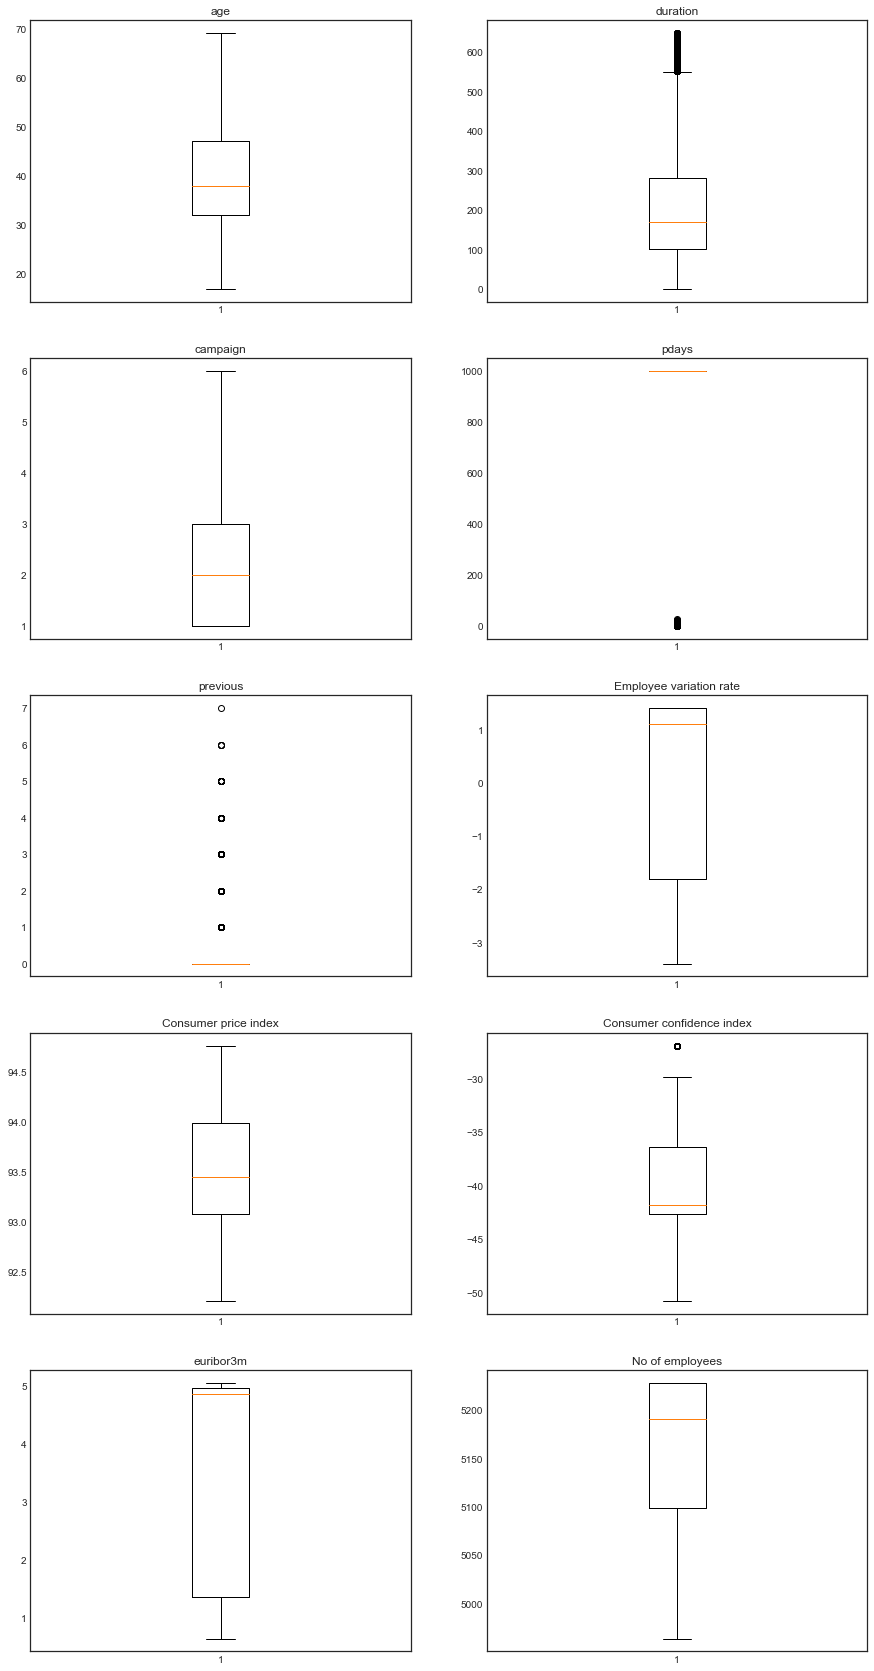

In [315]:

plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(bank_copy['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(bank_copy['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(bank_copy['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(bank_copy['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(bank_copy['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(bank_copy['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(bank_copy['nr.employed'])
ax.set_title('No of employees')

We see that many features doesn't have much outliers except for age,duration and campaign. So, let's fix only those features using IQR method.

In [316]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = bank_copy[cols].quantile(0.25)
    Q3 = bank_copy[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (bank_copy[cols] >= Q1 - 1.5 * IQR) & (bank_copy[cols] <= Q3 + 1.5 *IQR)
    bank_copy=bank_copy.loc[filter]

Text(0.5, 1.0, 'campaign')

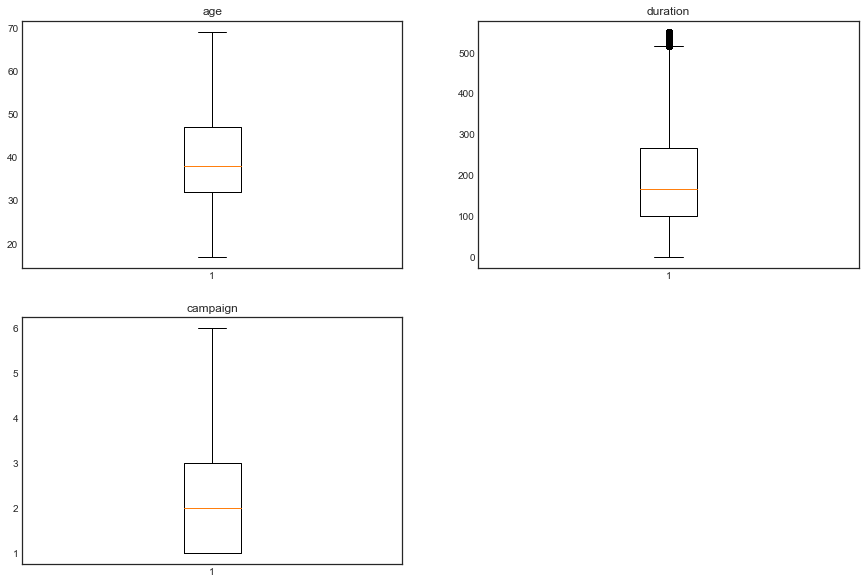

In [317]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')

Now that we have removed outliers, we can proceed for more feature engineering techniques

### Education- category clubbing:

Here we are clubbing category in education such as 'basic.9y','basic.6y','basic.4y' to 'middle school

In [318]:
bank_features=bank_copy.copy()
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    bank_features.loc[bank_features['education'] == i, 'education'] = "middle.school"

bank_features['education'].value_counts()

university.degree      10498
middle.school           9307
high.school             7162
professional.course     3995
illiterate                12
Name: education, dtype: int64

We have clubbed all the categories in education into one

### Encoding - Month and Day of week:

Encoding the categories in month and day of week to the respective numbers.

In [319]:

month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank_features['month']= bank_features['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank_features['day_of_week']= bank_features['day_of_week'].map(day_dict)

In [320]:
bank_features.loc[:, ['month', 'day_of_week']]

month  day_of_week
0          5            2
1          5            2
2          5            2
3          5            2
4          5            2
5          5            2
6          5            2
7          5            2
8          5            2
9          5            2
10         5            2
11         5            2
12         5            2
13         5            2
14         5            2
15         5            2
16         5            2
17         5            2
18         5            2
19         5            2
20         5            2
21         5            2
22         5            2
23         5            2
24         5            2
25         5            2
26         5            2
27         5            2
28         5            2
29         5            2
32         5            2
33         5            2
34         5            2
35         5            2
36         5            2
37         5            2
38         5            2
40         5            2
41         5            2
42         5            2
43         5            2
44         5            2
45         5            2
46         5            2
47         5            2
48         5            2
49         5            2
51         5            2
52         5            2
53         5            2
55         5            2
56         5            2
57         5            2
58         5            2
59         5            2
60         5            2
61         5            2
62         5            2
63         5            2
64         5            2
65         5            2
66         5            2
67         5            2
69         5            2
70         5            2
71         5            2
72         5            2
73         5            2
74         5            2
76         5            2
77         5            2
78         5            2
80         5            2
81         5            2
82         5            2
83         5            2
84         5            2
86         5            2
87         5            2
88         5            2
89         5            2
90         5            2
91         5            2
92         5            2
93         5            2
94         5            2
95         5            2
96         5            2
97         5            2
98         5            2
99         5            2
100        5            2
101        5            2
103        5            2
104        5            2
105        5            2
106        5            2
107        5            2
108        5            2
109        5            2
110        5            2
111        5            2
112        5            2
113        5            2
114        5            2
115        5            2
116        5            2
117        5            2
118        5            2
119        5            2
121        5            2
123        5            2
124        5            2
125        5            2
126        5            2
127        5            2
128        5            2
129        5            2
130        5            2
131        5            2
132        5            2
133        5            2
134        5            2
135        5            2
136        5            2
137        5            2
138        5            2
139        5            2
140        5            2
141        5            2
142        5            2
143        5            2
144        5            2
145        5            2
146        5            2
148        5            2
149        5            2
150        5            2
152        5            2
153        5            2
154        5            2
155        5            2
157        5            2
158        5            2
159        5            2
160        5            2
161        5            2
162        5            2
163        5            2
164        5            2
165        5            2
166        5            2
167        5            2
168

We have hard encoded the month and day of week features

### Encoding 999 in pdays as 0:
Encoding 999 in pdays feature( i.e clients who haven't been contacted for the previous campaign) into 0

In [322]:
bank_features.loc[bank_features['pdays'] == 999, 'pdays'] = -1

bank_features['pdays'].value_counts()

-1     29896
 3       321
 6       282
 4        91
 9        46
 2        44
 12       44
 7        38
 5        34
 10       32
 13       23
 1        21
 11       20
 15       15
 14       14
 8        14
 0        10
 16        9
 17        7
 18        3
 22        3
 21        2
 25        1
 26        1
 27        1
 20        1
 19        1
Name: pdays, dtype: int64

We have converted 999 to 0 in pdays

### Ordinal Number Encoding:
           Here we are gonna encode the features which has yes,no and unknown. We will assign yes:1,no:0 and unknown:-1

In [323]:
dictionary={'yes':1,'no':0,'unknown':-1}
bank_features['housing']=bank_features['housing'].map(dictionary)
bank_features['default']=bank_features['default'].map(dictionary)
bank_features['loan']=bank_features['loan'].map(dictionary)

dictionary1={'no':0,'yes':1}
bank_features['y']=bank_features['y'].map(dictionary)

bank_features.loc[:,['housing','default','loan','y']].head()

housing  default  loan  y
0        0        0     1  0
1        0       -1     0  0
2        0        0     0  0
3        0       -1     0  0
4        1        0     0  0

We have encoded the yes/no features with hard encoding.

#### Using LabelEncoder for rest:

In [324]:
from sklearn.preprocessing import LabelEncoder

In [325]:
le = LabelEncoder()
bank_features.job = le.fit_transform(bank_features.job)
bank_features.marital = le.fit_transform(bank_features.marital)
bank_features.education = le.fit_transform(bank_features.education)
bank_features.contact = le.fit_transform(bank_features.contact)
bank_features.poutcome = le.fit_transform(bank_features.poutcome)
bank_features.Region_Code = le.fit_transform(bank_features.Region_Code)
bank_features.City_Code = le.fit_transform(bank_features.City_Code)
bank_features.State_Code = le.fit_transform(bank_features.State_Code)
bank_features.Region = le.fit_transform(bank_features.Region)
bank_features.head()

Customer_id  age  job  marital  education  default  housing  loan  \
0            1   56    7        1          0        0        0     1   
1            2   45    7        1          2       -1        0     0   
2            3   59    0        1          3        0        0     0   
3            4   41    1        1          4       -1        0     0   
4            5   24    9        2          3        0        1     0   

   Region_Code  State_Code  City_Code  contact  month  day_of_week  duration  \
0            2           0          0        1      5            2       307   
1            2           0          0        1      5            2       198   
2            3          11        111        1      5            2       139   
3            2          22        222        1      5            2       217   
4            2          22        222        1      5            2       380   

   campaign  pdays  previous  poutcome  Postal Code  emp.var.rate  \
0         1     -1         0         1        42420           1.1   
1         1     -1         0         1        42420           1.1   
2         1     -1         0         1        90036           1.1   
3         1     -1         0         1        33311           1.1   
4         1     -1         0         1        33311           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  Region  y  
0          93.994          -36.4      4.857       5191.0       3  0  
1          93.994          -36.4      4.857       5191.0       3  0  
2          93.994          -36.4      4.857       5191.0       4  0  
3          93.994          -36.4      4.857       5191.0       3  0  
4          93.994          -36.4      4.857       5191.0       3  0

### Standardization of columns:

In [328]:
df_cat = bank.select_dtypes(include=['object'])
df_cat.head()

job  marital            education  default housing loan  \
0     services  married          high.school       no      no  yes   
1     services  married             basic.9y  unknown      no   no   
2       admin.  married  professional.course       no      no   no   
3  blue-collar  married              unknown  unknown      no   no   
4   technician   single  professional.course       no     yes   no   

  Region_Code State_Code City_Code    contact month day_of_week     poutcome  \
0           3         S1        C1  telephone   may         mon  nonexistent   
1           3         S1        C1  telephone   may         mon  nonexistent   
2           4         S2        C2  telephone   may         mon  nonexistent   
3           3         S3        C3  telephone   may         mon  nonexistent   
4           3         S3        C3  telephone   may         mon  nonexistent   

  Region   y  
0  South  no  
1  South  no  
2   West  no  
3  South  no  
4  South  no

In [329]:
bank_scale=bank_features.copy()


scaler=StandardScaler()
bank_scale = scaler.fit_transform(bank_features)

In [333]:
bank_scale = pd.DataFrame(bank_scale,columns = bank_features.columns)
bank_scale.head()

Customer_id       age       job   marital  education   default   housing  \
0    -1.722771  1.696455  0.945271 -0.288562  -1.548398  0.509577 -1.104626   
1    -1.722678  0.558462  0.945271 -0.288562  -0.227238 -1.960864 -1.104626   
2    -1.722585  2.006817 -1.013815 -0.288562   0.433342  0.509577 -1.104626   
3    -1.722492  0.144646 -0.733946 -0.288562   1.093922 -1.960864 -1.104626   
4    -1.722399 -1.614070  1.505010  1.372144   0.433342  0.509577  0.905284   

       loan  Region_Code  State_Code  City_Code  contact     month  \
0  2.359040     0.365252   -1.214488  -1.294082  1.31674 -0.777491   
1 -0.423901     0.365252   -1.214488  -1.294082  1.31674 -0.777491   
2 -0.423901     1.223883   -0.464901  -0.668910  1.31674 -0.777491   
3 -0.423901     0.365252    0.284686  -0.043739  1.31674 -0.777491   
4 -0.423901     0.365252    0.284686  -0.043739  1.31674 -0.777491   

   day_of_week  duration  campaign     pdays  previous  poutcome  Postal Code  \
0    -1.387089  0.910001 -0.812427 -0.165189 -0.353578  0.206459    -0.397534   
1    -1.387089  0.028907 -0.812427 -0.165189 -0.353578  0.206459    -0.397534   
2    -1.387089 -0.448015 -0.812427 -0.165189 -0.353578  0.206459     1.088207   
3    -1.387089  0.182492 -0.812427 -0.165189 -0.353578  0.206459    -0.681758   
4    -1.387089  1.500092 -0.812427 -0.165189 -0.353578  0.206459    -0.681758   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0      0.659075        0.741006       0.891106   0.718765     0.337906   
1      0.659075        0.741006       0.891106   0.718765     0.337906   
2      0.659075        0.741006       0.891106   0.718765     0.337906   
3      0.659075        0.741006       0.891106   0.718765     0.337906   
4      0.659075        0.741006       0.891106   0.718765     0.337906   

     Region         y  
0  0.581824 -0.282352  
1  0.581824 -0.282352  
2  1.196198 -0.282352  
3  0.581824 -0.282352  
4  0.581824 -0.282352

We have scaled our numerical features as you can see from the head.

## Feature Selection:
Let's check the feature importances and prune our features to make our model perform well.

In [334]:
from sklearn.ensemble import ExtraTreesClassifier
X=bank_features.drop(['y'],axis=1)
y=bank_features.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

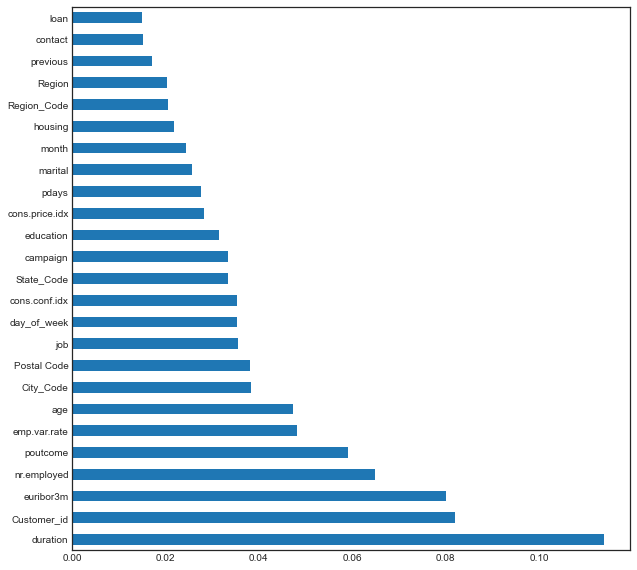

In [335]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))
plt.show()


From the bar plot we can see the importances of features based on it's impact towards output. Let's take up the top 17 features

#### PCA:

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [337]:
X = bank_scale.drop(['Customer_id','y'],axis = 1).values
y = bank_scale['y'].values
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [338]:
df_xtrain = pd.DataFrame(xtrain,columns=bank_features.drop(['Customer_id','y'],axis=1).columns)

### COVARIANCE MATRIX COMPUTATION:

In [339]:
cov_matrix=df_xtrain.cov()
cov_matrix

age       job   marital  education   default   housing  \
age             1.000341 -0.029876 -0.391314   0.027090 -0.184291 -0.006050   
job            -0.029876  1.004438  0.027283  -0.002124  0.047701  0.003969   
marital        -0.391314  0.027283  1.001892   0.047738  0.077582  0.013869   
education       0.027090 -0.002124  0.047738   1.000840  0.050745  0.009038   
default        -0.184291  0.047701  0.077582   0.050745  1.006516  0.012299   
housing        -0.006050  0.003969  0.013869   0.009038  0.012299  0.999800   
loan           -0.006750 -0.010231  0.004392   0.005745 -0.001158  0.037182   
Region_Code    -0.006150  0.000213 -0.000644  -0.004072 -0.000583  0.003596   
State_Code     -0.008757 -0.002403  0.000954   0.004262 -0.005728 -0.011193   
City_Code      -0.003248  0.000307 -0.002572  -0.005296 -0.003433  0.003897   
contact         0.030438 -0.033145 -0.064672  -0.063137 -0.129169 -0.084451   
month           0.073294  0.050184 -0.006902   0.100172  0.084833  0.035480   
day_of_week    -0.021308  0.001435  0.022598   0.010920  0.008706 -0.008039   
duration        0.004508 -0.013983  0.005342  -0.009006  0.012716 -0.012443   
campaign        0.009658 -0.009453 -0.013459  -0.003052 -0.026122 -0.008101   
pdays          -0.000635  0.022480  0.041749   0.024355  0.076180 -0.003747   
previous       -0.023502  0.023578  0.049471   0.009948  0.104176  0.025209   
poutcome        0.024262  0.004743  0.003625   0.034333 -0.021818 -0.018210   
Postal Code    -0.005564  0.005978  0.006142   0.005678  0.004253  0.008807   
emp.var.rate    0.073888 -0.003111 -0.104014  -0.014704 -0.198336 -0.062639   
cons.price.idx  0.039510 -0.016324 -0.066792  -0.054397 -0.160267 -0.084998   
cons.conf.idx   0.099176  0.038370 -0.020694   0.091893 -0.025771 -0.028021   
euribor3m       0.086861 -0.003107 -0.110892  -0.005945 -0.190591 -0.060328   
nr.employed     0.071802 -0.009854 -0.111860  -0.013413 -0.187587 -0.046236   
Region         -0.005525  0.000810  0.000578  -0.005263  0.000113  0.003814   

                    loan  Region_Code  State_Code  City_Code   contact  \
age            -0.006750    -0.006150   -0.008757  -0.003248  0.030438   
job            -0.010231     0.000213   -0.002403   0.000307 -0.033145   
marital         0.004392    -0.000644    0.000954  -0.002572 -0.064672   
education       0.005745    -0.004072    0.004262  -0.005296 -0.063137   
default        -0.001158    -0.000583   -0.005728  -0.003433 -0.129169   
housing         0.037182     0.003596   -0.011193   0.003897 -0.084451   
loan            1.004576    -0.000054   -0.007292  -0.007015 -0.013881   
Region_Code    -0.000054     1.000011   -0.101904   0.203701  0.009457   
State_Code     -0.007292    -0.101904    0.999708   0.172308 -0.005217   
City_Code      -0.007015     0.203701    0.172308   1.000932  0.010479   
contact        -0.013881     0.009457   -0.005217   0.010479  1.001119   
month          -0.000610    -0.001741    0.000007  -0.003975 -0.331035   
day_of_week    -0.000900    -0.006472    0.016309   0.003346  0.018193   
duration       -0.011012    -0.002440   -0.003362  -0.005994 -0.025927   
campaign        0.014689    -0.008105   -0.000090  -0.001014  0.041569   
pdays          -0.006837     0.003337   -0.006004  -0.002771 -0.101058   
previous        0.001276    -0.002643   -0.000769  -0.005651 -0.214390   
poutcome       -0.006795     0.011692    0.000166   0.005308  0.124961   
Postal Code    -0.011341     0.477869    0.280017   0.342357  0.004561   
emp.var.rate    0.001385     0.000402    0.000999   0.004139  0.394192   
cons.price.idx -0.004643     0.009040   -0.000397   0.008972  0.599353   
cons.conf.idx  -0.011567     0.000582    0.004539   0.005036  0.261709   
euribor3m      -0.001244     0.001865    0.003200   0.005760  0.398435   
nr.employed     0.003411    -0.003419    0.005580   0.005519  0.263057   
Region          0.000645     0.988109   -0.067687   0.206022  0.007391   

                   month  day_of_week  du

In [340]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
eigen_values

array([4.21015205, 2.46958294, 0.0199278 , 0.01109736, 0.00801117,
       1.56538395, 1.50150475, 1.4254774 , 0.18727589, 0.26424153,
       0.41558172, 0.45764205, 0.57309639, 1.291175  , 0.77335621,
       1.07996795, 0.86447   , 1.05183588, 0.9049103 , 0.93006125,
       0.95636711, 0.97210535, 0.98960037, 1.01073133, 1.01981043])

In [341]:
eigen_vectors

array([[-6.49832738e-02, -1.02702865e-02,  2.58463201e-03,
        -1.22992621e-03,  5.36678114e-04, -1.79540319e-01,
        -1.23691199e-01, -6.45661753e-01,  7.68036697e-03,
         2.02106027e-02, -5.22045688e-02,  4.03425443e-02,
        -7.08066755e-01,  3.25224774e-02,  2.06434223e-03,
        -5.34901442e-02,  2.58636526e-02,  3.42902708e-02,
        -3.44567432e-03,  3.56410173e-02, -8.87986528e-03,
         7.74716155e-02,  8.42211327e-02,  6.95682529e-02,
         2.70802496e-03],
       [ 1.12125116e-02,  2.89246930e-03, -2.58167119e-03,
        -2.17148723e-04,  1.70714300e-03, -1.15710058e-01,
        -2.09294817e-02,  1.32111800e-01,  2.17996225e-03,
         1.44067118e-02,  1.27444237e-02,  8.94770329e-03,
        -1.93812253e-04, -9.91614866e-03,  1.46066707e-03,
         2.81340872e-01,  1.14554740e-01, -9.98935890e-02,
        -2.60895023e-01,  2.08469535e-01, -1.04814471e-01,
         4.35131945e-01,  6.07820237e-01, -2.40552764e-01,
         3.55814123e-01],
    

In [342]:
print('Eigen Values are (λ):',eigen_values)

Eigen Values are (λ): [4.21015205 2.46958294 0.0199278  0.01109736 0.00801117 1.56538395
 1.50150475 1.4254774  0.18727589 0.26424153 0.41558172 0.45764205
 0.57309639 1.291175   0.77335621 1.07996795 0.86447    1.05183588
 0.9049103  0.93006125 0.95636711 0.97210535 0.98960037 1.01073133
 1.01981043]


In [343]:
print('Eigen Vector for 1st component:(v1)', eigen_vectors[0])
print('\nEigen Vector for 2nd component:(v2)', eigen_vectors[1])

Eigen Vector for 1st component:(v1) [-6.49832738e-02 -1.02702865e-02  2.58463201e-03 -1.22992621e-03
  5.36678114e-04 -1.79540319e-01 -1.23691199e-01 -6.45661753e-01
  7.68036697e-03  2.02106027e-02 -5.22045688e-02  4.03425443e-02
 -7.08066755e-01  3.25224774e-02  2.06434223e-03 -5.34901442e-02
  2.58636526e-02  3.42902708e-02 -3.44567432e-03  3.56410173e-02
 -8.87986528e-03  7.74716155e-02  8.42211327e-02  6.95682529e-02
  2.70802496e-03]

Eigen Vector for 2nd component:(v2) [ 1.12125116e-02  2.89246930e-03 -2.58167119e-03 -2.17148723e-04
  1.70714300e-03 -1.15710058e-01 -2.09294817e-02  1.32111800e-01
  2.17996225e-03  1.44067118e-02  1.27444237e-02  8.94770329e-03
 -1.93812253e-04 -9.91614866e-03  1.46066707e-03  2.81340872e-01
  1.14554740e-01 -9.98935890e-02 -2.60895023e-01  2.08469535e-01
 -1.04814471e-01  4.35131945e-01  6.07820237e-01 -2.40552764e-01
  3.55814123e-01]


In [344]:
sorted_components = np.argsort(eigen_values)[::-1]
sorted_components

array([ 0,  1,  5,  6,  7, 13, 15, 17, 24, 23, 22, 21, 20, 19, 18, 16, 14,
       12, 11, 10,  9,  8,  2,  3,  4], dtype=int64)

In [345]:
explained_variance =eigen_values[sorted_components]
explained_variance[0:2]

array([4.21015205, 2.46958294])

In [346]:
explained_variance_ratio = explained_variance /eigen_values.sum()
explained_variance_ratio[0:2]*100

array([16.87208056,  9.89679276])

### Note:
After having the principal components, to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of eigenvalues. If we apply this on the example above, we find that PC1 and PC2 carry respectively 16.87% and 9.89% of the variance of the dat7

In [347]:

projection_matrix = eigen_vectors
projection_matrix

array([[-6.49832738e-02, -1.02702865e-02,  2.58463201e-03,
        -1.22992621e-03,  5.36678114e-04, -1.79540319e-01,
        -1.23691199e-01, -6.45661753e-01,  7.68036697e-03,
         2.02106027e-02, -5.22045688e-02,  4.03425443e-02,
        -7.08066755e-01,  3.25224774e-02,  2.06434223e-03,
        -5.34901442e-02,  2.58636526e-02,  3.42902708e-02,
        -3.44567432e-03,  3.56410173e-02, -8.87986528e-03,
         7.74716155e-02,  8.42211327e-02,  6.95682529e-02,
         2.70802496e-03],
       [ 1.12125116e-02,  2.89246930e-03, -2.58167119e-03,
        -2.17148723e-04,  1.70714300e-03, -1.15710058e-01,
        -2.09294817e-02,  1.32111800e-01,  2.17996225e-03,
         1.44067118e-02,  1.27444237e-02,  8.94770329e-03,
        -1.93812253e-04, -9.91614866e-03,  1.46066707e-03,
         2.81340872e-01,  1.14554740e-01, -9.98935890e-02,
        -2.60895023e-01,  2.08469535e-01, -1.04814471e-01,
         4.35131945e-01,  6.07820237e-01, -2.40552764e-01,
         3.55814123e-01],
    

In [400]:
final_pca = PCA(n_components=17).fit(df_xtrain) # Make an instance of the Model.
X_pca = final_pca.fit_transform(df_xtrain)

##### We are passing 17 since we only want the top 17 features as we saw from the feature importance of extra trees classifier

In [401]:
df_xtrain.shape

(23230, 25)

In [402]:
X_pca.shape

(23230, 17)

In [403]:
column_names = df_xtrain.columns
column_names

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'Region_Code', 'State_Code', 'City_Code', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'Postal Code', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'Region'],
      dtype='object')

Feature      PC_1      PC_2      PC_3      PC_4      PC_5  \
0              age -0.064983 -0.010270  0.179540 -0.123691  0.645662   
1              job  0.011213  0.002892  0.115710 -0.020929 -0.132112   
2          marital  0.078291  0.005861 -0.061757  0.125827 -0.612817   
3        education  0.015364 -0.002593  0.251444 -0.084634 -0.104656   
4          default  0.132250  0.003888  0.110198 -0.002890 -0.324456   
5          housing  0.045734  0.006045  0.033168 -0.136123 -0.029432   
6             loan  0.002140 -0.005147 -0.015453 -0.041053 -0.019186   
7      Region_Code -0.003948  0.587058 -0.002637 -0.004412  0.022313   
8       State_Code -0.002197  0.054366 -0.001242 -0.020372 -0.044509   
9        City_Code -0.006343  0.280720 -0.007145 -0.011981 -0.015129   
10         contact -0.268433  0.007241 -0.200551  0.408756  0.076271   
11           month -0.010965 -0.003972  0.560954 -0.393114 -0.113140   
12     day_of_week  0.003691 -0.005718 -0.010086  0.033156 -0.066482   
13        duration  0.042147 -0.002991  0.020137  0.201975  0.069417   
14        campaign -0.058027 -0.011069 -0.090116 -0.014427 -0.001328   
15           pdays  0.153348  0.009074  0.413394  0.499637  0.061105   
16        previous  0.277586  0.000688  0.143646  0.175124  0.119501   
17        poutcome -0.133506  0.014193  0.323217  0.372158 -0.075388   
18     Postal Code -0.004537  0.470367  0.003423 -0.018945 -0.020089   
19    emp.var.rate -0.461947 -0.006265  0.050486 -0.018601 -0.064625   
20  cons.price.idx -0.371322  0.004520 -0.083393  0.306917  0.006143   
21   cons.conf.idx -0.141035  0.002114  0.438126  0.104549 -0.005779   
22       euribor3m -0.464883 -0.005485  0.108370 -0.083723 -0.073955   
23     nr.employed -0.431973 -0.010201  0.032592 -0.212261 -0.088627   
24          Region -0.002873  0.592799 -0.002079 -0.006316  0.020590   

        PC_6      PC_7      PC_8      PC_9     PC_10     PC_11     PC_12  \
0   0.032522 -0.053490 -0.034290 -0.002708 -0.069568 -0.084221 -0.077472   
1  -0.009916  0.281341  0.099894 -0.355814  0.240553 -0.607820 -0.435132   
2  -0.032757  0.019269  0.009930  0.085158 -0.004438  0.144214  0.048297   
3   0.007772 -0.125148 -0.145542  0.225325 -0.494778  0.206287 -0.413033   
4  -0.029152  0.052458 -0.044644 -0.112902 -0.046326 -0.030623 -0.136962   
5  -0.030998 -0.281732  0.240317  0.290759  0.375276 -0.195929 -0.030577   
6  -0.049636 -0.212361  0.421841  0.586956  0.160321 -0.052217 -0.283539   
7  -0.282252  0.012530 -0.012698  0.004470 -0.022223 -0.004142  0.014466   
8   0.736664 -0.016317  0.022722  0.011195  0.021634  0.018681 -0.003575   
9   0.443168 -0.013019  0.034267  0.001001  0.030756 -0.001541 -0.013307   
10  0.014080  0.154289 -0.016363  0.103566 -0.130265 -0.029552 -0.302705   
11 -0.018207  0.130132  0.039487 -0.000456  0.071491  0.084757  0.205560   
12  0.046872  0.149598 -0.238164  0.449697 -0.348607 -0.631281  0.418059   
13  0.000159 -0.044246 -0.443721  0.145556  0.418108  0.188871  0.033180   
14 -0.005950 -0.205425  0.515286 -0.260546 -0.410130 -0.006958  0.125052   
15  0.008100  0.001152  0.248824 -0.028543  0.048494  0.013983  0.232780   
16  0.013648  0.512193  0.309432  0.146773  0.026580  0.175554  0.113110   
17 -0.002020 -0.577645 -0.093845 -0.176678  0.022142 -0.183429  0.090616   
18  0.325290 -0.011079  0.012853 -0.003994  0.017798  0.013961 -0.017465   
19 -0.010207  0.099312  0.076476  0.027424  0.070674  0.052574  0.095712   
20  0.001204  0.172870  0.135278  0.057337  0.046593  0.054933  0.030834   
21  0.015716  0.141921 -0.117910  0.112942 -0.117080  0.023741 -0.308239   
22 -0.009806  0.100641  0.038728  0.030506  0.064257  0.054631  0.075024   
23 -0.012155  0.023771  0.027224 -0.007191  0.077180  0.034499  0.139273   
24 -0.255481  0.011847 -0.011593  0.004991 -0.020706 -0.004443  0.014119   

       PC_13     PC_14     PC_15     PC_16     PC_17  
0   0.008880  0.035641  0.003446  0.025864 -0.002064  
1   0.104814  0.208470  0.260895  0.114555 -0.00146

###### Here is our dataset after PCA

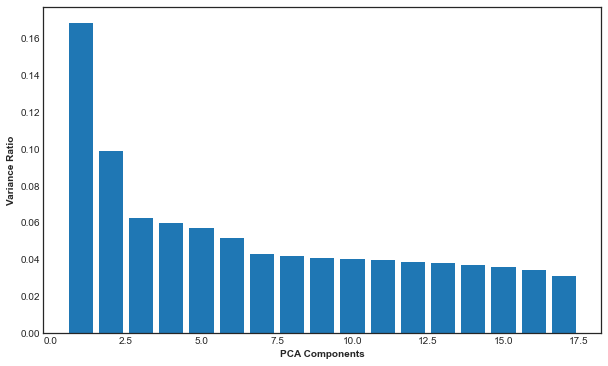

In [408]:
plt.rcParams['figure.figsize']=[10,6]
ax = plt.bar(range(1,len(final_pca.explained_variance_ratio_)+1), final_pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

plt.show()

### Inference:
    1. PC1 explains ~18% of variance.
    2. PC2 explains ~10% of variance. 

In [406]:
col=[]
for i in range(X_pca.shape[1]):
    col.append('V{}'.format(i+1))

In [410]:
x=np.cumsum(final_pca.explained_variance_ratio_*100)

Varaince_Explained=pd.DataFrame({'PC':col,'Explained Varaince':final_pca.explained_variance_ratio_*100,'Cumulative EV':x})
pd.set_option("display.max_rows", None, "display.max_columns", None)
Varaince_Explained

PC  Explained Varaince  Cumulative EV
0    V1           16.872081      16.872081
1    V2            9.896793      26.768873
2    V3            6.273238      33.042111
3    V4            6.017243      39.059354
4    V5            5.712566      44.771920
5    V6            5.174352      49.946272
6    V7            4.327945      54.274217
7    V8            4.215206      58.489423
8    V9            4.086865      62.576288
9   V10            4.050481      66.626769
10  V11            3.965799      70.592568
11  V12            3.895688      74.488256
12  V13            3.832618      78.320874
13  V14            3.727198      82.048072
14  V15            3.626406      85.674477
15  V16            3.464342      89.138820
16  V17            3.099206      92.238026

Text(0, 0.5, 'Cumulative Explained Variance')

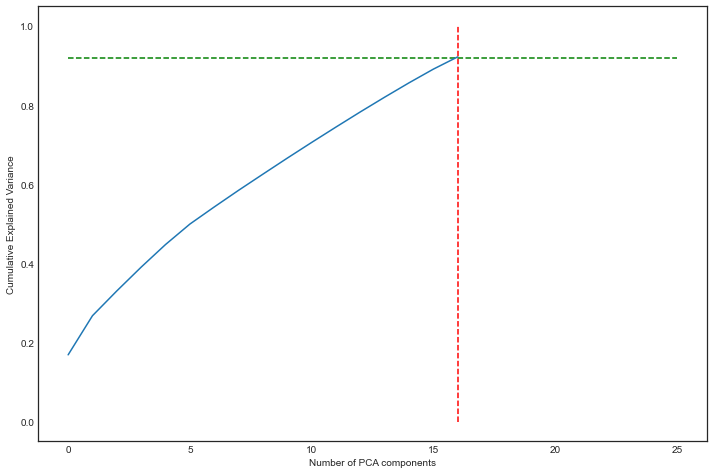

In [418]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(final_pca.explained_variance_ratio_))
plt.vlines(x=16, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.92, xmax=25, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

#### Inference:
It is evident from the above Scree plot that more than 95% variance is explained by the first 17 principal components. Hence, we will use these components only going forward.

In [419]:
org_col = list(df_xtrain.columns)
attributes_pca = pd.DataFrame({'Feature':org_col,'PC_1':final_pca.components_[0],'PC_2':final_pca.components_[1],
                               'PC_3':final_pca.components_[2], 'PC_4':final_pca.components_[3], 'PC_5':final_pca.components_[4],
                              'PC_6':final_pca.components_[5], 'PC_7':final_pca.components_[6],'PC_8':final_pca.components_[7],'PC_9':final_pca.components_[8],'PC_10':final_pca.components_[9],'PC_11':final_pca.components_[10],'PC_12':final_pca.components_[11],'PC_13':final_pca.components_[12],'PC_14':final_pca.components_[13],'PC_15':final_pca.components_[14],'PC_16':final_pca.components_[15],'PC_17':final_pca.components_[16]})
attributes_pca

Feature      PC_1      PC_2      PC_3      PC_4      PC_5  \
0              age -0.064983 -0.010270  0.179540 -0.123691  0.645662   
1              job  0.011213  0.002892  0.115710 -0.020929 -0.132112   
2          marital  0.078291  0.005861 -0.061757  0.125827 -0.612817   
3        education  0.015364 -0.002593  0.251444 -0.084634 -0.104656   
4          default  0.132250  0.003888  0.110198 -0.002890 -0.324456   
5          housing  0.045734  0.006045  0.033168 -0.136123 -0.029432   
6             loan  0.002140 -0.005147 -0.015453 -0.041053 -0.019186   
7      Region_Code -0.003948  0.587058 -0.002637 -0.004412  0.022313   
8       State_Code -0.002197  0.054366 -0.001242 -0.020372 -0.044509   
9        City_Code -0.006343  0.280720 -0.007145 -0.011981 -0.015129   
10         contact -0.268433  0.007241 -0.200551  0.408756  0.076271   
11           month -0.010965 -0.003972  0.560954 -0.393114 -0.113140   
12     day_of_week  0.003691 -0.005718 -0.010086  0.033156 -0.066482   
13        duration  0.042147 -0.002991  0.020137  0.201975  0.069417   
14        campaign -0.058027 -0.011069 -0.090116 -0.014427 -0.001328   
15           pdays  0.153348  0.009074  0.413394  0.499637  0.061105   
16        previous  0.277586  0.000688  0.143646  0.175124  0.119501   
17        poutcome -0.133506  0.014193  0.323217  0.372158 -0.075388   
18     Postal Code -0.004537  0.470367  0.003423 -0.018945 -0.020089   
19    emp.var.rate -0.461947 -0.006265  0.050486 -0.018601 -0.064625   
20  cons.price.idx -0.371322  0.004520 -0.083393  0.306917  0.006143   
21   cons.conf.idx -0.141035  0.002114  0.438126  0.104549 -0.005779   
22       euribor3m -0.464883 -0.005485  0.108370 -0.083723 -0.073955   
23     nr.employed -0.431973 -0.010201  0.032592 -0.212261 -0.088627   
24          Region -0.002873  0.592799 -0.002079 -0.006316  0.020590   

        PC_6      PC_7      PC_8      PC_9     PC_10     PC_11     PC_12  \
0   0.032522 -0.053490 -0.034290 -0.002708 -0.069568 -0.084221 -0.077472   
1  -0.009916  0.281341  0.099894 -0.355814  0.240553 -0.607820 -0.435132   
2  -0.032757  0.019269  0.009930  0.085158 -0.004438  0.144214  0.048297   
3   0.007772 -0.125148 -0.145542  0.225325 -0.494778  0.206287 -0.413033   
4  -0.029152  0.052458 -0.044644 -0.112902 -0.046326 -0.030623 -0.136962   
5  -0.030998 -0.281732  0.240317  0.290759  0.375276 -0.195929 -0.030577   
6  -0.049636 -0.212361  0.421841  0.586956  0.160321 -0.052217 -0.283539   
7  -0.282252  0.012530 -0.012698  0.004470 -0.022223 -0.004142  0.014466   
8   0.736664 -0.016317  0.022722  0.011195  0.021634  0.018681 -0.003575   
9   0.443168 -0.013019  0.034267  0.001001  0.030756 -0.001541 -0.013307   
10  0.014080  0.154289 -0.016363  0.103566 -0.130265 -0.029552 -0.302705   
11 -0.018207  0.130132  0.039487 -0.000456  0.071491  0.084757  0.205560   
12  0.046872  0.149598 -0.238164  0.449697 -0.348607 -0.631281  0.418059   
13  0.000159 -0.044246 -0.443721  0.145556  0.418108  0.188871  0.033180   
14 -0.005950 -0.205425  0.515286 -0.260546 -0.410130 -0.006958  0.125052   
15  0.008100  0.001152  0.248824 -0.028543  0.048494  0.013983  0.232780   
16  0.013648  0.512193  0.309432  0.146773  0.026580  0.175554  0.113110   
17 -0.002020 -0.577645 -0.093845 -0.176678  0.022142 -0.183429  0.090616   
18  0.325290 -0.011079  0.012853 -0.003994  0.017798  0.013961 -0.017465   
19 -0.010207  0.099312  0.076476  0.027424  0.070674  0.052574  0.095712   
20  0.001204  0.172870  0.135278  0.057337  0.046593  0.054933  0.030834   
21  0.015716  0.141921 -0.117910  0.112942 -0.117080  0.023741 -0.308239   
22 -0.009806  0.100641  0.038728  0.030506  0.064257  0.054631  0.075024   
23 -0.012155  0.023771  0.027224 -0.007191  0.077180  0.034499  0.139273   
24 -0.255481  0.011847 -0.011593  0.004991 -0.020706 -0.004443  0.014119   

       PC_13     PC_14     PC_15     PC_16     PC_17  
0   0.008880  0.035641  0.003446  0.025864 -0.002064  
1   0.104814  0.208470  0.260895  0.114555 -0.00146

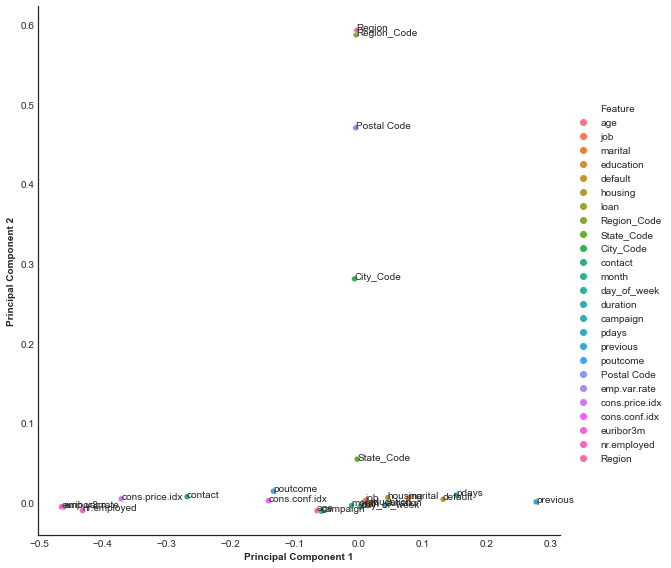

In [424]:
sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Feature" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Feature):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

#### Inference:
    1.PC2 explains 'Region_code' and ''Region' better than PC1
    2.'previous' well explained by PC1

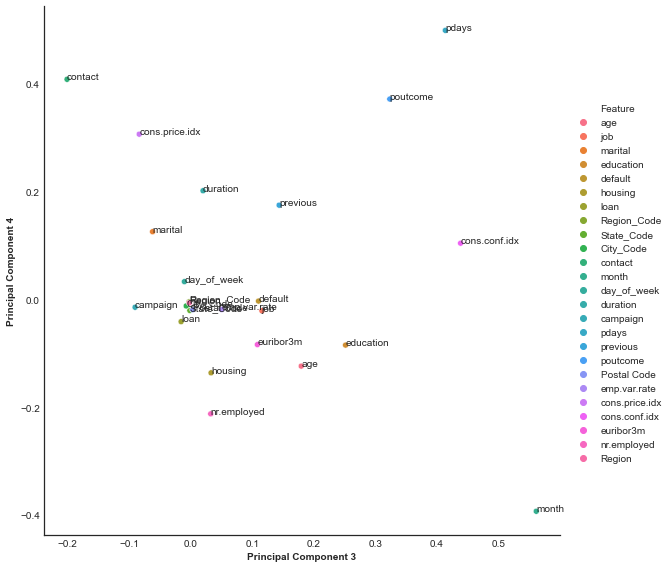

In [426]:
sns.pairplot(data=attributes_pca, x_vars=["PC_3"], y_vars=["PC_4"], hue = "Feature" ,height=8)
plt.xlabel("Principal Component 3",fontweight = 'bold')
plt.ylabel("Principal Component 4",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Feature):
    plt.annotate(txt, (attributes_pca.PC_3[i],attributes_pca.PC_4[i]))

#### Inference:
    1.PC3 explains 'month' and ''cons.conf.idx' better than PC4
    2.'pdays','contact' well explained by PC4

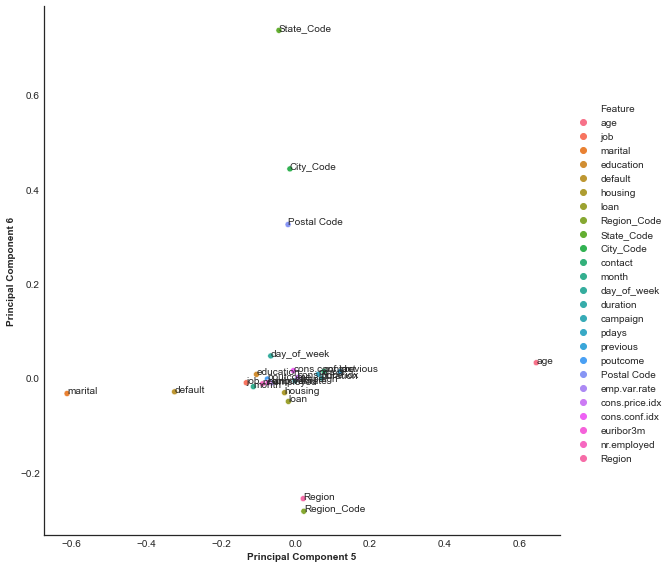

In [435]:
sns.pairplot(data=attributes_pca, x_vars=["PC_5"], y_vars=["PC_6"], hue = "Feature" ,height=8)
plt.xlabel("Principal Component 5",fontweight = 'bold')
plt.ylabel("Principal Component 6",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Feature):
    plt.annotate(txt, (attributes_pca.PC_5[i],attributes_pca.PC_6[i]))

#### Inference:
    1.PC5 explains 'age' better than PC6
    2.'State_code' well explained by PC6

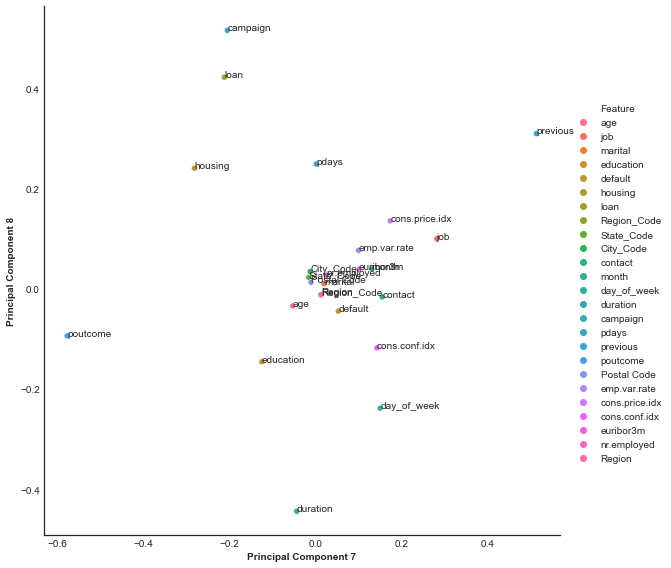

In [428]:
sns.pairplot(data=attributes_pca, x_vars=["PC_7"], y_vars=["PC_8"], hue = "Feature" ,height=8)
plt.xlabel("Principal Component 7",fontweight = 'bold')
plt.ylabel("Principal Component 8",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Feature):
    plt.annotate(txt, (attributes_pca.PC_7[i],attributes_pca.PC_8[i]))

#### Inference:
    1.PC7 explains 'previous' better than PC8
    2.'campaign' well explained by PC8

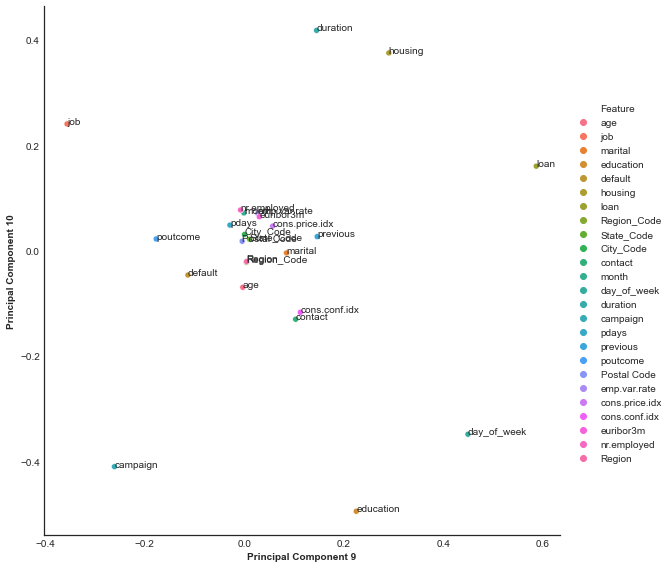

In [429]:
sns.pairplot(data=attributes_pca, x_vars=["PC_9"], y_vars=["PC_10"], hue = "Feature" ,height=8)
plt.xlabel("Principal Component 9",fontweight = 'bold')
plt.ylabel("Principal Component 10",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Feature):
    plt.annotate(txt, (attributes_pca.PC_9[i],attributes_pca.PC_10[i]))

#### Inference:
    1.PC9 explains 'loan' and 'day_of_week' better than PC10
    2.'duration' and 'housing' well explained by PC10

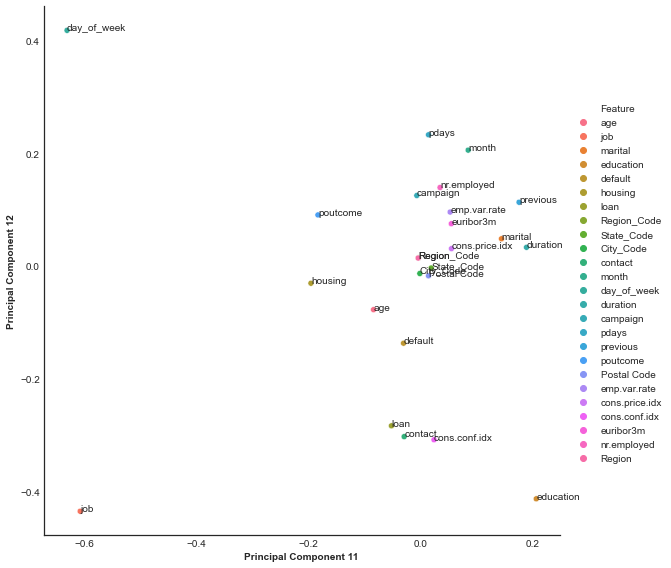

In [430]:
sns.pairplot(data=attributes_pca, x_vars=["PC_11"], y_vars=["PC_12"], hue = "Feature" ,height=8)
plt.xlabel("Principal Component 11",fontweight = 'bold')
plt.ylabel("Principal Component 12",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Feature):
    plt.annotate(txt, (attributes_pca.PC_11[i],attributes_pca.PC_12[i]))

#### Inference:
    1.PC12 explains 'day_of_week' better than PC11
    2.'previous','duration','education' and 'marital' well explained by PC11

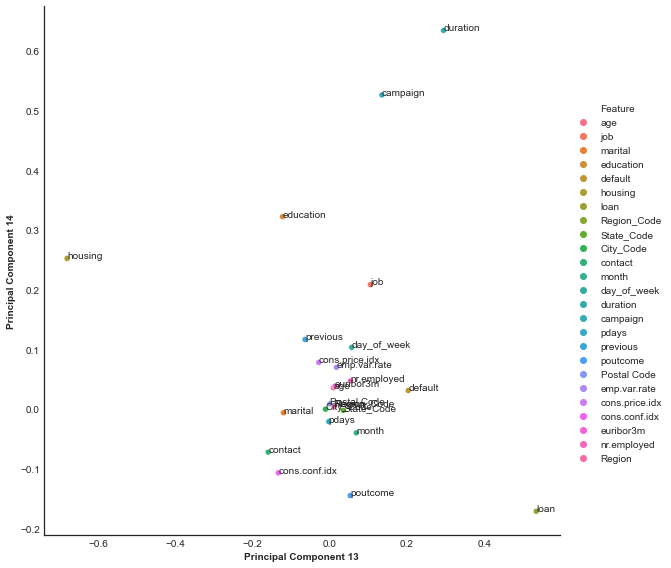

In [431]:
sns.pairplot(data=attributes_pca, x_vars=["PC_13"], y_vars=["PC_14"], hue = "Feature" ,height=8)
plt.xlabel("Principal Component 13",fontweight = 'bold')
plt.ylabel("Principal Component 14",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Feature):
    plt.annotate(txt, (attributes_pca.PC_13[i],attributes_pca.PC_14[i]))

#### Inference:
    1.PC13 explains 'loan' better than PC14
    2.'duration' and 'campaign' well explained by PC14

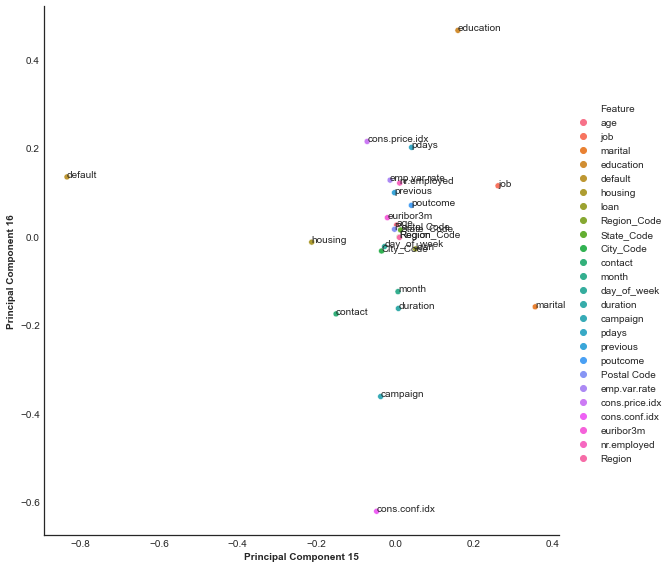

In [432]:
sns.pairplot(data=attributes_pca, x_vars=["PC_15"], y_vars=["PC_16"], hue = "Feature" ,height=8)
plt.xlabel("Principal Component 15",fontweight = 'bold')
plt.ylabel("Principal Component 16",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Feature):
    plt.annotate(txt, (attributes_pca.PC_15[i],attributes_pca.PC_16[i]))

#### Inference:
    1.PC15 explains 'marital' better than PC16
    2.'education' well explained by PC16 and PC15 collectively

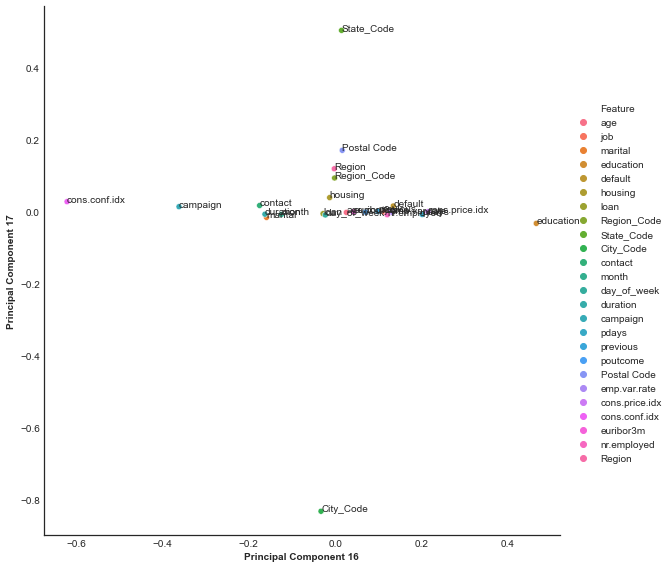

In [433]:
sns.pairplot(data=attributes_pca, x_vars=["PC_16"], y_vars=["PC_17"], hue = "Feature" ,height=8)
plt.xlabel("Principal Component 16",fontweight = 'bold')
plt.ylabel("Principal Component 17",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Feature):
    plt.annotate(txt, (attributes_pca.PC_16[i],attributes_pca.PC_17[i]))

#### Inference:
    1.PC16 explains 'education' better than PC17
    2.'State_code' well explained by PC17

And also collectively all the PC's explain all the rest of the features quite well.

#### PCA of test data:
    For test data we dont fit the test data but just tranform the test data using the already fitted train data.

In [436]:
test_pca = final_pca.transform(xtest)

## Conclusion:


From the EDA we can clearly identify duration playing an important attribute in defining the outcome of our dataset. It is absolute that the more the leads are interested in starting a deposit will have higher number of calls and the call duration will be higher than the average. We have also figured out that job and education also acts as a crucial deciding factor and influences the outcome alot.

Here are the few recommendations for the bank than can help improve the deposit rate:

    1.Classify job roles based on corporate tiers and approach all tier 1 employees within few days after the campaign commences.
    2.Listen to the leads and extract more information to deliver the best deposit plan, which can increase the duration of calls and that can lead to a deposit.
    3.Approaching the leads during the start of new bank period(May-July) will be a good choice as many have shown positive results from data history.
    4.Tune the campaign according to the national econometrics, don't chanelize the expenses on campaign when the national economy is performing poor.